# Library

In [223]:
# Analisis Dataframe
import numpy as np 
import pandas as pd 
import seaborn as sns 

# Visualisasi Graph
import matplotlib.pyplot as plt

# Tabel Visual
from tabulate import tabulate

# To set display columns
pd.set_option('display.max_columns', None)

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

# metric
from sklearn.metrics import make_scorer,fbeta_score

# splitting data populasi 
from sklearn.model_selection import train_test_split

# PreProcessing
# column transformer 
from sklearn.compose import ColumnTransformer
#       Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder
#       Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 
#       Binning
from sklearn.preprocessing import KBinsDiscretizer
#       Column transformer 
from sklearn.compose import ColumnTransformer
#       Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Cross Validation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedGroupKFold,StratifiedKFold, KFold
#   Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#       Ensemble Various Type
from sklearn.ensemble import VotingClassifier, StackingClassifier
#       Ensemble Similar Type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier      # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting

# HyperParameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#   Sampling
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss

# Confusion Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Save Result Model
import joblib
import tensorflow as tf
import torch


# DeadLine : 14 Januari 23.59

# Company Profile

**Context:**
Shafy Agency Insurance adalah perusahaan terkemuka yang bergerak di bidang asuransi perjalanan (travel insurance). Kami berdedikasi untuk menyediakan perlindungan terbaik bagi para pelancong dengan menawarkan berbagai produk asuransi yang dirancang untuk memenuhi kebutuhan perjalanan domestik maupun internasional.

**Visi dan Misi**

Visi:
- Menjadi mitra terpercaya dalam perlindungan perjalanan, memberikan rasa aman dan kenyamanan kepada setiap pelanggan di seluruh dunia.

Misi:

- Memberikan produk asuransi perjalanan yang inovatif dan terjangkau.
- Membangun hubungan yang kuat dengan pelanggan melalui layanan yang responsif dan profesional.
- Meningkatkan kesadaran akan pentingnya perlindungan perjalanan di kalangan masyarakat.

**Produk dan Layanan**
Asuransi Perjalanan Individu
Perlindungan untuk perjalanan pribadi, termasuk keterlambatan penerbangan, kehilangan bagasi, dan biaya medis darurat.

Keunggulan Kami
1. Layanan 24/7
2. Dukungan pelanggan sepanjang waktu untuk menangani klaim atau situasi darurat.
3. Proses Klaim Cepat dan Mudah
    - Sistem klaim online yang transparan dan efisien.
4. Jaringan Internasional
    - Kerja sama dengan mitra global untuk memberikan layanan di berbagai negara.
5. Produk yang Disesuaikan
    - Asuransi yang fleksibel dan dapat disesuaikan dengan kebutuhan perjalanan pelanggan.

**Mengapa Memilih Kami?**

Reputasi Terpercaya: Dengan pengalaman bertahun-tahun di industri, kami dikenal sebagai penyedia asuransi perjalanan yang andal.
Harga Kompetitif: Premi asuransi yang terjangkau tanpa mengorbankan kualitas layanan.
Kepuasan Pelanggan: Tingkat kepuasan pelanggan yang tinggi berkat pelayanan yang cepat dan ramah.

Kontak Kami
- Alamat: [XXXXXX]
- Telepon: [081XXXXXXXX]
- Email: [sh4fyXXXXXX@gmail.com]
- Website: [www.shafyinsuranceagency.com]
- Media Sosial: [LinkedIn/Facebook/Instagram]

**Ayo Lindungi Perjalanan Anda!**

Dengan Shafy Agency Insurance, Anda bisa bepergian dengan tenang dan aman. Jangan biarkan hal-hal tak terduga merusak perjalanan Anda—percayakan perlindungan Anda pada kami!

## Product Information

In [224]:
# Data tabel
data = [
    ["1. Rencana Tahunan (Annual Plans)", "Annual Silver Plan / Annual Gold Plan / Annual Travel Protect Gold/Silver/Platinum", 
     "Asuransi perjalanan tahunan yang mencakup banyak perjalanan selama satu tahun. Perbedaan antara Silver, Gold, dan Platinum biasanya terkait dengan cakupan manfaat, seperti limit klaim lebih tinggi, perlindungan kesehatan, dan layanan darurat."],
    
    ["2. Rencana Komprehensif (Comprehensive Plans)", 
     "2-Way Comprehensive Plan / 1-Way Comprehensive Plan", 
     "Perlindungan perjalanan dengan berbagai manfaat seperti pembatalan, kecelakaan, kehilangan bagasi, dan keterlambatan penerbangan. '2-Way' mencakup perjalanan pulang-pergi, sedangkan '1-Way' hanya sekali jalan."],
    
    ["", "Individual Comprehensive Plan / Spouse or Parents Comprehensive Plan / Child Comprehensive Plan", 
     "Asuransi komprehensif untuk individu, pasangan, orang tua, atau anak-anak."],
    
    ["3. Rencana Pembatalan (Cancellation Plans)", "Cancellation Plan", 
     "Fokus pada perlindungan terhadap pembatalan perjalanan karena alasan tertentu yang tidak dapat dihindari, seperti masalah kesehatan, bencana alam, atau keadaan darurat lainnya."],
    
    ["4. Perlindungan Kendaraan Sewa", "Rental Vehicle Excess Insurance", 
     "Cakupan biaya tambahan untuk kendaraan sewaan, termasuk kerusakan atau pencurian kendaraan selama masa sewa."],
    
    ["5. Rencana Khusus (Specialty Plans)", "Travel Cruise Protect / Travel Cruise Protect Family", 
     "Dirancang khusus untuk perjalanan dengan kapal pesiar, mencakup risiko seperti pembatalan pelayaran, masalah kesehatan di kapal, atau gangguan pelayaran lainnya."],
    
    ["", "Ticket Protector", 
     "Melindungi tiket acara seperti konser, pertandingan olahraga, atau teater dari pembatalan."],
    
    ["6. Paket Perjalanan Singkat (Single Trip Plans)", "Single Trip Travel Protect Gold/Silver/Platinum", 
     "Perlindungan untuk satu kali perjalanan. Edisi Gold, Silver, dan Platinum biasanya mencakup tingkat cakupan yang berbeda."],
    
    ["7. Rencana Lainnya", "Bronze Plan / Silver Plan / Gold Plan / Premier Plan / Value Plan", 
     "Nama-nama ini umumnya mencerminkan tingkat perlindungan, dengan Bronze sebagai yang paling dasar dan Premier sebagai yang paling komprehensif."],
    
    ["", "24 Protect", 
     "Mungkin mencakup layanan darurat 24 jam, termasuk bantuan medis dan evakuasi darurat."]
]

# Header tabel
headers = ["Kategori", "Nama Produk", "Deskripsi"]

# Buat tabel
print(tabulate(data, headers, tablefmt="github"))


| Kategori                                        | Nama Produk                                                                                     | Deskripsi                                                                                                                                                                                                                                          |
|-------------------------------------------------|-------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1. Rencana Tahunan (Annual Plans)               | Annual Silver Plan / Annual Gold Plan / Annual Travel Protect Gold/Silver/Platinum              | Asuransi perjalanan tahunan yang mencakup banyak perjalanan 

## Business Information

**Problem Statement :**
Perusahaan asuransi perjalanan sering menghadapi tantangan dalam memprediksi pemegang polis mana yang kemungkinan besar akan mengajukan klaim. Ketidakpastian ini menyebabkan alokasi sumber daya yang kurang efisien, baik dalam pengelolaan risiko maupun dalam penggunaan data pelanggan untuk kebutuhan strategis lainnya. Sebagai contoh, polis yang belum diklaim memiliki potensi besar untuk dimanfaatkan dalam strategi pemasaran produk tambahan, personalisasi layanan, atau penyesuaian premi yang lebih kompetitif. Namun, tanpa pemahaman yang tepat tentang profil pelanggan yang cenderung melakukan klaim, perusahaan kehilangan peluang untuk mengoptimalkan nilai dari setiap polis yang dimiliki.

Target :

0 : Pelanggan **Tidak melakukan Claim** Asuransi

1 : Pelanggan Melakukan **Claim** Asuransi

- FP 
    1. ML memprediksi Claim, tapi faktanya bukan 
    2. Perusahaan merugi akibat jumlah cycle money yang akan dikelola tidak sesuai, sehingga dapat mengakibatkan kerugian sebesar 
        - Total Biaya Salah Prediksi = Frekuensi Kesalahan Prediksi × Nilai Rata-Rata Klaim
        - Terdapat 39 ribu data pelanggan (Non Duplicate)
        - Apabila rata-rata nilai Klaim setara Rp 45.925.000
        - Maka Kerugian yang dialami adalah sebesar :  **Rp 87.803.750.000**
            - Sumber Nominal [Klick Disini](https://www.ojk.go.id/id/kanal/iknb/data-dan-statistik/asuransi/Documents/Pages/Statistik-Perasuransian-2020/Statistik%20Perasuransian%20Indonesia%202020.pdf)

- FN
    1. ML memprediksi bukan, tapi faktanya Claim
    2. Perusahaan mengalami kerugian akibat tuntutan pemegang polis, serta kehilangan kepercayaan pada masyarakat
        - Total Biaya Salah Prediksi = Frekuensi Kesalahan Prediksi × Nilai Rata-Rata Klaim
        - Terdapat 39 ribu data pelanggan (Non Duplicate)
        - Apabila rata-rata nilai Klaim setara Rp 45.925.000
        - Maka Kerugian yang dialami adalah sebesar : **Rp 540.803.750.000**
            - Sumber Nominal [Klick Disini](https://www.ojk.go.id/id/kanal/iknb/data-dan-statistik/asuransi/Documents/Pages/Statistik-Perasuransian-2020/Statistik%20Perasuransian%20Indonesia%202020.pdf)

Sumber : 
1. Perlindungan Claim [Klick Disini](https://pinterhukum.or.id/hukum-asuransi-perlindungan-klaim-dan-regulasi/).
2. Sanksi Hukum Claim [Klick Disini](https://www.studocu.id/id/document/universitas-pamulang/hukum-perikatan/sanksi-hukum-terhadap-pihak-penanggung-atas-klaim-asuransi-yang-tidak-dipenuhi-penanggung-berdasarkan-hukum-positif/45277602).
3. Hukum dalam Claim Asuransi [Klick Disini](https://heylaw.id/blog/perkembangan-penolakan-dan-penyelesaian-klaim-asuransi-di-indonesia).
4. Perhitungan Loss Ratio [Klick Disini](https://drive.google.com/drive/u/0/folders/1jKiNJJ42dq4DXmffiRUILL20NP3-icM_).

**Goals :**
Dengan memanfaatkan data historis dan analitik prediktif, perusahaan dapat membangun model yang mampu mengidentifikasi pola dan faktor risiko yang menentukan kemungkinan klaim. Hal ini tidak hanya membantu perusahaan mengelola klaim dengan lebih baik, tetapi juga memungkinkan mereka mengarahkan fokus pada pemegang polis yang belum melakukan klaim untuk penawaran layanan yang lebih proaktif. Solusi ini akan membuka peluang bagi perusahaan untuk meningkatkan efisiensi operasional, memaksimalkan profitabilitas polis, dan menciptakan pengalaman pelanggan yang lebih personal dan relevan, serta mengurangi kerugian perusahaan akibat pengeluaran biaya.

**Analytic Approach :**
Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan kandidat pemegang polis yang mau melakukan Claim atau tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang kandidat akan/ingin melakukan Claim di perusahaan tersebut atau tidak.

**Method :**
Berdasarkan beberapa poin yang telah dijabarkan diatas dapat disimpulkan bahwa ketika perusahaan memiliki jumlah 
1. FP (ML memprediksi Claim, tapi faktanya bukan)
    - Total Kerugian yang dialami adalah sebesar : **Rp 87.803.750.000**
2. FN (ML memprediksi bukan, tapi faktanya Claim) : 
    - Total Kerugian yang dialami adalah sebesar : **Rp Rp 540.803.750.000**

Sehingga **Evaluation Method Metrics Model** yang digunakan dalam kasus ini karena baik FP dan FN sama sama merugikan perusahaan sehingga perusahaan ingin menekan angka FP dan FN sehingga nilai kerugian bisa ditanggulangi namun tetap berat terhadap FN karena memiliki jumlah kerugian yang lebih besar dibandingkan FP dengan selisih **Rp 468 M** sehingga model akan menggunakan (**F2 Score**) 
- F2 Score = Dalam upaya menekan biaya pengeluaran yang terjadi pada metric FP dan FN, apabila ingin menekan kedua  metric namun karena salah satu metric memiliki jumlah kerugian lebih besar, sehingga perusahaan ingin menekan FP dan FN, namun juga ingin menekan jumlah FN dengan cukup signifikan, maka metode scoring yang dilakukan untuk menjadi landasan model dalam menentukan Claim/not Claim maka F2 Score menjadi pilihan terbaik, karena F2 Score berfokus pada 
    1. FP dan FN
    2. FN (1x bobot) sedangkan FP (2x bobot)

Dapat disimpulkan bahwa jumlah kerugian yang dialami perusahaan dapat menurun baik dari metric FP dan FN, namun untuk FN pengurangannya 2x secara signifikan dibandingkan FP.

**Metric FP/FN**

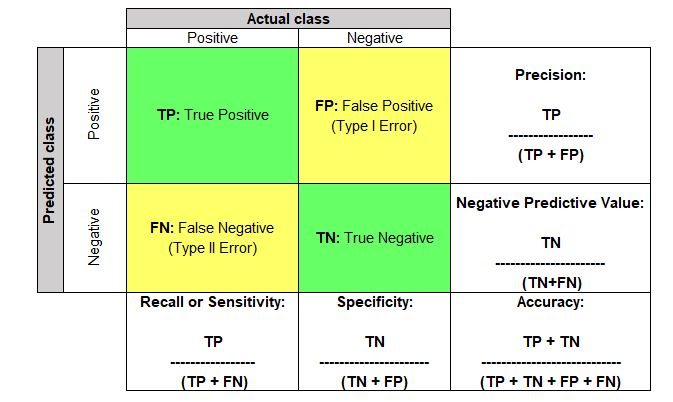

## **Proses Pengajuan Asuransi**

PT. Shafy Agency Insurance merupakan perusahaan yang baru didirikan tahun 2023, sehingga proses pengajuan asuransi yang diterapkan pada perusahaan merupakan hasil benchmarking antara PT Shafy Agency Insurance dengan PT. Alianz, dalam penerapannya proses pengajuan asuransi travel oleh pemegang polis adalah sebagai berikut

![Proses Asuransi.png](<attachment:Proses Asuransi.png>)

- Proses A merupakan proses pengajuan oleh pemegang polis, adapun kegiatan yang dilakukan hanyalah menghubungi pihak travel insurance 
    1. Offline = Datang langsung ke kantor pihak asuransi, kemudian menghubungi pihak claim insurance
    2. Online = Mengunjungi website pihak asuransi kemudian login ke website tersebut

- Proses B merupakan proses pengisian biodata dan kebutuhan lainnya dalam memenuhi persayratan dalam pengajuan asuransi, adapun berkas yang diperlukan antara lain
    1. Fotocopy KTP,
    2. Mengisi Formulir pengajuan claim,
    3. Fotocopy KK,
    4. Surat keterangan Kepolisian (Cancelation Plans),
    5. Surat Bermaterai Kesepakatan Penyataan Claim,
    6. Foto Kwitansi pembayaran (Travel Plans)

- Proses C merupakan proses seleksi oleh perusahaan asuransi, dimana dari berkas pemegang polis yang telah di berikan untuk pengajuan Claim, perusahaan akan memilih bedasarkan kriteria pengajuan, data pengisian akan di analisis dengan data historis untuk mengetahui adanya pengajuan Fraud/dll, apabila memenuhi persayaratan maka perusahaan akan meloloskan pengajuan oleh pemegang polis, apabila tidak, maka perusahaan akan menolak pengajuan tersebut. Adapun beberapa ketentuan yang diterapkan dalam pengesahan klaim adalah sebagai berikut :
    1. First Notification setelah pengajuan claim oleh pemegang polis adalah maksimum 30 hari kerja dari tanggal pengajuan
       dengan memberikan informasi tambahan berupa No.Polis asuransi, Nama pengaju, Keterangan pengajuan
    2. Keputusan klaim dilakukan setelah First Notification diterima oleh pemegang polis paling lama 14 hari kerja

- Proses D meruapakan proses akhir dan hanya terjadi apabila pemegang polis lolos seleksi pada Proses C, kemudian pemegang polis akan langsung menerima uang asuransi yang telah dibayarkan dan proses dinyatakan SELESAI


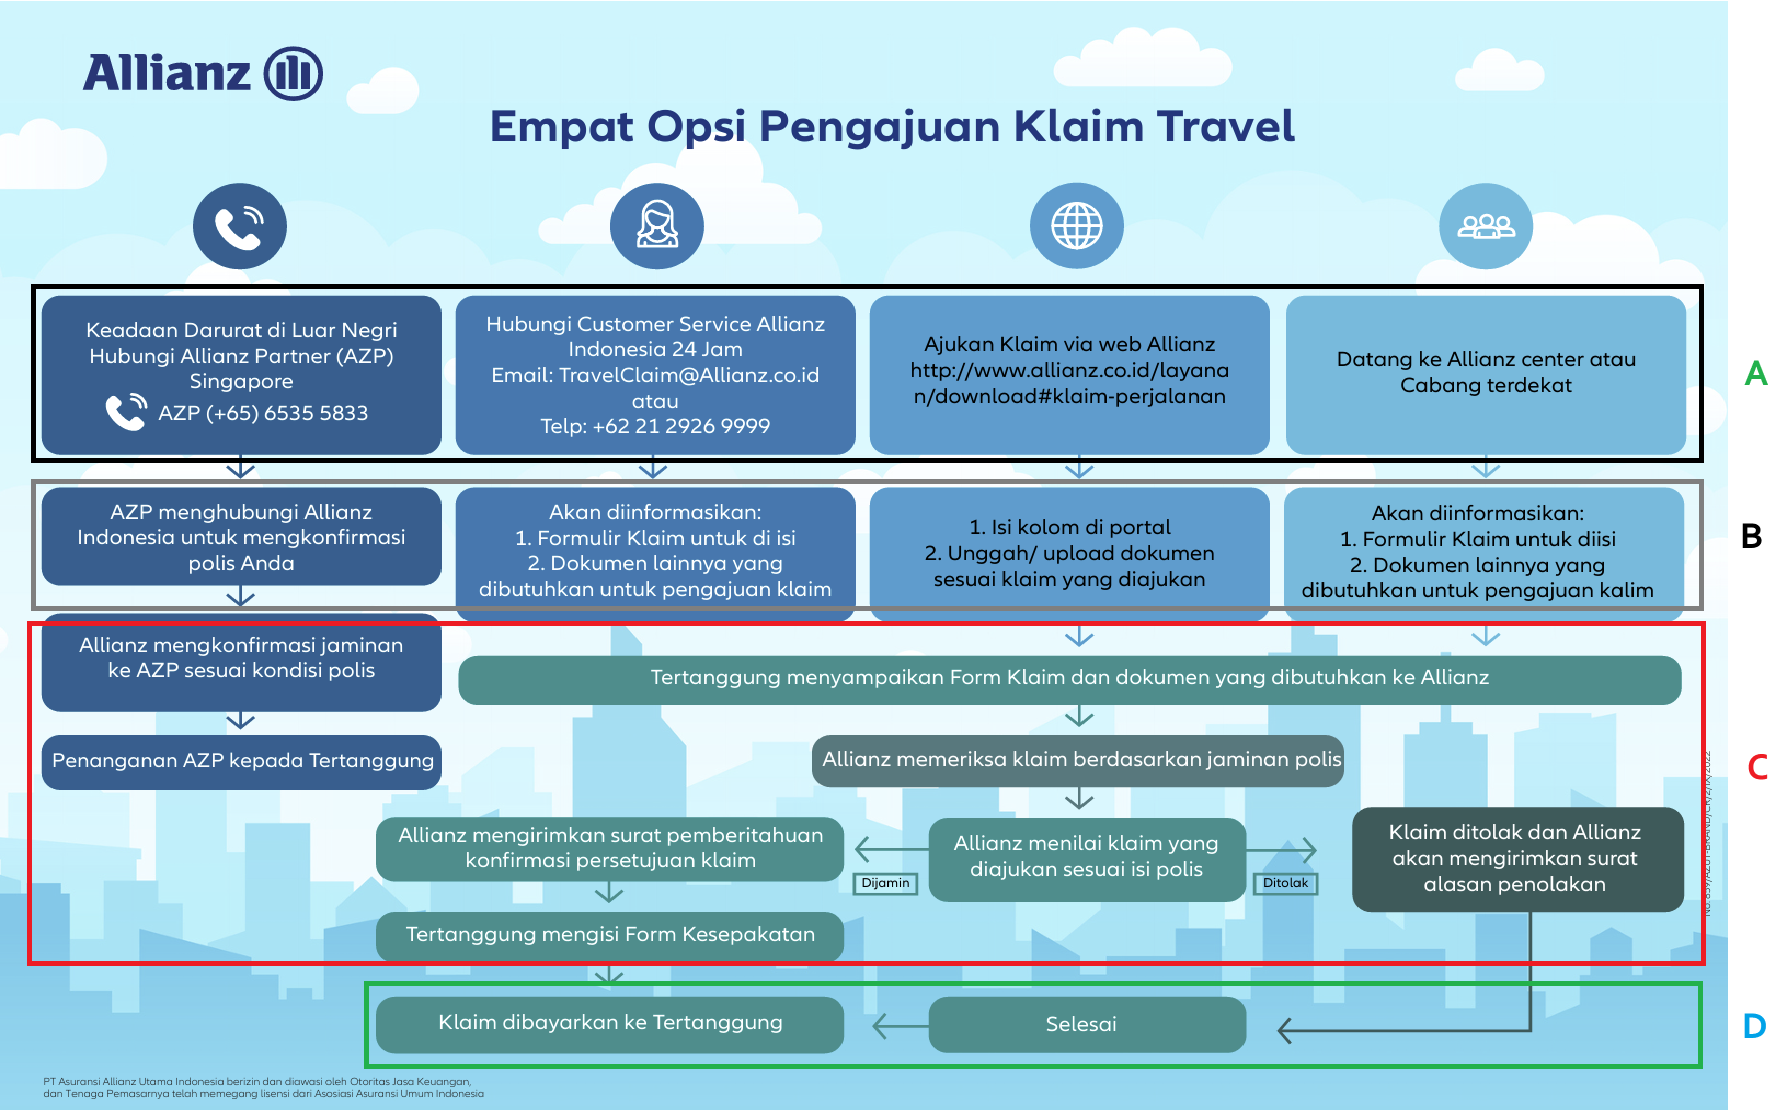

## Penerapan Model

Dengan memanfaatkan data historis dan analitik prediktif, perusahaan dapat membangun model yang mampu mengidentifikasi pola dan faktor risiko yang menentukan kemungkinan klaim. Hal ini tidak hanya membantu perusahaan mengelola klaim dengan lebih baik, tetapi juga memungkinkan mereka mengarahkan fokus pada pemegang polis yang belum melakukan klaim untuk penawaran layanan yang lebih proaktif. Solusi ini akan membuka peluang bagi perusahaan untuk meningkatkan efisiensi operasional, memaksimalkan profitabilitas polis, dan menciptakan pengalaman pelanggan yang lebih personal dan relevan.

Sehingga dari penjelasan diatas, model akan diterapkan pada **Proses C**, dimana pada proses tersebut akan dilakukan 
1. Penentuan Claim/Not Claim
2. Penentuan apakah Pemegang Polis Dinyatakan lolos atau tidak dari status FP/FN

Kemudian langkah berikutnya adalah menganalisis data untuk menemukan pola yang membedakan kandidat pemegang polis yang mau melakukan Claim atau tidak.

Kemudian kita akan membangun **model klasifikasi** yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang kandidat akan/ingin melakukan Claim di perusahaan tersebut atau tidak.

Dengan menggunakan metric scorer **F2 Score** karena ingin menekan biaya pengeluaran/biaya kerugian FP dan FN, namun karena jumlah pengeluaran FN jauh lebih besar maka pembobotan pengurangan FN menjadi 2x pembobotan sedangkan FN 1x

# Data Information

In [225]:
data = [
    ["Agency", "Name of agency"],
    ["Agency Type", "Type of travel insurance agencies"],
    ["Distribution Channel", "Channel of travel insurance agencies"],
    ["Product Name", "Name of the travel insurance products"],
    ["Gender", "Gender of insured"],
    ["Duration", "Duration of travel"],
    ["Destination", "Destination of travel"],
    ["Net Sales", "Amount of sales of travel insurance policies"],
    ["Commission (in value)", "Commission received for travel insurance agency"],
    ["Age", "Age of insured"],
    ["Claim", "Claim status"],
]

# Header tabel
headers = ["Field", "Description"]

# Buat tabel
print(tabulate(data, headers, tablefmt="github"))

| Field                 | Description                                     |
|-----------------------|-------------------------------------------------|
| Agency                | Name of agency                                  |
| Agency Type           | Type of travel insurance agencies               |
| Distribution Channel  | Channel of travel insurance agencies            |
| Product Name          | Name of the travel insurance products           |
| Gender                | Gender of insured                               |
| Duration              | Duration of travel                              |
| Destination           | Destination of travel                           |
| Net Sales             | Amount of sales of travel insurance policies    |
| Commission (in value) | Commission received for travel insurance agency |
| Age                   | Age of insured                                  |
| Claim                 | Claim status                                    |


# 1. Data Processing

## 1.1. Load Dataset

In [226]:
df = pd.read_csv('data_travel_insurance.csv')
display(df.head(5),df.tail(5))

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No
44327,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,172,SINGAPORE,0.0,17.82,31,No


In [227]:
pd.set_option('display.max_colwidth', None)
# Data unique in each Columns
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].isna().sum(), df[col].duplicated().sum(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Number Missing Value', 'Number Duplicated per Columns', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Number Missing Value,Number Duplicated per Columns,Unique Sample
0,Agency,16,0,44312,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,2,0,44326,"[Airlines, Travel Agency]"
2,Distribution Channel,2,0,44326,"[Online, Offline]"
3,Product Name,26,0,44302,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,2,31647,44325,"[F, nan, M]"
5,Duration,437,0,43891,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,138,0,44190,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,1006,0,43322,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision (in value),915,0,43413,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
9,Age,89,0,44239,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 

## 1.2 Data stats

In [228]:
print('TABEL INFO DATA FRAME')
display(df.info())
print('TABEL DESCRIBE DATA FRAME')
display(df.describe(),df.describe(include='object'))

TABEL INFO DATA FRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


None

TABEL DESCRIBE DATA FRAME


,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


In [229]:
print(f'''Statistik Data DF menunjukan bahwa data sebelum dilakukan cleaning dan enginering memiliki
jumlah Baris            : {df.shape[0]}
jumlah Kolom            : {df.shape[1]}
Kolom bersifat object   : {df.dtypes.value_counts()[0]}
Kolom bersifat int64    : {df.dtypes.value_counts()[1]}
Kolom bersifat float64  : {df.dtypes.value_counts()[2]}
''')

Statistik Data DF menunjukan bahwa data sebelum dilakukan cleaning dan enginering memiliki
jumlah Baris            : 44328
jumlah Kolom            : 11
Kolom bersifat object   : 7
Kolom bersifat int64    : 2
Kolom bersifat float64  : 2



## 1.3 Data Missing and Duplicate

### 1.3.1 Data Missing

In [230]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [231]:
print('Proporsi Missing value terhadap kolom Gender')
print(f'Jumlah',round(((df['Gender'].isna().sum())/(len(df['Gender'])))*100,2), '%')

Proporsi Missing value terhadap kolom Gender
Jumlah 71.39 %


In [232]:
print('Proporsi Missing value terhadap Keseluruhan data')
print(f'Jumlah',round(((df['Gender'].isna().sum())/(len(df)))*100,2), '%')
print('Stament Keputusan : Delete Column Gender Karena jumlah persen melebihi 50% keseluruhan data dan column nya sendiri')

Proporsi Missing value terhadap Keseluruhan data
Jumlah 71.39 %
Stament Keputusan : Delete Column Gender Karena jumlah persen melebihi 50% keseluruhan data dan column nya sendiri


In [233]:
df.drop(columns=['Gender'],inplace=True)

### 1.3.2 Duplicated Data

In [234]:
df.duplicated().sum()

5004

In [235]:
print('Proporsi Duplicated terhadap Keseluruhan data')
print(f'Jumlah',round(((df.duplicated().sum())/len(df)*100),2), '%')
print('Statemen Keputusan : Menghapus duplikasi dikahwatirkan menyebabkan data menjadi bias')


Proporsi Duplicated terhadap Keseluruhan data
Jumlah 11.29 %
Statemen Keputusan : Menghapus duplikasi dikahwatirkan menyebabkan data menjadi bias


In [236]:
df.drop_duplicates(inplace=True)

## 1.4 Data enginering

### 1.4.1 Nama Destination

In [237]:
# Maping Nama Area Baru
destination = {
    'SINGAPORE': 'SINGAPORE', 'MALAYSIA' : 'MALAYSIA', 'INDIA' : 'INDIA', 'UNITED STATES' : 'UNITED STATES',
       'KOREA, REPUBLIC OF' : 'SOUTH KOREA', 'THAILAND':'THAILAND', 'GERMANY' :'GERMANY', 'JAPAN':'JAPAN', 'INDONESIA':'INDONESIA',
       'VIET NAM':'VIETNAM', 'AUSTRALIA':'AUSTRALIA', 'FINLAND':'FINLAND', 'UNITED KINGDOM':'UNITED KINGDOM', 'SRI LANKA':'SRI LANKA',
       'SPAIN':'SPAIN', 'HONG KONG':'HONG KONG', 'MACAO':'MACAO', 'CHINA':'CHINA', 'UNITED ARAB EMIRATES':'UNITED ARAB EMIRATES',
       'IRAN, ISLAMIC REPUBLIC OF':'IRAN', 'TAIWAN, PROVINCE OF CHINA':'TAIWAN', 'POLAND':'POLAND',
       'CANADA':'CANADA', 'OMAN':'OMAN', 'PHILIPPINES':'PHILIPPINES', 'GREECE':'GREECE', 'BELGIUM':'BELGIUM', 'TURKEY':'TURKEY',
       'BRUNEI DARUSSALAM':'BRUNEI DARUSSALAM', 'DENMARK':'DENMARK', 'SWITZERLAND':'SWITZERLAND', 'NETHERLANDS':'NETHERLANDS',
       'SWEDEN':'SWEDEN', 'MYANMAR':'MYANMAR', 'KENYA':'KENYA', 'CZECH REPUBLIC':'CZECH', 'FRANCE':'FRANCE',
       'RUSSIAN FEDERATION':'RUSSIA', 'PAKISTAN':'PAKISTAN', 'PAKISTAN':'PAKISTAN',
       'TANZANIA, UNITED REPUBLIC OF':'TANZANIA', 'SERBIA':'SERBIA', 'ITALY':'ITALY', 'CROATIA':'CROATIA',
       'NEW ZEALAND':'NEW ZEALAND', 'PERU':'PERU', 'MONGOLIA':'MONGOLIA', 'CAMBODIA':'CAMBODIA', 'QATAR':'QATAR', 'NORWAY':'NORWAY',
       'LUXEMBOURG':'LUXEMBOURG', 'MALTA':'MALTA', "LAO PEOPLE'S DEMOCRATIC REPUBLIC":'LAOS',
       'ISRAEL':'ISRAEL', 'SAUDI ARABIA':'SAUDI ARABIA', 'AUSTRIA':'AUSTRIA', 'PORTUGAL':'PORTUGAL', 'NEPAL':'NEPAL',
       'UKRAINE':'UKRAINE', 'ESTONIA':'ESTONIA', 'ICELAND':'ICELAND', 'BRAZIL':'BRAZIL', 'MEXICO':'MEXICO',
       'CAYMAN ISLANDS':'CAYMAN ISLANDS', 'PANAMA':'PANAMA', 'BANGLADESH':'BANGLADESH', 'TURKMENISTAN':'TURKMENISTAN',
       'BAHRAIN':'BAHRAIN', 'KAZAKHSTAN':'KAZAKHSTAN', 'TUNISIA':'TUNISIA', 'IRELAND':'IRELAND', 'ETHIOPIA':'ETHIOPIA',
       'NORTHERN MARIANA ISLANDS':'NORTHERN MARIANA ISLANDS', 'MALDIVES':'MALDIVES', 'SOUTH AFRICA':'SOUTH AFRICA',
       'VENEZUELA':'VENEZUELA', 'COSTA RICA':'COSTA RICA', 'JORDAN':'JORDAN', 'MALI':'MALI', 'CYPRUS':'CYPRUS', 'MAURITIUS':'MAURITIUS',
       'LEBANON':'LEBANON', 'KUWAIT':'KUWAIT', 'AZERBAIJAN':'AZERBAIJAN', 'HUNGARY':'HUNGARY', 'BHUTAN':'BHUTAN', 'BELARUS':'BELARUS',
       'MOROCCO':'MOROCCO', 'ECUADOR':'ECUADOR', 'UZBEKISTAN':'UZBEKISTAN', 'CHILE':'CHILE', 'FIJI':'FIJI',
       'PAPUA NEW GUINEA':'PAPUA NEW GUINEA', 'ANGOLA':'ANGOLA', 'FRENCH POLYNESIA':'FRENCH POLYNESIA', 'NIGERIA':'NIGERIA',
       'MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF':'MACEDONIA', 'NAMIBIA':'NAMIBIA', 'GEORGIA':'GEORGIA',
       'COLOMBIA':'COLOMBIA', 'SLOVENIA':'SLOVENIA', 'EGYPT':'EGYPT', 'ZIMBABWE':'ZIMBABWE', 'BULGARIA':'BULGARIA', 'BERMUDA':'BERMUDA',
       'URUGUAY':'URUGUAY', 'GUINEA':'GUINEA', 'GHANA':'GHANA', 'BOLIVIA':'BOLIVIA', 'TRINIDAD AND TOBAGO':'TRINIDAD AND TOBAGO',
       'VANUATU':'VANUATU', 'GUAM':'GUAM', 'UGANDA':'UGANDA', 'JAMAICA':'JAMAICA', 'LATVIA':'LATVIA', 'ROMANIA':'ROMANIA',
       'REPUBLIC OF MONTENEGRO':'MONTENEGRO', 'KYRGYZSTAN':'KYRGYZSTAN', 'GUADELOUPE':'GUADELOUPE', 'ZAMBIA':'ZAMBIA',
       'RWANDA':'RWANDA', 'BOTSWANA':'BOTSWANA', 'GUYANA':'GUYANA', 'LITHUANIA':'LITHUANIA', 'GUINEA-BISSAU':'GUINEA-BISSAU',
       'SENEGAL':'SENEGAL', 'CAMEROON':'CAMEROON', 'TIBET':'TIBET', 'SAMOA':'SAMOA', 'PUERTO RICO':'PUERTO RICO',
       'TAJIKISTAN':'TAJIKISTAN', 'ARMENIA':'ARMENIA', "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF":'NORTH KOREA',
       'FAROE ISLANDS':'FAROE ISLANDS', 'DOMINICAN REPUBLIC':'DOMINICAN REPUBLIC', 'MOLDOVA, REPUBLIC OF':'MOLDOVA',
       'BENIN':'BENIN', 'REUNION':'REUNION'
       }
df['Destination'] = df['Destination'].map(destination)

In [238]:
df[df['Destination']=="LAOS"].head(1)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
562,JZI,Airlines,Online,Basic Plan,20,LAOS,22.0,7.7,39,No


In [239]:
df.groupby('Destination').size().sort_values(ascending=False).reset_index(name='jumlah').head(10)

,Destination,jumlah
0,SINGAPORE,8106
1,THAILAND,3659
2,MALAYSIA,3173
3,CHINA,2931
4,AUSTRALIA,2453
5,INDONESIA,2029
6,UNITED STATES,1723
7,HONG KONG,1570
8,PHILIPPINES,1461
9,JAPAN,1395


### 1.4.2 Nama Region

In [240]:
# Maping Nama Area Baru
region = {
    'SINGAPORE':'ASIA', 'MALAYSIA' : 'ASIA', 'INDIA' : 'ASIA', 'UNITED STATES' : 'AMERICA',
       'SOUTH KOREA' : 'ASIA', 'THAILAND':'ASIA', 'GERMANY' :'EUROPE', 'JAPAN':'ASIA', 'INDONESIA':'ASIA',
       'VIETNAM':'ASIA', 'AUSTRALIA':'AUSTRALIA', 'FINLAND':'EUROPE', 'UNITED KINGDOM':'EUROPE', 'SRI LANKA':'ASIA',
       'SPAIN':'EUROPE', 'HONG KONG':'ASIA', 'MACAO':'ASIA', 'CHINA':'ASIA', 'UNITED ARAB EMIRATES':'ASIA',
       'IRAN':'ASIA', 'TAIWAN':'ASIA', 'POLAND':'EUROPE',
       'CANADA':'EUROPE', 'OMAN':'ASIA', 'PHILIPPINES':'ASIA', 'GREECE':'EUROPE', 'BELGIUM':'EUROPE', 'TURKEY':'EUROPE',
       'BRUNEI DARUSSALAM':'ASIA', 'DENMARK':'EUROPE', 'SWITZERLAND':'EUROPE', 'NETHERLANDS':'EUROPE',
       'SWEDEN':'EUROPE', 'MYANMAR':'ASIA', 'KENYA':'AFRICA', 'CZECH':'EUROPE', 'FRANCE':'EUROPE',
       'RUSSIA':'EUROPE', 'PAKISTAN':'ASIA', 'PAKISTAN':'ASIA',
       'TANZANIA':'AFRICA', 'SERBIA':'EUROPE', 'ITALY':'EUROPE', 'CROATIA':'EUROPE',
       'NEW ZEALAND':'EUROPE', 'PERU':'EUROPE', 'MONGOLIA':'AFRICA', 'CAMBODIA':'ASIA', 'QATAR':'ASIA', 'NORWAY':'EUROPE',
       'LUXEMBOURG':'EUROPE', 'MALTA':'ASIA', "LAOS":'ASIA',
       'ISRAEL':'ASIA', 'SAUDI ARABIA':'ASIA', 'AUSTRIA':'EUROPE', 'PORTUGAL':'EUROPE', 'NEPAL':'EUROPE',
       'UKRAINE':'EUROPE', 'ESTONIA':'EUROPE', 'ICELAND':'EUROPE', 'BRAZIL':'EUROPE', 'MEXICO':'AMERICA',
       'CAYMAN ISLANDS':'AMERICA', 'PANAMA':'AMERICA', 'BANGLADESH':'ASIA', 'TURKMENISTAN':'ASIA',
       'BAHRAIN':'ASIA', 'KAZAKHSTAN':'ASIA', 'TUNISIA':'ASIA', 'IRELAND':'EUROPE', 'ETHIOPIA':'EUROPE',
       'NORTHERN MARIANA ISLANDS':'AMERICA', 'MALDIVES':'ASIA', 'SOUTH AFRICA':'AFRICA',
       'VENEZUELA':'AMERICA', 'COSTA RICA':'AMERICA', 'JORDAN':'ASIA', 'MALI':'AFRICA', 'CYPRUS':'ASIA', 'MAURITIUS':'AFRICA',
       'LEBANON':'ASIA', 'KUWAIT':'ASIA', 'AZERBAIJAN':'ASIA', 'HUNGARY':'ASIA', 'BHUTAN':'ASIA', 'BELARUS':'EUROPE',
       'MOROCCO':'AFRICA', 'ECUADOR':'AMERICA', 'UZBEKISTAN':'ASIA', 'CHILE':'AMERICA', 'FIJI':'ASIA',
       'PAPUA NEW GUINEA':'ASIA', 'ANGOLA':'AFRICA', 'FRENCH POLYNESIA':'EUROPE', 'NIGERIA':'AFRICA',
       'MACEDONIA':'EUROPE', 'NAMIBIA':'AFRICA', 'GEORGIA':'EUROPE',
       'COLOMBIA':'AMERICA', 'SLOVENIA':'EUROPE', 'EGYPT':'ASIA', 'ZIMBABWE':'AFRICA', 'BULGARIA':'EUROPE', 'BERMUDA':'ASIA',
       'URUGUAY':'EUROPE', 'GUINEA':'ASIA', 'GHANA':'AFRICA', 'BOLIVIA':'EUROPE', 'TRINIDAD AND TOBAGO':'ASIA',
       'VANUATU':'EUROPE', 'GUAM':'AUSTRALIA', 'UGANDA':'AFRICA', 'JAMAICA':'AFRICA', 'LATVIA':'EUROPE', 'ROMANIA':'EUROPE',
       'MONTENEGRO':'EUROPE', 'KYRGYZSTAN':'ASIA', 'GUADELOUPE':'AMERICA', 'ZAMBIA':'AFRICA',
       'RWANDA':'AFRICA', 'BOTSWANA':'AFRICA', 'GUYANA':'AFRICA', 'LITHUANIA':'EUROPE', 'GUINEA-BISSAU':'ASIA',
       'SENEGAL':'AFRICA', 'CAMEROON':'AFRICA', 'TIBET':'ASIA', 'SAMOA':'AMERICA', 'PUERTO RICO':'AMERICA',
       'TAJIKISTAN':'ASIA', 'ARMENIA':'EUROPE', "NORTH KOREA":'ASIA',
       'FAROE ISLANDS':'ASIA', 'DOMINICAN REPUBLIC':'AMERICA', 'MOLDOVA':'EUROPE',
       'BENIN':'AFRICA', 'REUNION':'EUROPE'
       }
df['Region'] = df['Destination'].map(region)

In [241]:
df[df['Destination']=="LAOS"].head(1)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region
562,JZI,Airlines,Online,Basic Plan,20,LAOS,22.0,7.7,39,No,ASIA


In [242]:
df.groupby('Region').size().sort_values(ascending=False).reset_index(name='jumlah').head(10)


,Region,jumlah
0,ASIA,30444
1,EUROPE,4404
2,AUSTRALIA,2456
3,AMERICA,1790
4,AFRICA,217


### 1.4.3 Nama Produk

In [243]:
print('''Kategori produk sudah dilakukan pada sesi Product Information, 
silahkah lihat kembali apabila mengalami kendala dalam memahami kategori produk dibawah ini''')

Kategori produk sudah dilakukan pada sesi Product Information, 
silahkah lihat kembali apabila mengalami kendala dalam memahami kategori produk dibawah ini


In [244]:
# Maping Nama Produk Baru
product = {
    'Annual Silver Plan':'Annual Plans', 'Cancellation Plan':'Cancellation Plans', 'Basic Plan':'Basic Plans',
       '2 way Comprehensive Plan':'Comprehensive Plans', 'Bronze Plan':'Other Plans',
       '1 way Comprehensive Plan':'Comprehensive Plans', 'Rental Vehicle Excess Insurance':'Rental Plans',
       'Single Trip Travel Protect Gold':'Single Trip Plans', 'Silver Plan':'Other Plans', 'Value Plan':'Other Plans',
       '24 Protect':'Other Plans', 'Annual Travel Protect Gold':'Annual Plans', 'Comprehensive Plan':'Comprehensive Plans',
       'Ticket Protector':'Specialty Plans', 'Travel Cruise Protect':'Specialty Plans',
       'Single Trip Travel Protect Silver':'Single Trip Plans',
       'Individual Comprehensive Plan':'Comprehensive Plans', 'Gold Plan':'Other Plans', 'Annual Gold Plan':'Annual Plans',
       'Child Comprehensive Plan':'Comprehensive Plans', 'Premier Plan':'Other Plans',
       'Annual Travel Protect Silver':'Annual Plans',
       'Single Trip Travel Protect Platinum':'Single Trip Plans',
       'Annual Travel Protect Platinum':'Annual Plans',
       'Spouse or Parents Comprehensive Plan':'Comprehensive Plans',
       'Travel Cruise Protect Family':'Specialty Plans'
        }
df['Product Name Bundle'] = df['Product Name'].map(product)

In [245]:
df[df['Destination']=="LAOS"].head(1)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region,Product Name Bundle
562,JZI,Airlines,Online,Basic Plan,20,LAOS,22.0,7.7,39,No,ASIA,Basic Plans


In [246]:
df.groupby('Product Name Bundle').size().sort_values(ascending=False).reset_index(name='jumlah').head(10)


,Product Name Bundle,jumlah
0,Cancellation Plans,11009
1,Comprehensive Plans,10286
2,Other Plans,6188
3,Rental Plans,5726
4,Basic Plans,3638
5,Annual Plans,1140
6,Specialty Plans,1040
7,Single Trip Plans,297


## 1.5 Ckecking Outlier

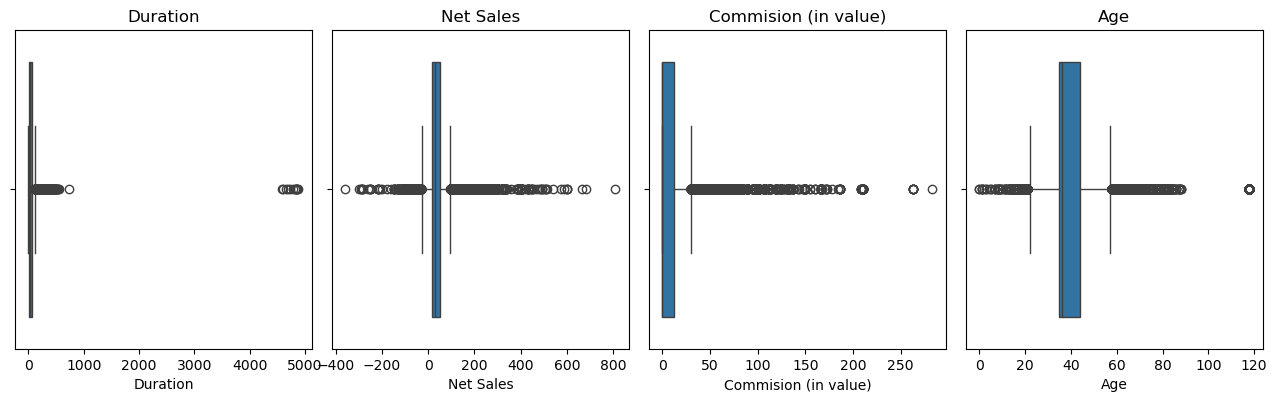

In [247]:
plt.figure(figsize=(16, 15))

col_num = []
for i in df.columns:
    if (df[i].dtype == "float64") | (df[i].dtype == 'int64'):
        col_num.append(i)

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 5) + (len(col_num) % 5), 5, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

## 1.6 Set Data Clean

In [248]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region,Product Name Bundle
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No,ASIA,Annual Plans
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No,ASIA,Cancellation Plans
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No,ASIA,Basic Plans
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No,AMERICA,Comprehensive Plans
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No,ASIA,Other Plans


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39324 entries, 0 to 44327
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39324 non-null  object 
 1   Agency Type           39324 non-null  object 
 2   Distribution Channel  39324 non-null  object 
 3   Product Name          39324 non-null  object 
 4   Duration              39324 non-null  int64  
 5   Destination           39311 non-null  object 
 6   Net Sales             39324 non-null  float64
 7   Commision (in value)  39324 non-null  float64
 8   Age                   39324 non-null  int64  
 9   Claim                 39324 non-null  object 
 10  Region                39311 non-null  object 
 11  Product Name Bundle   39324 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.9+ MB


In [250]:
print(f'''Statistik Data DF menunjukan bahwa data setelah dilakukan cleaning dan enginering memiliki
jumlah Baris            : {df.shape[0]}
jumlah Kolom            : {df.shape[1]}
Kolom bersifat object   : {df.dtypes.value_counts()[0]}
Kolom bersifat int64    : {df.dtypes.value_counts()[1]}
Kolom bersifat float64  : {df.dtypes.value_counts()[2]}
''')

Statistik Data DF menunjukan bahwa data setelah dilakukan cleaning dan enginering memiliki
jumlah Baris            : 39324
jumlah Kolom            : 12
Kolom bersifat object   : 8
Kolom bersifat int64    : 2
Kolom bersifat float64  : 2



In [251]:
# RUN THIS to save as EXCEL
#df.to_excel('Data Clean.xlsx', index=False)

# RUN THIS to save as csv
# df.to_csv('Data Clean.csv', index=False)

# RUN THIS to save as JSON
#df.to_json('Data Clean.json', index=False)

# 2. EDA

## 2.1 Scatterplot Graph

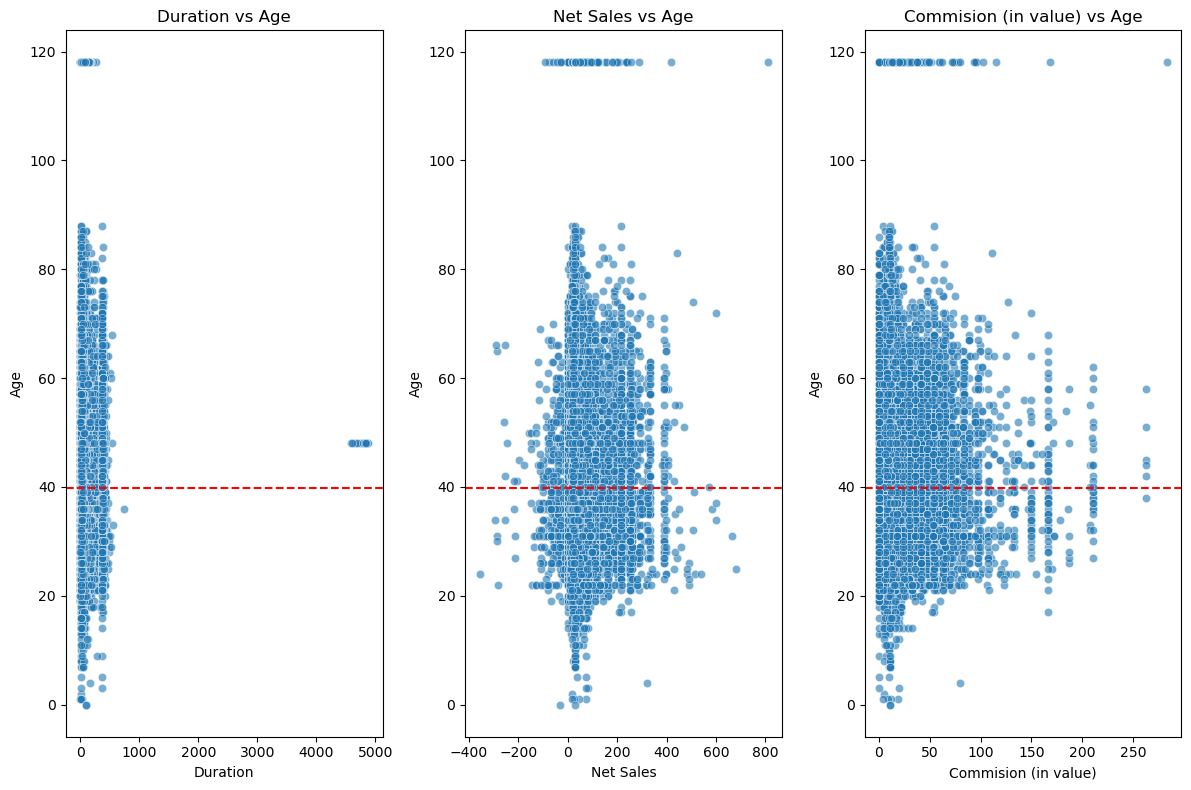

In [252]:
# Pilih kolom numerik
col_num = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]

# Buat figure
plt.figure(figsize=(20, 8))
rows = (len(col_num) + 4) // 5  # Atur jumlah baris otomatis

# Buat subplot untuk setiap kolom
for i, col in enumerate(col_num):
    if col == col_num[-1]:  # Hindari plot kolom terakhir melawan dirinya sendiri
        continue
    
    plt.subplot(rows, 5, i+1)
    
    # Buat scatter plot
    sns.scatterplot(data=df, x=col, y=col_num[-1], alpha=0.6)
    
    # Tambahkan garis rata-rata
    mean_y = df[col_num[-1]].mean()
    plt.axhline(y=mean_y, color='r', linestyle='--')
    
    # Kustomisasi judul dan label
    plt.title(f'{col} vs {col_num[-1]}')
    plt.xlabel(f'{col}')
    plt.ylabel(f'{col_num[-1]}')

# Atur tata letak yang rapi
plt.tight_layout()
plt.show()

## 2.2 Heatmap Graph

<Axes: >

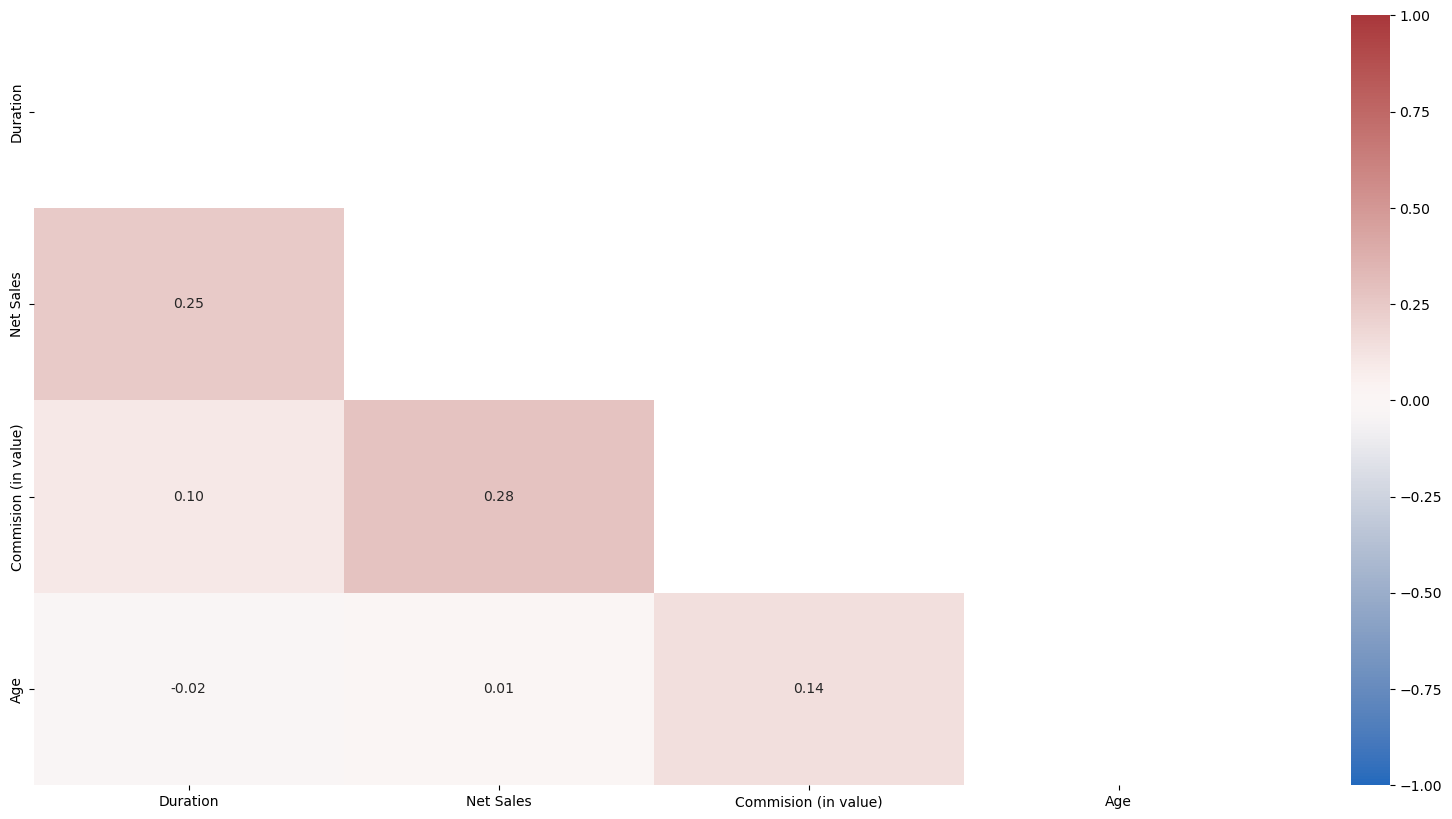

In [253]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr('spearman', numeric_only=True), dtype=bool))
sns.heatmap(df.corr('spearman', numeric_only=True),mask=mask, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='vlag')

## 2.3 Boxplot Graph

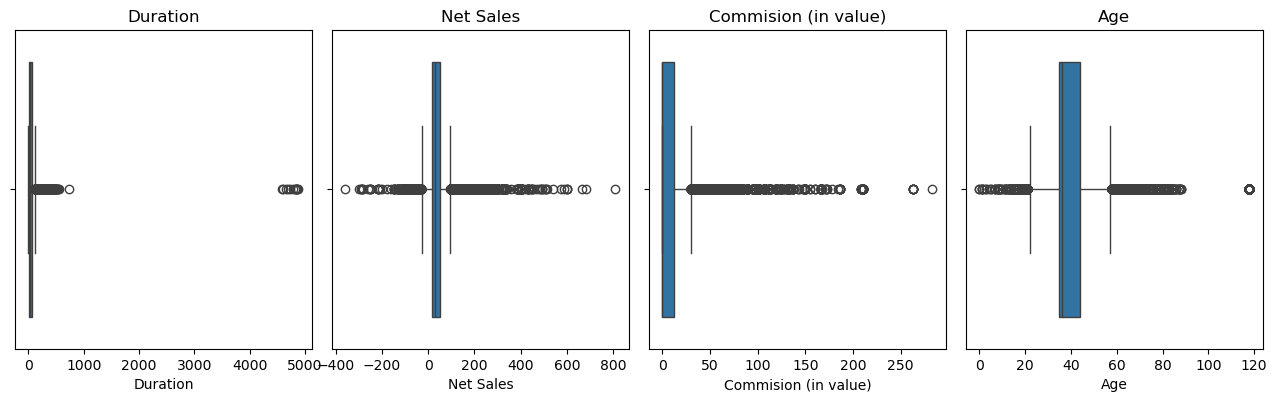

In [254]:
plt.figure(figsize=(16, 15))

col_num = []
for i in df.columns:
    if (df[i].dtype == "float64") | (df[i].dtype == 'int64'):
        col_num.append(i)

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 5) + (len(col_num) % 5), 5, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

## 2.4 Countplot Graph

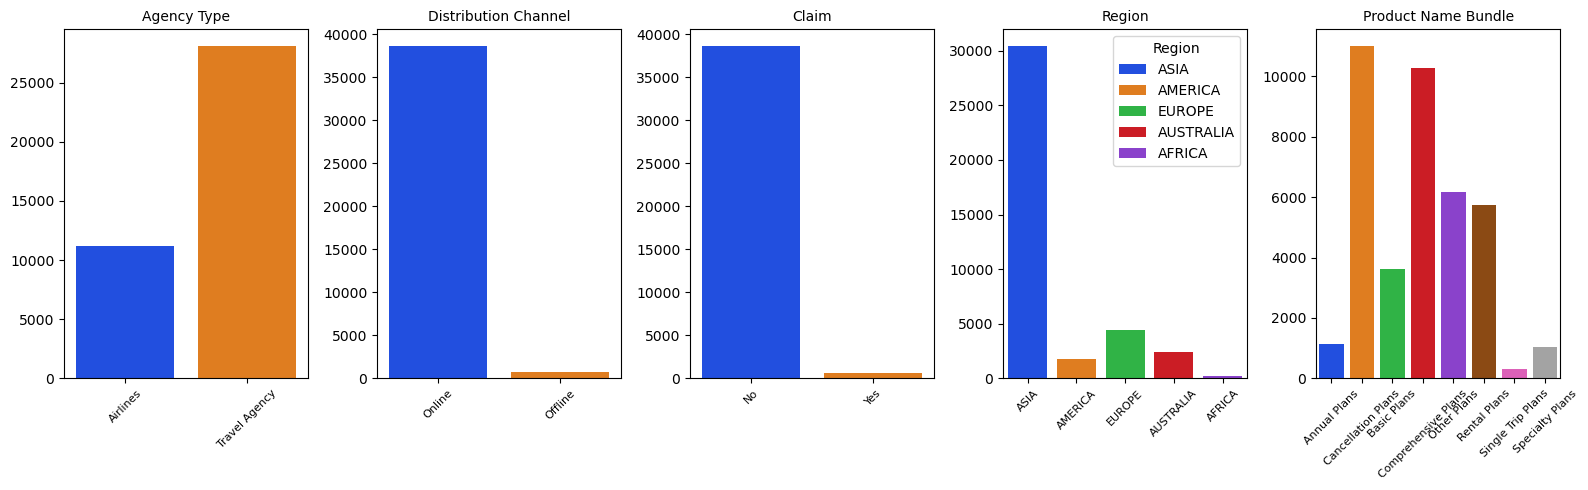

In [255]:
plt.figure(figsize=(16, 5))

col_num = []
for i in df.columns:
    if (df[i].dtype == "object") and (df[i].nunique() < 10):
        col_num.append(i)

for i, col in enumerate(col_num):
    rows = (len(col_num) + 4) // 5
    plt.subplot(rows, 5, i + 1) 
    sns.countplot(data=df, x=col, hue=col, palette='bright')
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

## 2.5 Statistical Dataset

### 2.5.1 Kolom Claim

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

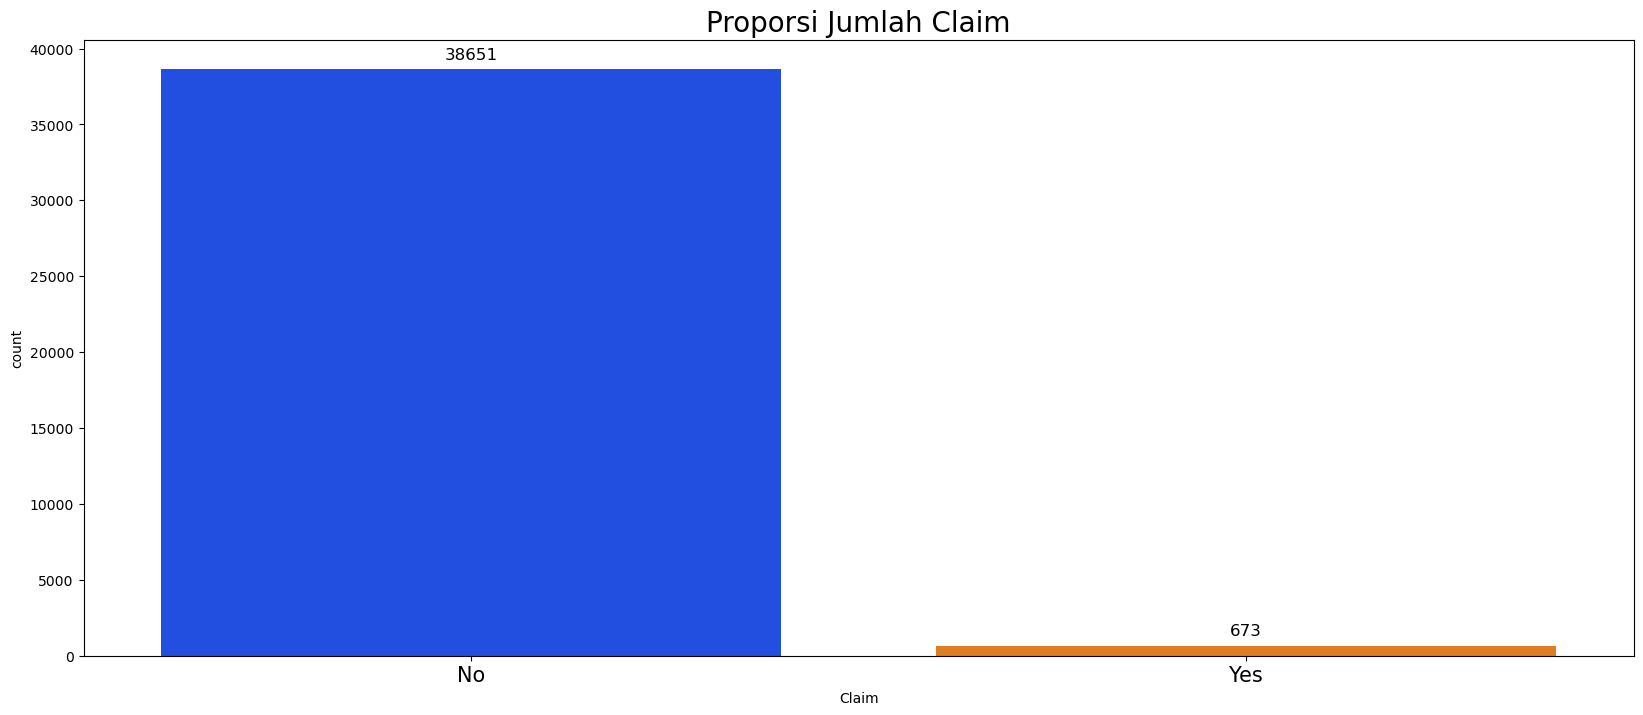

In [256]:
plt.figure(figsize=(20,8))
plt.title('Proporsi Jumlah Claim', size=20) 
sns_plot = sns.countplot(data=df,x='Claim', hue='Claim',palette='bright')
for p in sns_plot.patches:
    sns_plot.annotate(f'{p.get_height():.0f}',  # Nilai di atas batang
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                      ha='center', va='bottom', fontsize=12, color='black', 
                      xytext=(0, 5), textcoords='offset points')
plt.xticks(size=15)

In [257]:
df_count_claim = df['Claim'].value_counts()/len(df)*100
print(f'''Jumlah perbandingan Claim No berjumlah : {round(df_count_claim[0],2)} %
Jumlah Claim Yes berjumlah             : {round(df_count_claim[1],2)} %
Kesimpulan                             : Jumlah Populasi Tidak Terdistribusi Merata (Imbalance)
Decision                               : Mengubah Yes/No sesuai dengan Default (No=0)/(Yes=1)
Konsep Data                            : Label/Target
Method                                 : Membutuhkan Metode Resample''')

Jumlah perbandingan Claim No berjumlah : 98.29 %
Jumlah Claim Yes berjumlah             : 1.71 %
Kesimpulan                             : Jumlah Populasi Tidak Terdistribusi Merata (Imbalance)
Decision                               : Mengubah Yes/No sesuai dengan Default (No=0)/(Yes=1)
Konsep Data                            : Label/Target
Method                                 : Membutuhkan Metode Resample


In [258]:
df['Claim'] = np.where(df['Claim']=='Yes',1,0)

### 2.5.2 Kolom Destination

In [259]:
df_destination_all = df.groupby('Destination').size().sort_values(ascending=False).reset_index(name='jumlah')
df_destination = df.groupby('Destination').size().sort_values(ascending=False).reset_index(name='jumlah').head(10)
df_destination

,Destination,jumlah
0,SINGAPORE,8106
1,THAILAND,3659
2,MALAYSIA,3173
3,CHINA,2931
4,AUSTRALIA,2453
5,INDONESIA,2029
6,UNITED STATES,1723
7,HONG KONG,1570
8,PHILIPPINES,1461
9,JAPAN,1395


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'SINGAPORE'),
  Text(1, 0, 'THAILAND'),
  Text(2, 0, 'MALAYSIA'),
  Text(3, 0, 'CHINA'),
  Text(4, 0, 'AUSTRALIA'),
  Text(5, 0, 'INDONESIA'),
  Text(6, 0, 'UNITED STATES'),
  Text(7, 0, 'HONG KONG'),
  Text(8, 0, 'PHILIPPINES'),
  Text(9, 0, 'JAPAN')])

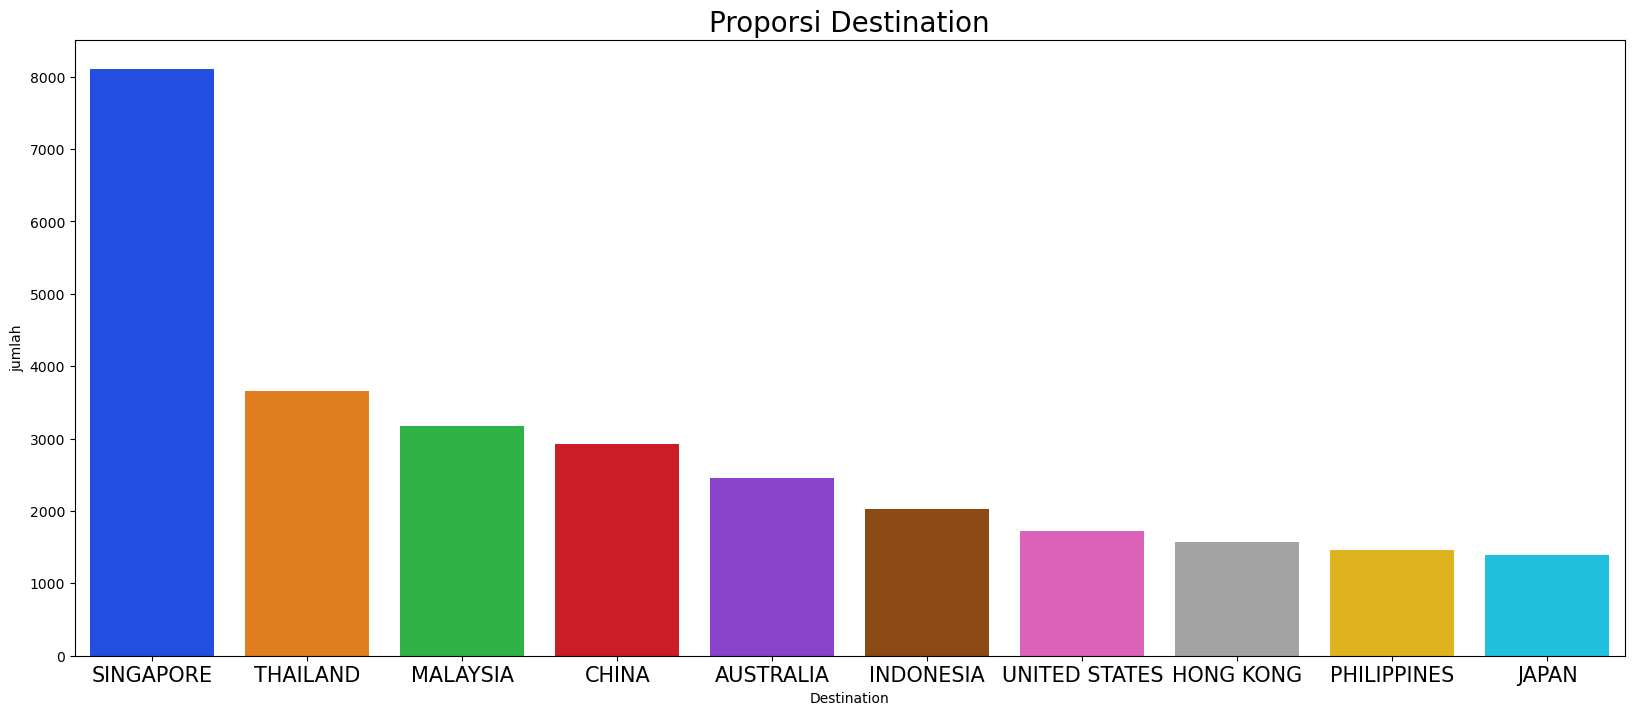

In [260]:
plt.figure(figsize=(20, 8))
plt.title('Proporsi Destination', size=20)
sns_plot = sns.barplot(data=df_destination, x='Destination',y='jumlah', hue='Destination', palette='bright')

for i, artist in enumerate(sns_plot.artists):
    x = artist.get_x() + artist.get_width() / 2
    median_line = sns_plot.lines[i * 6 + 4]  # Mendapatkan garis median
    y = median_line.get_ydata()[0]  # Posisi y dari median
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(size=15)


In [261]:
df_destination.dtypes[1]

dtype('int64')

In [262]:
print(f'''Jumlah perbandingan Destination Tertinggi berjumlah             : {df_destination.iloc[0][0]} {round(((df_destination.iloc[0][1])/(sum(df_destination.iloc[:,1])))*100,2)} %
Jumlah Destination Terkecil berjumlah                           : {df_destination.iloc[9][0]} {round((df_destination.iloc[9][1])/sum(df_destination.iloc[:,1])*100,2)} %
Kesimpulan                                                      : {df_destination.iloc[0][0]} menempati posisi 1 , dan {df_destination.iloc[9][0]} menempati posisi terakhir
Konsep Data                                                     : Feature/Variable
Method                                                          : Membutuhkan Metode RobustScaler, karena bentuk data {df_destination.dtypes[1]},
                                                                  RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                  Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                  Data tidak berupa kategorikal/ kategorikal hirarki sehingga tidak diperlukan Encoding

 ''')

Jumlah perbandingan Destination Tertinggi berjumlah             : SINGAPORE 28.44 %
Jumlah Destination Terkecil berjumlah                           : JAPAN 4.89 %
Kesimpulan                                                      : SINGAPORE menempati posisi 1 , dan JAPAN menempati posisi terakhir
Konsep Data                                                     : Feature/Variable
Method                                                          : Membutuhkan Metode RobustScaler, karena bentuk data int64,
                                                                  RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                  Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                  Data tidak berupa kategorikal/ kategorikal hirarki sehingga tidak diperlukan Encoding

 


In [263]:
print(f'''
Insight : 
1. Summary
    - Singapura sebagai destinasi utama menunjukkan bahwa mayoritas pelanggan asuransi travel lebih memilih ke negara ini.
        Hal ini bisa disebabkan oleh banyaknya pelancong yang menganggap Singapura sebagai tujuan populer karena faktor kedekatan geografis, bisnis, atau wisata.

    - Thailand dan Malaysia berada di peringkat kedua dan ketiga. 
        Ini menunjukkan bahwa negara-negara ini juga populer, kemungkinan karena daya tarik wisata yang tinggi (pantai, budaya, atau festival).
        Selain itu, kedekatan wilayah membuat perjalanan lebih terjangkau, sehingga banyak yang membeli asuransi travel untuk perjalanan ke negara ini.

    - Negara seperti China, Australia, dan Amerika Serikat menunjukkan angka rata-rata. 
        Ini bisa mencerminkan perjalanan yang lebih mahal atau lebih jarang dilakukan oleh pelanggan dibandingkan dengan destinasi Asia Tenggara lainnya.

    - Filipina, Hong Kong, dan Jepang memiliki proporsi yang relatif kecil. 
        Ini bisa terjadi karena kendala seperti kurangnya promosi, biaya perjalanan tinggi, atau perubahan tren wisata.

2. Recomendation
- Aksi untuk Perusahaan Asuransi (Finance):
    Tawarkan paket asuransi khusus untuk destinasi populer seperti Singapura, Thailand, dan Malaysia.
    Berikan tambahan manfaat seperti perlindungan kesehatan, bagasi, atau pembatalan perjalanan.
      
- Edukasi Pasar pada Destinasi Lain (Public Relationship):
    Dorong pelanggan untuk mempertimbangkan destinasi seperti Filipina dan Jepang dengan mempromosikan fitur unik destinasi ini.
    Misalnya, tunjukkan perlindungan risiko perjalanan yang relevan, seperti bencana alam, terutama untuk destinasi rawan.

- Optimalkan Penetrasi Pasar Global (Marketing):
    Untuk negara-negara seperti Amerika Serikat dan Australia, tingkatkan penawaran paket premi tinggi dengan cakupan lebih luas, menargetkan pelancong bisnis atau perjalanan jangka panjang.''')


Insight : 
1. Summary
    - Singapura sebagai destinasi utama menunjukkan bahwa mayoritas pelanggan asuransi travel lebih memilih ke negara ini.
        Hal ini bisa disebabkan oleh banyaknya pelancong yang menganggap Singapura sebagai tujuan populer karena faktor kedekatan geografis, bisnis, atau wisata.

    - Thailand dan Malaysia berada di peringkat kedua dan ketiga. 
        Ini menunjukkan bahwa negara-negara ini juga populer, kemungkinan karena daya tarik wisata yang tinggi (pantai, budaya, atau festival).
        Selain itu, kedekatan wilayah membuat perjalanan lebih terjangkau, sehingga banyak yang membeli asuransi travel untuk perjalanan ke negara ini.

    - Negara seperti China, Australia, dan Amerika Serikat menunjukkan angka rata-rata. 
        Ini bisa mencerminkan perjalanan yang lebih mahal atau lebih jarang dilakukan oleh pelanggan dibandingkan dengan destinasi Asia Tenggara lainnya.

    - Filipina, Hong Kong, dan Jepang memiliki proporsi yang relatif kecil. 
      

### 2.5.3 Kolom Region 

In [264]:
df_region_all = df.groupby('Region').size().sort_values(ascending=False).reset_index(name='jumlah')
df_region = df.groupby('Region').size().sort_values(ascending=False).reset_index(name='jumlah').head(10)
df_region

,Region,jumlah
0,ASIA,30444
1,EUROPE,4404
2,AUSTRALIA,2456
3,AMERICA,1790
4,AFRICA,217


([0, 1, 2, 3, 4],
 [Text(0, 0, 'ASIA'),
  Text(1, 0, 'EUROPE'),
  Text(2, 0, 'AUSTRALIA'),
  Text(3, 0, 'AMERICA'),
  Text(4, 0, 'AFRICA')])

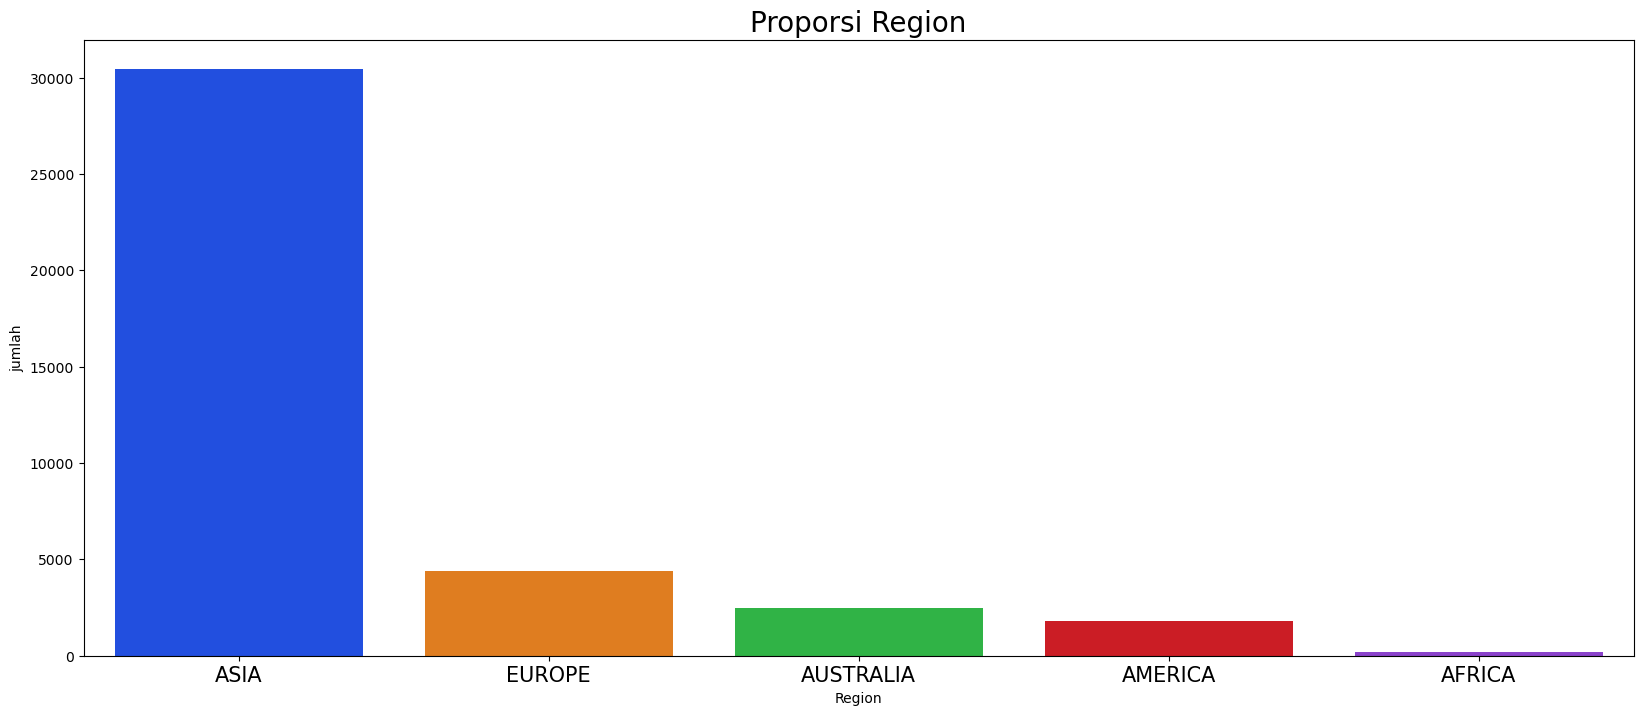

In [265]:
plt.figure(figsize=(20, 8))
plt.title('Proporsi Region', size=20)
sns_plot = sns.barplot(data=df_region, x='Region',y='jumlah', hue='Region', palette='bright')

for i, artist in enumerate(sns_plot.artists):
    x = artist.get_x() + artist.get_width() / 2
    median_line = sns_plot.lines[i * 6 + 4]  # Mendapatkan garis median
    y = median_line.get_ydata()[0]  # Posisi y dari median
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(size=15)

In [266]:
print(f'''Jumlah perbandingan Destination Tertinggi berjumlah             : {df_region.iloc[0][0]} {round(((df_region.iloc[0][1])/(sum(df_region.iloc[:,1])))*100,2)} %
Jumlah Destination Terkecil berjumlah                           : {df_region.iloc[4][0]} {round((df_region.iloc[4][1])/sum(df_region.iloc[:,1])*100,2)} %
Kesimpulan                                                      : {df_region.iloc[0][0]} menempati posisi 1 , dan {df_region.iloc[4][0]} menempati posisi terakhir
Konsep Data                                                     : Feature/Variable
Method                                                          : Membutuhkan Metode RobustScaler, karena bentuk data {df_region.dtypes[1]},
                                                                  RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                  Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                  Data tidak berupa kategorikal/ kategorikal hirarki sehingga tidak diperlukan Encoding

 ''')

Jumlah perbandingan Destination Tertinggi berjumlah             : ASIA 77.44 %
Jumlah Destination Terkecil berjumlah                           : AFRICA 0.55 %
Kesimpulan                                                      : ASIA menempati posisi 1 , dan AFRICA menempati posisi terakhir
Konsep Data                                                     : Feature/Variable
Method                                                          : Membutuhkan Metode RobustScaler, karena bentuk data int64,
                                                                  RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                  Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                  Data tidak berupa kategorikal/ kategorikal hirarki sehingga tidak diperlukan Encoding

 


In [267]:
print(f'''
Insight :
1. Summary 
    - Asia memiliki jumlah yang jauh lebih besar dibandingkan wilayah lain, dengan lebih dari 30.000 entitas (pelanggan, polis, atau klaim, tergantung pada konteks data). Ini menunjukkan bahwa aktivitas atau fokus utama perusahaan asuransi travel mungkin berpusat di Asia, baik dari segi pangsa pasar, klien, atau destinasi yang dilayani.
    Wilayah Lain yang Signifikan

    - Eropa menempati posisi kedua dengan jumlah entitas yang signifikan, meskipun jauh lebih kecil daripada Asia. Ini menunjukkan bahwa Eropa masih menjadi pasar penting, tetapi tidak sebesar Asia.
    Wilayah dengan Pangsa Pasar Kecil

    - Australia, Amerika, dan Afrika memiliki jumlah yang relatif kecil dibandingkan Asia dan Eropa. 
    Afrika khususnya terlihat sangat kecil, yang bisa mengindikasikan:
        1. Kurangnya penetrasi pasar asuransi di wilayah ini.
        2. Fokus bisnis perusahaan yang lebih rendah di wilayah ini.
        3. Potensi untuk mengembangkan pasar baru di wilayah ini.
      
2. Recomendation
    - (Operasional) Perusahaan dapat memprioritaskan penguatan operasional dan produk di wilayah Asia untuk mempertahankan dominasi.
    - (Marketing) Untuk wilayah dengan pangsa kecil, strategi ekspansi atau promosi mungkin diperlukan untuk meningkatkan kehadiran perusahaan.
''')


Insight :
1. Summary 
    - Asia memiliki jumlah yang jauh lebih besar dibandingkan wilayah lain, dengan lebih dari 30.000 entitas (pelanggan, polis, atau klaim, tergantung pada konteks data). Ini menunjukkan bahwa aktivitas atau fokus utama perusahaan asuransi travel mungkin berpusat di Asia, baik dari segi pangsa pasar, klien, atau destinasi yang dilayani.
    Wilayah Lain yang Signifikan

    - Eropa menempati posisi kedua dengan jumlah entitas yang signifikan, meskipun jauh lebih kecil daripada Asia. Ini menunjukkan bahwa Eropa masih menjadi pasar penting, tetapi tidak sebesar Asia.
    Wilayah dengan Pangsa Pasar Kecil

    - Australia, Amerika, dan Afrika memiliki jumlah yang relatif kecil dibandingkan Asia dan Eropa. 
    Afrika khususnya terlihat sangat kecil, yang bisa mengindikasikan:
        1. Kurangnya penetrasi pasar asuransi di wilayah ini.
        2. Fokus bisnis perusahaan yang lebih rendah di wilayah ini.
        3. Potensi untuk mengembangkan pasar baru di wilayah i

### 2.5.4 Kolom Product Name Bundle

In [268]:
df_product_all = df.groupby('Product Name Bundle').size().sort_values(ascending=False).reset_index(name='jumlah')
df_product = df.groupby('Product Name Bundle').size().sort_values(ascending=False).reset_index(name='jumlah').head(10)
df_product

,Product Name Bundle,jumlah
0,Cancellation Plans,11009
1,Comprehensive Plans,10286
2,Other Plans,6188
3,Rental Plans,5726
4,Basic Plans,3638
5,Annual Plans,1140
6,Specialty Plans,1040
7,Single Trip Plans,297


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Cancellation Plans'),
  Text(1, 0, 'Comprehensive Plans'),
  Text(2, 0, 'Other Plans'),
  Text(3, 0, 'Rental Plans'),
  Text(4, 0, 'Basic Plans'),
  Text(5, 0, 'Annual Plans'),
  Text(6, 0, 'Specialty Plans'),
  Text(7, 0, 'Single Trip Plans')])

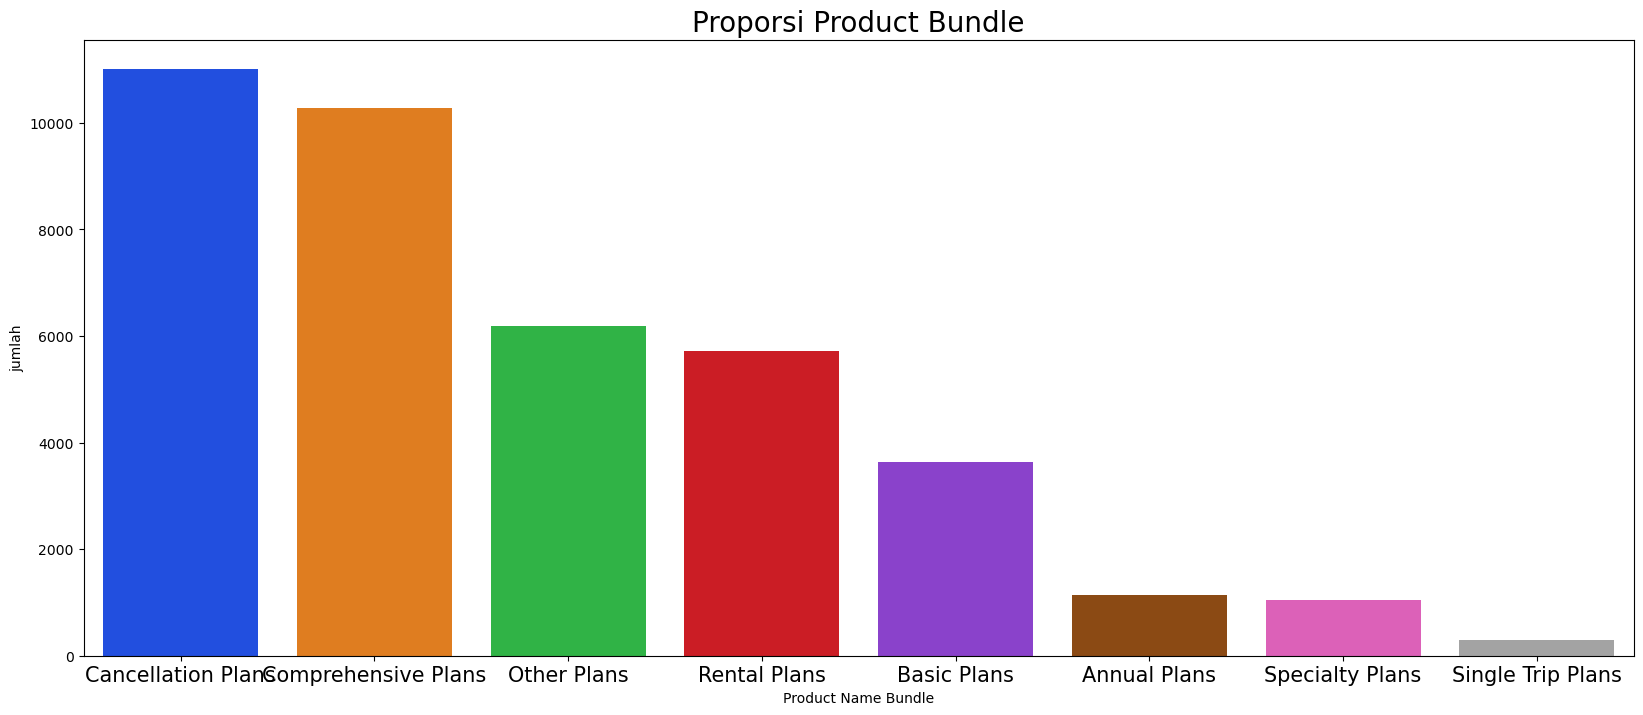

In [269]:
plt.figure(figsize=(20, 8))
plt.title('Proporsi Product Bundle', size=20)
sns_plot = sns.barplot(data=df_product, x='Product Name Bundle',y='jumlah', hue='Product Name Bundle', palette='bright')

for i, artist in enumerate(sns_plot.artists):
    x = artist.get_x() + artist.get_width() / 2
    median_line = sns_plot.lines[i * 6 + 4]  # Mendapatkan garis median
    y = median_line.get_ydata()[0]  # Posisi y dari median
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(size=15)

In [270]:
print(f'''Jumlah perbandingan Product Tertinggi berjumlah                 : {df_product.iloc[0][0]} {round(((df_product.iloc[0][1])/(sum(df_product.iloc[:,1])))*100,2)} %
Jumlah Product Terkecil berjumlah                               : {df_product.iloc[7][0]} {round((df_product.iloc[7][1])/sum(df_product.iloc[:,1])*100,2)} %
Kesimpulan                                                      : {df_product.iloc[0][0]} menempati posisi 1 , dan {df_product.iloc[7][0]} menempati posisi terakhir
Konsep Data                                                     : Feature/Variable
Method                                                          : Membutuhkan Metode RobustScaler, karena bentuk data {df_product.dtypes[1]},
                                                                  RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                  Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                  Data tidak berupa kategorikal/ kategorikal hirarki sehingga tidak diperlukan Encoding

 ''')

Jumlah perbandingan Product Tertinggi berjumlah                 : Cancellation Plans 28.0 %
Jumlah Product Terkecil berjumlah                               : Single Trip Plans 0.76 %
Kesimpulan                                                      : Cancellation Plans menempati posisi 1 , dan Single Trip Plans menempati posisi terakhir
Konsep Data                                                     : Feature/Variable
Method                                                          : Membutuhkan Metode RobustScaler, karena bentuk data int64,
                                                                  RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                  Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                  Data tidak berupa kategorikal/ kategorikal hirarki sehingga tid

In [271]:
print(f'''
Insight: 
1. Summary
    - Cancellation Plans adalah produk asuransi paling populer dengan jumlah pengguna tertinggi. Ini menunjukkan bahwa pelanggan sangat peduli terhadap risiko pembatalan perjalanan, terutama karena faktor ketidakpastian seperti kesehatan, cuaca, atau perubahan jadwal.
      
    - Comprehensive Plans berada di peringkat kedua, menunjukkan minat tinggi pada perlindungan menyeluruh yang mencakup berbagai risiko perjalanan (kesehatan, bagasi, pembatalan, dll.).
      Pelanggan yang memilih ini kemungkinan adalah pelancong yang lebih sadar akan risiko dan mencari perlindungan maksimal.

    - Produk seperti Single Trip Plans dan Specialty Plans memiliki proporsi paling kecil. Ini bisa mengindikasikan bahwa:
      Pelanggan lebih sering bepergian dan membutuhkan rencana tahunan atau perlindungan luas.
      Kurangnya kesadaran atau pemasaran produk ini.

    - Rental Plans dan Basic Plans memiliki posisi tengah, menunjukkan permintaan stabil untuk perlindungan dasar seperti kerusakan kendaraan atau cakupan minimum untuk pelancong hemat.

    - Annual Plans memiliki permintaan lebih rendah dibandingkan Comprehensive atau Cancellation Plans, meskipun lebih ekonomis untuk pelancong reguler.
      Kemungkinan karena target pasar yang lebih sempit, seperti pelancong bisnis atau individu yang sering bepergian.

2. Recomendation
    - Perkuat Pemasaran Cancellation dan Comprehensive Plans (Marketing):
        Fokus pada mempromosikan manfaat tambahan dari kedua produk unggulan ini.
        Misalnya, tingkatkan fitur khusus seperti perlindungan COVID-19 atau kompensasi cepat untuk pembatalan.
      
    - Optimalkan Promosi Specialty dan Single Trip Plans (Public Relationship):
        Tawarkan insentif atau diskon untuk memikat pelanggan baru pada produk ini.
        Edukasi pasar mengenai keuntungan yang ditawarkan untuk perjalanan singkat atau kebutuhan spesifik.

    - Segmentasi Pelanggan untuk Rental dan Basic Plans (Marketing):
        Rental Plans bisa dipromosikan kepada pelancong yang menyewa kendaraan (mobil atau motor).
        Basic Plans cocok untuk pelanggan yang ingin solusi hemat dengan cakupan dasar.
      
    - Peningkatan Penjualan Bundel (Marketing):
        Tawarkan paket bundel, seperti Cancellation + Rental Plans, untuk meningkatkan nilai pelanggan sekaligus mendorong pembelian multiple produk.''')


Insight: 
1. Summary
    - Cancellation Plans adalah produk asuransi paling populer dengan jumlah pengguna tertinggi. Ini menunjukkan bahwa pelanggan sangat peduli terhadap risiko pembatalan perjalanan, terutama karena faktor ketidakpastian seperti kesehatan, cuaca, atau perubahan jadwal.
      
    - Comprehensive Plans berada di peringkat kedua, menunjukkan minat tinggi pada perlindungan menyeluruh yang mencakup berbagai risiko perjalanan (kesehatan, bagasi, pembatalan, dll.).
      Pelanggan yang memilih ini kemungkinan adalah pelancong yang lebih sadar akan risiko dan mencari perlindungan maksimal.

    - Produk seperti Single Trip Plans dan Specialty Plans memiliki proporsi paling kecil. Ini bisa mengindikasikan bahwa:
      Pelanggan lebih sering bepergian dan membutuhkan rencana tahunan atau perlindungan luas.
      Kurangnya kesadaran atau pemasaran produk ini.

    - Rental Plans dan Basic Plans memiliki posisi tengah, menunjukkan permintaan stabil untuk perlindungan dasar se

### 2.5.5 Kolom Agency Based on Claim

In [272]:
df_agencyclaim_all = df[df['Claim'] == 1].groupby('Agency').size().sort_values(ascending=False).reset_index(name='jumlah')
df_agencyclaim = df[df['Claim'] == 1].groupby('Agency').size().sort_values(ascending=False).reset_index(name='jumlah').head(10)
df_agencyclaim

,Agency,jumlah
0,C2B,403
1,EPX,133
2,CWT,64
3,LWC,29
4,JZI,22
5,KML,5
6,SSI,5
7,JWT,4
8,CCR,2
9,TST,2


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'C2B'),
  Text(1, 0, 'EPX'),
  Text(2, 0, 'CWT'),
  Text(3, 0, 'LWC'),
  Text(4, 0, 'JZI'),
  Text(5, 0, 'KML'),
  Text(6, 0, 'SSI'),
  Text(7, 0, 'JWT'),
  Text(8, 0, 'CCR'),
  Text(9, 0, 'TST')])

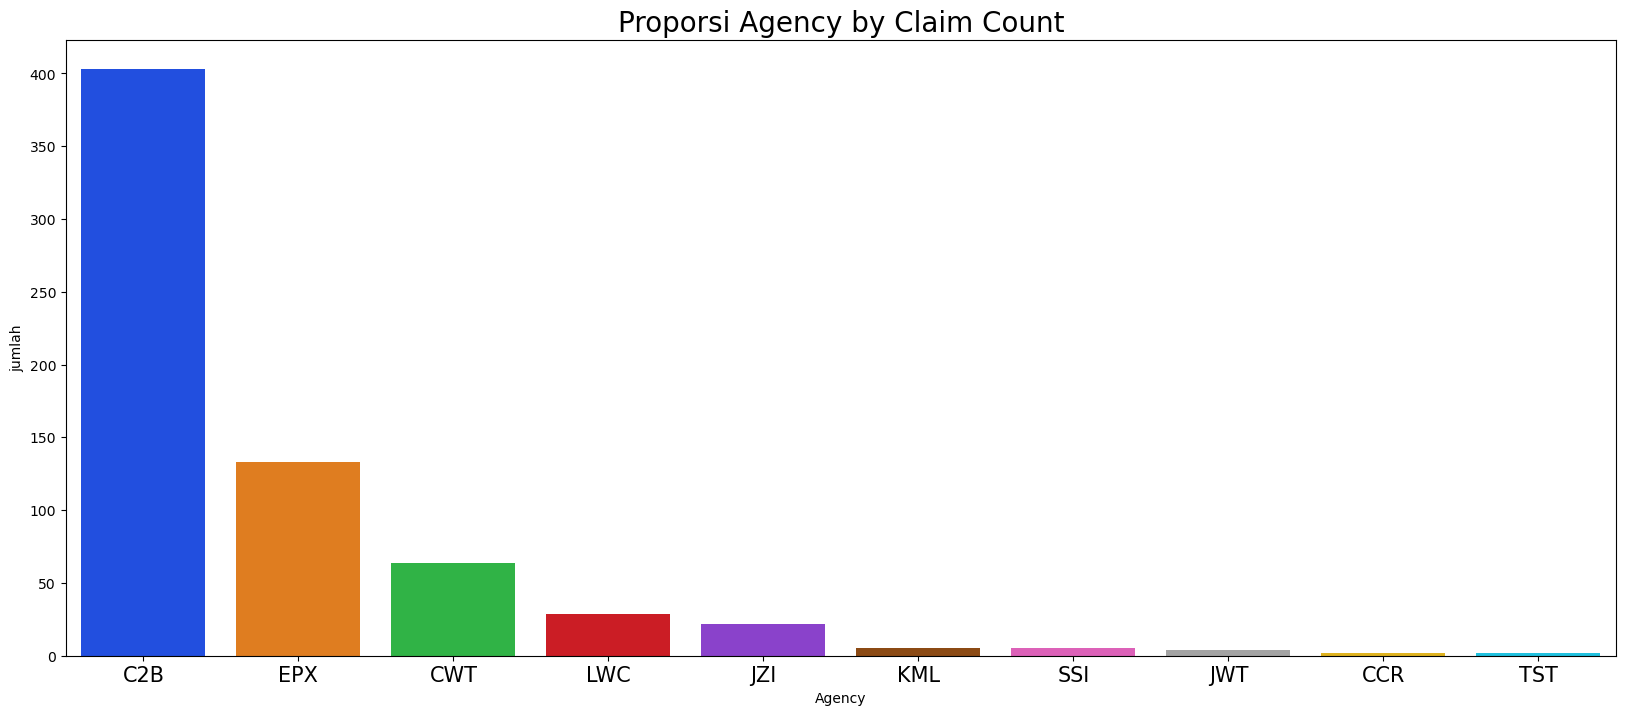

In [273]:
plt.figure(figsize=(20, 8))
plt.title('Proporsi Agency by Claim Count', size=20)
sns_plot = sns.barplot(data=df_agencyclaim, x='Agency',y='jumlah', hue='Agency', palette='bright')

for i, artist in enumerate(sns_plot.artists):
    x = artist.get_x() + artist.get_width() / 2
    median_line = sns_plot.lines[i * 6 + 4]  # Mendapatkan garis median
    y = median_line.get_ydata()[0]  # Posisi y dari median
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(size=15)

In [274]:
print(f'''Jumlah perbandingan Agency by Claim Tertinggi berjumlah             : {df_agencyclaim.iloc[0][0]} {round(((df_agencyclaim.iloc[0][1])/(sum(df_agencyclaim.iloc[:,1])))*100,2)} %
Jumlah Agency by Claim Terkecil berjumlah                           : {df_agencyclaim.iloc[9][0]} {round((df_agencyclaim.iloc[9][1])/sum(df_agencyclaim.iloc[:,1])*100,2)} %
Kesimpulan                                                          : {df_agencyclaim.iloc[0][0]} menempati posisi 1 , dan {df_agencyclaim.iloc[9][0]} menempati posisi terakhir
Konsep Data                                                         : Feature/Variable
Method                                                              : Membutuhkan Metode RobustScaler, karena bentuk data {df_agencyclaim.dtypes[1]},
                                                                      RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                      Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                      Data tidak berupa kategorikal/ kategorikal hirarki sehingga tidak diperlukan Encoding

 ''')

Jumlah perbandingan Agency by Claim Tertinggi berjumlah             : C2B 60.24 %
Jumlah Agency by Claim Terkecil berjumlah                           : TST 0.3 %
Kesimpulan                                                          : C2B menempati posisi 1 , dan TST menempati posisi terakhir
Konsep Data                                                         : Feature/Variable
Method                                                              : Membutuhkan Metode RobustScaler, karena bentuk data int64,
                                                                      RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                      Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                      Data tidak berupa kategorikal/ kategorikal hirarki sehingga tidak diperlukan Encoding

 


In [275]:
print(f'''
Insight:
1. Summary
    - Dominasi klaim dari C2B bisa disebabkan oleh volume penjualan yang lebih tinggi dibandingkan agency lain.
      Sebaliknya, agency dengan jumlah klaim rendah kemungkinan melayani pelanggan dalam skala kecil atau memiliki fokus pada produk yang berbeda.

    - Jika C2B dan EPX menawarkan produk dengan perlindungan yang luas atau untuk perjalanan dengan risiko lebih tinggi, ini dapat meningkatkan peluang klaim.
      Agency lain mungkin fokus pada produk atau segmen pasar yang lebih kecil dengan risiko lebih rendah.

    - Agency dengan klaim rendah (TST, CCR) juga dapat mencerminkan layanan atau proses yang lebih ketat dalam menyeleksi klaim, atau basis pelanggan mereka yang cenderung lebih hati-hati.

2. Recomendation
    - Tingkatkan Dukungan pada C2B dan EPX (Operasional):
        Karena kedua agency ini menghasilkan klaim terbesar, penting untuk memastikan proses klaim yang efisien dan dukungan pelanggan yang memadai.
        Lakukan evaluasi mendalam untuk mengidentifikasi pola klaim dan potensi masalah pada produk/layanan mereka.
      
    - Optimalkan Agency dengan Jumlah Klaim Rendah (Operasional):
        Analisis mendalam diperlukan untuk memahami mengapa agency seperti JWT, CCR, dan TST memiliki klaim rendah.
        Apakah ini karena kurangnya aktivitas penjualan, fokus pasar yang berbeda, atau produk yang kurang diminati? Berikan pelatihan atau dukungan untuk meningkatkan kinerja mereka.

    - Edukasi dan Pemasaran (Public Relationship):
        Fokus pada edukasi pelanggan agency dengan jumlah klaim rendah untuk meningkatkan penjualan produk yang sesuai dengan kebutuhan mereka.
        Tingkatkan pemasaran pada agency-agency kecil untuk memperluas basis pelanggan mereka.
      ''')


Insight:
1. Summary
    - Dominasi klaim dari C2B bisa disebabkan oleh volume penjualan yang lebih tinggi dibandingkan agency lain.
      Sebaliknya, agency dengan jumlah klaim rendah kemungkinan melayani pelanggan dalam skala kecil atau memiliki fokus pada produk yang berbeda.

    - Jika C2B dan EPX menawarkan produk dengan perlindungan yang luas atau untuk perjalanan dengan risiko lebih tinggi, ini dapat meningkatkan peluang klaim.
      Agency lain mungkin fokus pada produk atau segmen pasar yang lebih kecil dengan risiko lebih rendah.

    - Agency dengan klaim rendah (TST, CCR) juga dapat mencerminkan layanan atau proses yang lebih ketat dalam menyeleksi klaim, atau basis pelanggan mereka yang cenderung lebih hati-hati.

2. Recomendation
    - Tingkatkan Dukungan pada C2B dan EPX (Operasional):
        Karena kedua agency ini menghasilkan klaim terbesar, penting untuk memastikan proses klaim yang efisien dan dukungan pelanggan yang memadai.
        Lakukan evaluasi mendalam untu

### 2.5.6 Kolom Agency Based on Commision

In [276]:
df_agencycommision_all = df.groupby('Agency')['Commision (in value)'].sum().sort_values(ascending=False).reset_index(name='jumlah')
df_agencycommision = df.groupby('Agency')['Commision (in value)'].sum().sort_values(ascending=False).reset_index(name='jumlah').head(10)
df_agencycommision

,Agency,jumlah
0,CWT,187371.36
1,C2B,108982.73
2,JZI,50544.55
3,LWC,33269.02
4,JWT,7606.80
5,KML,5523.30
6,TST,3466.75
7,RAB,3245.20
8,ART,2426.91
9,ADM,2158.78


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'CWT'),
  Text(1, 0, 'C2B'),
  Text(2, 0, 'JZI'),
  Text(3, 0, 'LWC'),
  Text(4, 0, 'JWT'),
  Text(5, 0, 'KML'),
  Text(6, 0, 'TST'),
  Text(7, 0, 'RAB'),
  Text(8, 0, 'ART'),
  Text(9, 0, 'ADM')])

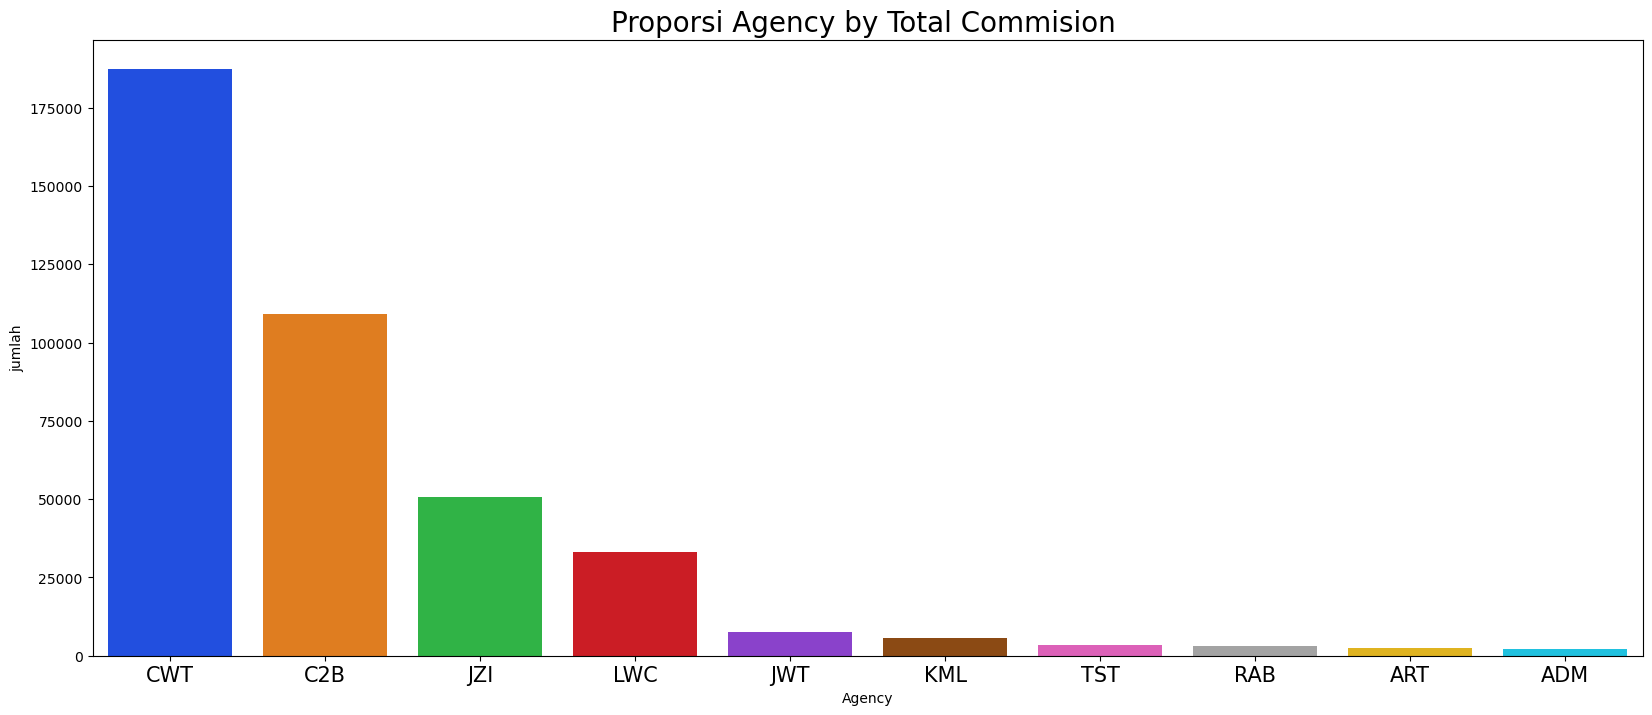

In [277]:
plt.figure(figsize=(20, 8))
plt.title('Proporsi Agency by Total Commision ', size=20)
sns_plot = sns.barplot(data=df_agencycommision, x='Agency',y='jumlah', hue='Agency', palette='bright')

for i, artist in enumerate(sns_plot.artists):
    x = artist.get_x() + artist.get_width() / 2
    median_line = sns_plot.lines[i * 6 + 4]  # Mendapatkan garis median
    y = median_line.get_ydata()[0]  # Posisi y dari median
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(size=15)

In [278]:
print(f'''Jumlah perbandingan Agency by Commision Tertinggi berjumlah             : {df_agencycommision.iloc[0][0]} {round(((df_agencycommision.iloc[0][1])/(sum(df_agencycommision.iloc[:,1])))*100,2)} %
Jumlah Agency by Commision Terkecil berjumlah                           : {df_agencycommision.iloc[9][0]} {round((df_agencycommision.iloc[9][1])/sum(df_agencycommision.iloc[:,1])*100,2)} %
Kesimpulan                                                              : {df_agencycommision.iloc[0][0]} menempati posisi 1 , dan {df_agencycommision.iloc[9][0]} menempati posisi terakhir
Konsep Data                                                             : Feature/Variable
Method                                                                  : Membutuhkan Metode RobustScaler, karena bentuk data {df_agencycommision.dtypes[1]},
                                                                          RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                          Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                          Data tidak berupa kategorikal/ kategorikal hirarki sehingga tidak diperlukan Encoding

 ''')

Jumlah perbandingan Agency by Commision Tertinggi berjumlah             : CWT 46.31 %
Jumlah Agency by Commision Terkecil berjumlah                           : ADM 0.53 %
Kesimpulan                                                              : CWT menempati posisi 1 , dan ADM menempati posisi terakhir
Konsep Data                                                             : Feature/Variable
Method                                                                  : Membutuhkan Metode RobustScaler, karena bentuk data float64,
                                                                          RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                          Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                          Data tidak berupa kategorikal/ kategorikal hirarki seh

In [279]:
print(f'''
Insight: 
1. Summary
    - Agency CWT memperoleh total komisi tertinggi dibandingkan agency lainnya, dengan jumlah yang signifikan lebih besar.
      Ini menunjukkan bahwa CWT mungkin memiliki volume transaksi atau nilai premi tertinggi, yang menghasilkan komisi besar.

    - Agency C2B berada di peringkat kedua dalam total komisi, selaras dengan dominasi klaimnya pada grafik sebelumnya.
      Hal ini menunjukkan bahwa C2B tidak hanya mendominasi klaim tetapi juga memberikan kontribusi besar pada total pendapatan perusahaan melalui komisi.

    - JZI dan LWC memiliki total komisi yang cukup signifikan dibandingkan agency lainnya, meskipun berada jauh di bawah CWT dan C2B.
      Kedua agency ini tampaknya memiliki performa yang cukup baik dibandingkan agency-agency kecil.

    - Agency seperti JWT, KML, TST, RAB, ART, dan ADM memiliki total komisi yang sangat kecil, yang dapat mencerminkan skala aktivitas atau pangsa pasar yang rendah.

2. Recomendation
    - Optimalisasi Agency Menengah (Operasional):
        Agency seperti JZI dan LWC menunjukkan performa yang cukup baik. Tingkatkan dukungan kepada mereka untuk mendorong pertumbuhan lebih lanjut, seperti pelatihan penjualan atau peningkatan produk.

    - Intervensi pada Agency Kecil (Operasional):
        Agency seperti ADM, ART, dan TST mungkin memerlukan intervensi untuk meningkatkan kinerja. Analisis lebih lanjut diperlukan untuk memahami kendala mereka, apakah itu kurangnya volume penjualan, target pasar, atau strategi yang kurang efektif.

    - Peningkatan Efisiensi Operasional (Resarch and Development):
        Berikan tools atau teknologi untuk meningkatkan efisiensi agency-agency kecil dalam menjual produk dan menangani pelanggan.

    - Segmentasi Pelanggan (Marketing):
        Fokus pada pelanggan korporasi besar atau segmen premium untuk meningkatkan total komisi dari agency dengan performa sedang hingga rendah.
''')


Insight: 
1. Summary
    - Agency CWT memperoleh total komisi tertinggi dibandingkan agency lainnya, dengan jumlah yang signifikan lebih besar.
      Ini menunjukkan bahwa CWT mungkin memiliki volume transaksi atau nilai premi tertinggi, yang menghasilkan komisi besar.

    - Agency C2B berada di peringkat kedua dalam total komisi, selaras dengan dominasi klaimnya pada grafik sebelumnya.
      Hal ini menunjukkan bahwa C2B tidak hanya mendominasi klaim tetapi juga memberikan kontribusi besar pada total pendapatan perusahaan melalui komisi.

    - JZI dan LWC memiliki total komisi yang cukup signifikan dibandingkan agency lainnya, meskipun berada jauh di bawah CWT dan C2B.
      Kedua agency ini tampaknya memiliki performa yang cukup baik dibandingkan agency-agency kecil.

    - Agency seperti JWT, KML, TST, RAB, ART, dan ADM memiliki total komisi yang sangat kecil, yang dapat mencerminkan skala aktivitas atau pangsa pasar yang rendah.

2. Recomendation
    - Optimalisasi Agency Meneng

### 2.5.7 Kolom Agency Type Based on Claim

In [280]:
df_agencytypeclaim_all = df[df['Claim'] == 1].groupby('Agency Type').size().sort_values(ascending=False).reset_index(name='jumlah')
df_agencytypeclaim = df[df['Claim'] == 1].groupby('Agency Type').size().sort_values(ascending=False).reset_index(name='jumlah').head(10)
df_agencytypeclaim

,Agency Type,jumlah
0,Airlines,435
1,Travel Agency,238


([0, 1], [Text(0, 0, 'Airlines'), Text(1, 0, 'Travel Agency')])

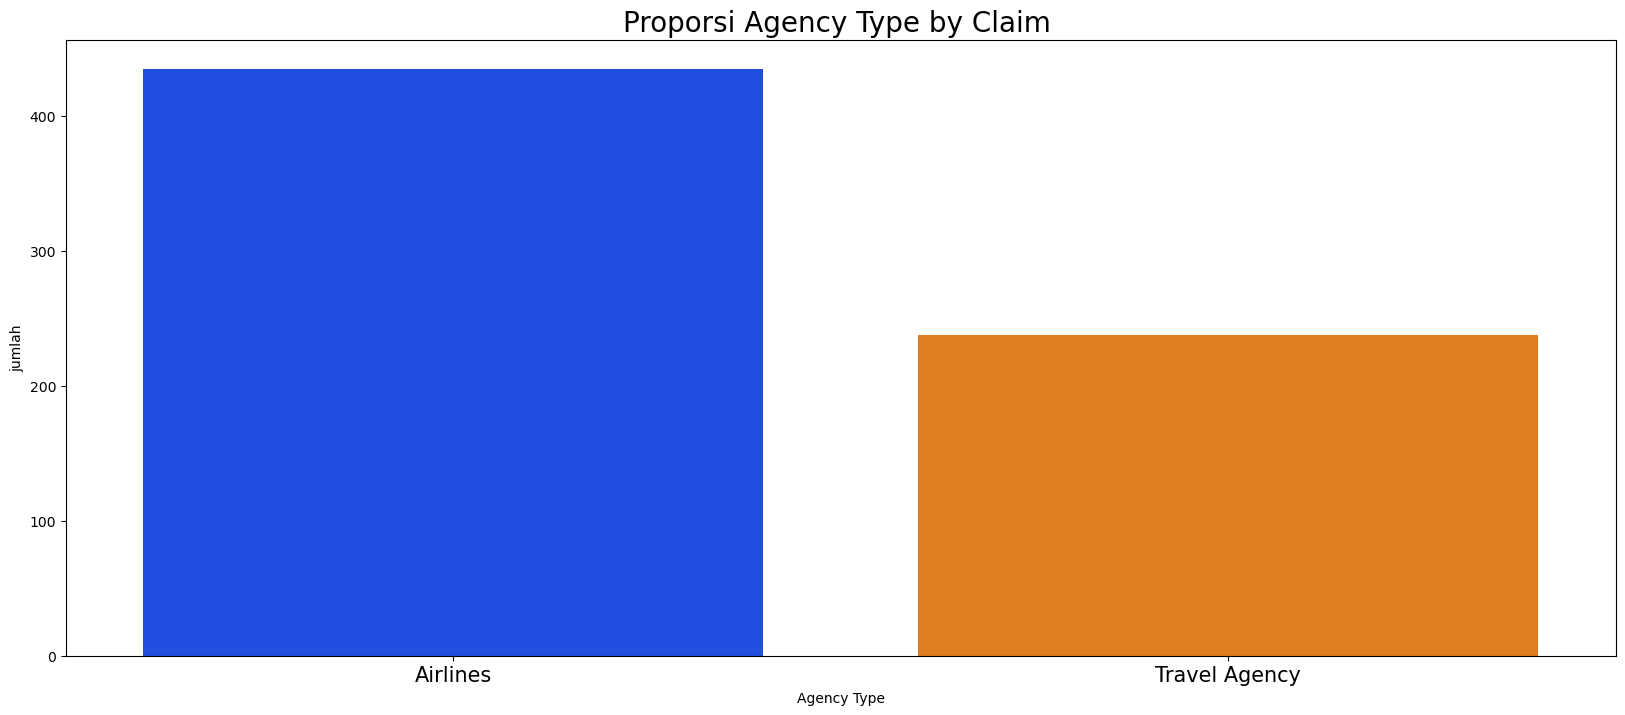

In [281]:
plt.figure(figsize=(20, 8))
plt.title('Proporsi Agency Type by Claim ', size=20)
sns_plot = sns.barplot(data=df_agencytypeclaim, x='Agency Type',y='jumlah', hue='Agency Type', palette='bright')

for i, artist in enumerate(sns_plot.artists):
    x = artist.get_x() + artist.get_width() / 2
    median_line = sns_plot.lines[i * 6 + 4]  # Mendapatkan garis median
    y = median_line.get_ydata()[0]  # Posisi y dari median
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(size=15)

In [282]:
print(f'''Jumlah perbandingan Agency Type by Claim Tertinggi berjumlah             : {df_agencytypeclaim.iloc[0][0]} {round(((df_agencytypeclaim.iloc[0][1])/(sum(df_agencytypeclaim.iloc[:,1])))*100,2)} %
Jumlah Agency Type by Claim Terkecil berjumlah                           : {df_agencytypeclaim.iloc[1][0]} {round((df_agencytypeclaim.iloc[1][1])/sum(df_agencytypeclaim.iloc[:,1])*100,2)} %
Kesimpulan                                                               : {df_agencytypeclaim.iloc[0][0]} menempati posisi 1 , dan {df_agencytypeclaim.iloc[1][0]} menempati posisi terakhir
Konsep Data                                                              : Feature/Variable
Method                                                                   : Membutuhkan Metode RobustScaler, karena bentuk data {df_agencytypeclaim.dtypes[1]},
                                                                           RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                           Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                           Data tidak berupa kategorikal/ kategorikal hirarki sehingga tidak diperlukan Encoding

 ''')

Jumlah perbandingan Agency Type by Claim Tertinggi berjumlah             : Airlines 64.64 %
Jumlah Agency Type by Claim Terkecil berjumlah                           : Travel Agency 35.36 %
Kesimpulan                                                               : Airlines menempati posisi 1 , dan Travel Agency menempati posisi terakhir
Konsep Data                                                              : Feature/Variable
Method                                                                   : Membutuhkan Metode RobustScaler, karena bentuk data int64,
                                                                           RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                           Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                           Data tidak berupa

In [283]:
print(f'''
Insight:
1. Summary
    - Airlines mungkin memiliki volume transaksi yang lebih tinggi karena melibatkan tiket pesawat, yang merupakan layanan utama dalam perjalanan udara.
      Travel Agency mungkin lebih fokus pada layanan tambahan seperti paket wisata, akomodasi, atau aktivitas tur, yang menghasilkan volume klaim lebih rendah.

    - Airlines kemungkinan melayani pelanggan dengan kebutuhan perjalanan yang lebih langsung dan mendesak, seperti perjalanan bisnis atau penerbangan jarak jauh.
      Travel Agency mungkin melayani pelanggan yang lebih kecil skalanya atau berorientasi pada liburan.

    - Produk asuransi yang terkait dengan Airlines mungkin lebih sering diklaim, misalnya asuransi penerbangan atau keterlambatan perjalanan.
      Travel Agency mungkin menawarkan produk yang klaimnya lebih jarang atau tidak sebesar Airlines.

2. Recomendation
    - Fokus pada Optimalisasi Klaim Airlines (Operasional):
        Dominasi klaim Airlines, pastikan proses pengajuan klaim dari pelanggan Airlines efisien dan terstruktur.
        Analisis apakah klaim tinggi ini menunjukkan risiko tinggi atau hanya volume transaksi yang besar.
      
    - Dukungan untuk Travel Agency (Marketing):
        Tingkatkan promosi dan diversifikasi produk asuransi yang dijual oleh Travel Agency.
        Berikan pelatihan atau insentif kepada agen untuk meningkatkan jumlah pelanggan dan klaim.

    - Analisis Produk Klaim (Data Analysts):
        Lakukan analisis mendalam pada produk-produk yang paling banyak diklaim di Airlines untuk memahami pola klaim dan potensi risiko.
        Pastikan bahwa produk yang dijual oleh Travel Agency relevan dengan kebutuhan pelanggan.
''')


Insight:
1. Summary
    - Airlines mungkin memiliki volume transaksi yang lebih tinggi karena melibatkan tiket pesawat, yang merupakan layanan utama dalam perjalanan udara.
      Travel Agency mungkin lebih fokus pada layanan tambahan seperti paket wisata, akomodasi, atau aktivitas tur, yang menghasilkan volume klaim lebih rendah.

    - Airlines kemungkinan melayani pelanggan dengan kebutuhan perjalanan yang lebih langsung dan mendesak, seperti perjalanan bisnis atau penerbangan jarak jauh.
      Travel Agency mungkin melayani pelanggan yang lebih kecil skalanya atau berorientasi pada liburan.

    - Produk asuransi yang terkait dengan Airlines mungkin lebih sering diklaim, misalnya asuransi penerbangan atau keterlambatan perjalanan.
      Travel Agency mungkin menawarkan produk yang klaimnya lebih jarang atau tidak sebesar Airlines.

2. Recomendation
    - Fokus pada Optimalisasi Klaim Airlines (Operasional):
        Dominasi klaim Airlines, pastikan proses pengajuan klaim dari pela

### 2.5.8 Kolom Agency Type Based on Commision

In [284]:
df_agencytypecommision_all = df.groupby('Agency Type')['Commision (in value)'].sum().sort_values(ascending=False).reset_index(name='jumlah')
df_agencytypecommision = df.groupby('Agency Type')['Commision (in value)'].sum().sort_values(ascending=False).reset_index(name='jumlah').head(10)
df_agencytypecommision

,Agency Type,jumlah
0,Travel Agency,234344.07
1,Airlines,174082.42


([0, 1], [Text(0, 0, 'Travel Agency'), Text(1, 0, 'Airlines')])

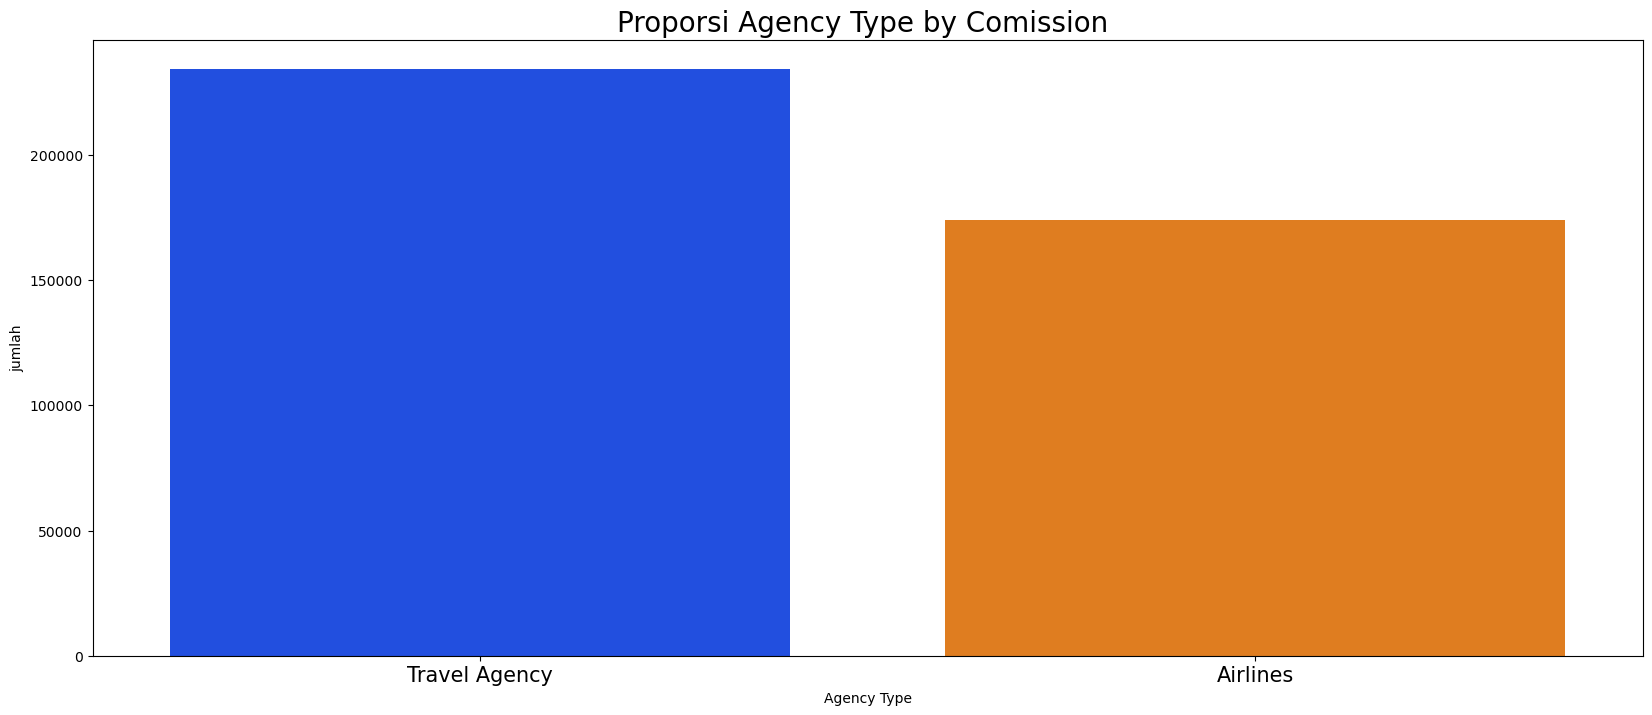

In [285]:
plt.figure(figsize=(20, 8))
plt.title('Proporsi Agency Type by Comission ', size=20)
sns_plot = sns.barplot(data=df_agencytypecommision, x='Agency Type',y='jumlah', hue='Agency Type', palette='bright')

for i, artist in enumerate(sns_plot.artists):
    x = artist.get_x() + artist.get_width() / 2
    median_line = sns_plot.lines[i * 6 + 4]  # Mendapatkan garis median
    y = median_line.get_ydata()[0]  # Posisi y dari median
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(size=15)

In [286]:
print(f'''Jumlah perbandingan Agency Type by Comission Tertinggi berjumlah             : {df_agencytypecommision.iloc[0][0]} {round(((df_agencytypecommision.iloc[0][1])/(sum(df_agencytypecommision.iloc[:,1])))*100,2)} %
Jumlah Agency Type by Comission Terkecil berjumlah                           : {df_agencytypecommision.iloc[1][0]} {round((df_agencytypecommision.iloc[1][1])/sum(df_agencytypecommision.iloc[:,1])*100,2)} %
Kesimpulan                                                                   : {df_agencytypecommision.iloc[0][0]} menempati posisi 1 , dan {df_agencytypecommision.iloc[1][0]} menempati posisi terakhir
Konsep Data                                                                  : Feature/Variable
Method                                                                       : Membutuhkan Metode RobustScaler, karena bentuk data {df_agencytypecommision.dtypes[1]},
                                                                               RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                               Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                                               Data tidak berupa kategorikal/ kategorikal hirarki sehingga tidak diperlukan Encoding

 ''')

Jumlah perbandingan Agency Type by Comission Tertinggi berjumlah             : Travel Agency 57.38 %
Jumlah Agency Type by Comission Terkecil berjumlah                           : Airlines 42.62 %
Kesimpulan                                                                   : Travel Agency menempati posisi 1 , dan Airlines menempati posisi terakhir
Konsep Data                                                                  : Feature/Variable
Method                                                                       : Membutuhkan Metode RobustScaler, karena bentuk data float64,
                                                                               RobustScaler dipilih karena data tidak terdistribusi normal, sehingga akan berfokus pada kumpulan data (median)
                                                                               Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                                              

In [287]:
print(f'''
Insight: 
1. Summary
    - Travel Agency mungkin memiliki margin keuntungan lebih tinggi per transaksi karena berfokus pada layanan tambahan seperti paket wisata, akomodasi, dan perjalanan lengkap.
      Travel Agency juga bisa mendapatkan komisi dari berbagai mitra (hotel, maskapai, dll.), sehingga total komisinya lebih besar.

    - Airlines mungkin memiliki volume transaksi lebih tinggi tetapi dengan margin komisi yang lebih kecil per transaksi.
      Komisi yang lebih kecil ini bisa disebabkan oleh model harga tiket pesawat yang ketat dan persaingan tinggi dalam industri penerbangan.

    - Produk yang dijual oleh Travel Agency (seperti paket liburan atau asuransi tambahan) mungkin memberikan komisi lebih besar dibandingkan tiket pesawat.

2. Recomendation
    - Optimalisasi Pendapatan Travel Agency:
        Mengingat kontribusi besar Travel Agency terhadap komisi, fokus pada memperluas jaringan mitra dan diversifikasi produk yang dapat dijual melalui Travel Agency.
        Dorong pemasaran produk yang memberikan margin tinggi.
      
    - Kolaborasi Strategis:
        Ciptakan sinergi antara Airlines dan Travel Agency untuk menawarkan bundel produk (misalnya, tiket pesawat + asuransi + akomodasi) yang dapat meningkatkan total komisi.

    - Segmentasi Pasar:
        Identifikasi pelanggan utama dari masing-masing tipe agen untuk memahami kebutuhan mereka lebih baik.
        Fokus pada pasar yang paling menguntungkan bagi setiap tipe agen.
''')


Insight: 
1. Summary
    - Travel Agency mungkin memiliki margin keuntungan lebih tinggi per transaksi karena berfokus pada layanan tambahan seperti paket wisata, akomodasi, dan perjalanan lengkap.
      Travel Agency juga bisa mendapatkan komisi dari berbagai mitra (hotel, maskapai, dll.), sehingga total komisinya lebih besar.

    - Airlines mungkin memiliki volume transaksi lebih tinggi tetapi dengan margin komisi yang lebih kecil per transaksi.
      Komisi yang lebih kecil ini bisa disebabkan oleh model harga tiket pesawat yang ketat dan persaingan tinggi dalam industri penerbangan.

    - Produk yang dijual oleh Travel Agency (seperti paket liburan atau asuransi tambahan) mungkin memberikan komisi lebih besar dibandingkan tiket pesawat.

2. Recomendation
    - Optimalisasi Pendapatan Travel Agency:
        Mengingat kontribusi besar Travel Agency terhadap komisi, fokus pada memperluas jaringan mitra dan diversifikasi produk yang dapat dijual melalui Travel Agency.
        Dorong

### 2.5.9 Kolom Duration dan Net Sales by Claim

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

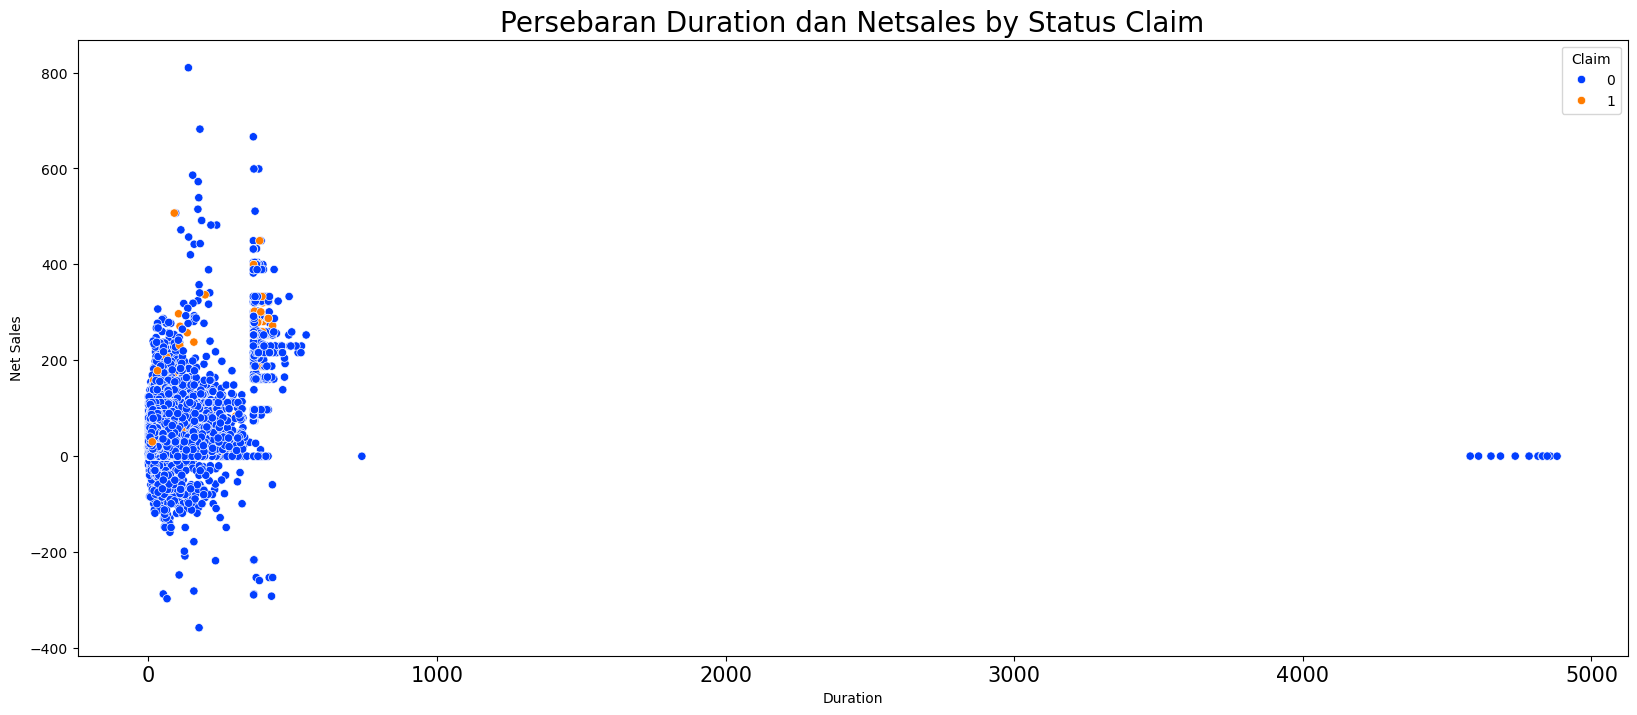

In [288]:
plt.figure(figsize=(20, 8))
plt.title('Persebaran Duration dan Netsales by Status Claim', size=20)
sns.scatterplot(data=df, x='Duration',y='Net Sales', hue='Claim', palette='bright')

plt.xticks(size=15)

In [289]:
print(f'''
Kesimpulan                         : Persebaran data Duration dan Netsales by Claim, menunjukan bahwa antara duration dan netsales
                                     memiliki jumlah data unique kecil, sehingga data memiliki kecenderungan pola yang serupa
                                     Dari data juga terlihat bahwa terdapat Outlier, hal ini bisa dijadikan refrence dalam menentukan method yang akan digunakan.
Konsep Data                        : Feature/Variable
Method                             : Membutuhkan Metode Binning, karena bentuk data {df_agencytypecommision.dtypes[1]},
                                     Binning dilakukan karena data memiliki kecenderungan membentuk pola kategorikal, sehingga dengan dilakukan binning dapat di kelompokan dan juga untuk mengurangi jumlah Outlier yang ada
                                     Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                     Data tidak berupa kategorikal/ kategorikal hirarki sehingga tidak diperlukan Encoding
Final Method                       : Binning 

 ''')


Kesimpulan                         : Persebaran data Duration dan Netsales by Claim, menunjukan bahwa antara duration dan netsales
                                     memiliki jumlah data unique kecil, sehingga data memiliki kecenderungan pola yang serupa
                                     Dari data juga terlihat bahwa terdapat Outlier, hal ini bisa dijadikan refrence dalam menentukan method yang akan digunakan.
Konsep Data                        : Feature/Variable
Method                             : Membutuhkan Metode Binning, karena bentuk data float64,
                                     Binning dilakukan karena data memiliki kecenderungan membentuk pola kategorikal, sehingga dengan dilakukan binning dapat di kelompokan dan juga untuk mengurangi jumlah Outlier yang ada
                                     Data tidak memiliki missing value sehingga tidak diperlukan mengisi missing value
                                     Data tidak berupa kategorikal/ kategorikal hirarki sehi

# Modelling Section

# 3. Define X and y

In [290]:
variabel = [
    ["X", "Feature", "Feature adalah variabel input yang digunakan untuk melatih model. Kumpulan Feature adalah informasi atau atribut yang membantu model memahami data."],
    ["", "Independent Variabel", "Feature tidak dipengaruhi oleh kolom lain, hal ini yang membuat Feature menjadi faktor yang dapat mempengaruhi Target/Label"],
    ["","",""],
    ["Y", "Label", "Label adalah variabel target atau hasil yang ingin diprediksi oleh model. Label adalah Fokus dalam data pelatihan"],
    ["", "Target", "Merupakan Variabel yang sangat dipengaruhi oleh Feature, sehingga disebut Target"],
    ["", "Dependent Variabel", ""]
]

# Header tabel
headers = ["Variabel", "Nama Lain", "Description"]

# Buat tabel
print(tabulate(variabel, headers, tablefmt="github"))
print(f'''
Sehingga bedasarkan penjelasan diatas, dalam pembuatan model, akan ditentukan variabel X dan y bedasarkan kolom data,
      {df.columns},
Dalam penentuan X/y, tidak semua kolom akan digunakan, faktanya terdapat kolom yang memiliki jumlah unique terlalu banyak sehingga hal tersebut dapat membuat model menjadi overfitting,
Sehingga adapaun kolom yang dikelompokan bedasarkan variabel X/y adalah sebagai berikut :
''')

| Variabel   | Nama Lain            | Description                                                                                                                                         |
|------------|----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|
| X          | Feature              | Feature adalah variabel input yang digunakan untuk melatih model. Kumpulan Feature adalah informasi atau atribut yang membantu model memahami data. |
|            | Independent Variabel | Feature tidak dipengaruhi oleh kolom lain, hal ini yang membuat Feature menjadi faktor yang dapat mempengaruhi Target/Label                         |
|            |                      |                                                                                                                                                     |
| Y          | Label                | Label adalah variabel 

In [291]:
#variabel X
X = df[['Agency','Agency Type','Distribution Channel','Product Name Bundle','Duration','Net Sales', 'Commision (in value)', 'Age','Region']]
#variabel y
y = df['Claim']

display(X.head(5),y.head(5))

,Agency,Agency Type,Distribution Channel,Product Name Bundle,Duration,Net Sales,Commision (in value),Age,Region
0,C2B,Airlines,Online,Annual Plans,365,216.0,54.0,57,ASIA
1,EPX,Travel Agency,Online,Cancellation Plans,4,10.0,0.0,33,ASIA
2,JZI,Airlines,Online,Basic Plans,19,22.0,7.7,26,ASIA
3,EPX,Travel Agency,Online,Comprehensive Plans,20,112.0,0.0,59,AMERICA
4,C2B,Airlines,Online,Other Plans,8,16.0,4.0,28,ASIA


0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int32

In [292]:
listItem = []
for col in X.columns :
    listItem.append([col, X[col].dtype, X[col].isna().sum(),
                    X[col].nunique(), list(X[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(39324, 12)


,dataFeatures,dataType,null,unique,uniqueSample
0,Agency,object,0,16,"[EPX, ART]"
1,Agency Type,object,0,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,2,"[Online, Offline]"
3,Product Name Bundle,object,0,8,"[Cancellation Plans, Specialty Plans]"
4,Duration,int64,0,437,"[457, 145]"
5,Net Sales,float64,0,1006,"[193.2, 184.0]"
6,Commision (in value),float64,0,915,"[0.87, 17.13]"
7,Age,int64,0,89,"[3, 49]"
8,Region,object,13,5,"[ASIA, AUSTRALIA]"


In [293]:
print(f'''
Keterangan Kolom yang digunakan
1. Kolom X
      - Agency                  : Jumlah unique {df['Agency'].nunique()} Object, Agency menunjukan nama dari agency,
                                  bedasarkan EDA dapat dilihat bahwa setiap agency dapat mempengaruhi pengajuan Claim/Not Claim
      - Agency Type             : Jumlah unique {df['Agency Type'].nunique()} Object, Agency Type menunjukan fokus bidang agency,
                                  bedasarkan EDA dapat dilihat bahwa setiap agency type dapat mempengaruhi pengajuan Claim/Not Claim
      - Distribution Channel    : Jumlah unique {df['Distribution Channel'].nunique()} Object, Distribution Channel menunjukan sistem bisnis perusahaan,
      - Product Name Bundle     : Kolom ini merupakan hasil rekayasa kolom, karena jumlah unique di kolom original ['Product Name'] memiliki jumlah unique {df['Product Name'].nunique()} Object,
                                  sedangkan kolom hasil rekayasa memiliki jumlah unique {df['Product Name Bundle'].nunique()} Object, sehingga digunakan untuk menghindari terjadi nya Overvitting pada model,
                                  bedasarkan EDA dapat dilihat bahwa setiap product name bundle dapat mempengaruhi pengajuan Claim/Not Claim
      - Duration                : Bentuk data pada kolom ini adalah {df['Duration'].dtypes}, Duration menunjukan lamanya pemegang polis melakukan travel
      - Net Sales               : Bentuk data pada kolom ini adalah {df['Net Sales'].dtypes}, Net Sales menunjukan pemasukan yang diterima perusahaan
      - Commision (in value)    : Bentuk data pada kolom ini adalah {df['Commision (in value)'].dtypes}, Comission menunjukan keuntungan yang diterima setiap agency apabila terjadi pengajuan claim oleh pemegang polis
      - Age                     : Bentuk data pada kolom ini adalah {df['Age'].dtypes}, Age menunjukan umur pemegang polis yang melakukan Claim/Not Claim
      - Region                  : Kolom ini merupakan hasil rekayasa kolom, karena jumlah unique di kolom original ['Destination'] memiliki jumlah unique {df['Destination'].nunique()} Object,
                                  sedangkan kolom hasil rekayasa memiliki jumlah unique {df['Region'].nunique()} Object, sehingga digunakan untuk menghindari terjadi nya Overvitting pada model,
                                  bedasarkan EDA dapat dilihat bahwa setiap Region dapat mempengaruhi pengajuan Claim/Not Claim

2. Kolom y
      - Claim                   : Kolom Claim menunjukan status pemilik polis mengajukan pencairan dana polis asuransi travel,
                                  Kolom ini akan menjadi fokus utama dalam pengambilan keputusan, sehingga akan dipengaruhi oleh variabel X
''')


Keterangan Kolom yang digunakan
1. Kolom X
      - Agency                  : Jumlah unique 16 Object, Agency menunjukan nama dari agency,
                                  bedasarkan EDA dapat dilihat bahwa setiap agency dapat mempengaruhi pengajuan Claim/Not Claim
      - Agency Type             : Jumlah unique 2 Object, Agency Type menunjukan fokus bidang agency,
                                  bedasarkan EDA dapat dilihat bahwa setiap agency type dapat mempengaruhi pengajuan Claim/Not Claim
      - Distribution Channel    : Jumlah unique 2 Object, Distribution Channel menunjukan sistem bisnis perusahaan,
      - Product Name Bundle     : Kolom ini merupakan hasil rekayasa kolom, karena jumlah unique di kolom original ['Product Name'] memiliki jumlah unique 26 Object,
                                  sedangkan kolom hasil rekayasa memiliki jumlah unique 8 Object, sehingga digunakan untuk menghindari terjadi nya Overvitting pada model,
                                  bedasarkan 

# 4 Splitting Populasi Data

In [294]:
split = [
    ["Untuk melatih model", "Perlu memisahkan data input (X) dari output (y), karena algoritma Machine Learning mempelajari hubungan antara keduanya."],
    ["Pengkodisian Detail", "Dengan membagi dataset, dapat lebih mudah memanipulasi fitur dan target secara terpisah, misalnya menerapkan preprocessing khusus pada X tanpa memengaruhi y."],
    ["Pra-pemrosesan Data","Memungkinkan dalam menerapkan transformasi hanya pada fitur (X), seperti normalisasi, encoding, atau scaling, tanpa mengubah target (y)."],
    ["Mempersiapkan Data untuk Splitting Train-Test", "Setelah memisahkan X dan y, dapat membagi dataset menjadi training dan testing untuk mengevaluasi model."],
]

# Header tabel
headers = ["Fungsi Split", "Penjelasan"]

# Buat tabel
print(tabulate(split, headers, tablefmt="github"))
print(f'''
Dalam proses splitting terdapat beberapa parameter yang perlu dijabarkan diantaranya:
      1. Test Size      : Menentukan proporsi data yang akan digunakan sebagai data test, sisanya train
                          Dalam pemodelan ini akan digunakan perbandingan split sebagai berikut
                                - Train : 80 % Populasi data
                                - Test  : 20 % Populasi data
                          Dalam penentuan Train set sebesar 80% dilakukan agar model dapat lebih banyak mempelajari data, sehingga
                          apabila dikemudian hari model diujikan pada Data set baru maka, diharapkan dapat memprediksi data baru
                          dengan benar sebesar 80% atau lebih
      2. Random State   : Memastikan hasil pembagian data selalu konsisten (reproducible) di setiap eksekusi kode
                          Dalam pemodelan ini akan digunakan random state sebagai berikut
                                - Random state = 9
                                  Angka 9 didapatkan bedasakan jumlah Feature yang digunakan pada pemodelan ini, penentuan ini bedasarkan jurnal berjudul
                                  " Random State Parameter Undersampling untuk Penanganan Data dengan Kelas Tidak Seimbang pada Algoritme Random Forest "
                                  Sumber : (https://drive.google.com/drive/u/0/folders/1jKiNJJ42dq4DXmffiRUILL20NP3-icM_)
      3. stratify       : Memastikan bahwa pembagian data train dan test mempertahankan distribusi proporsi kelas yang sama seperti di dataset awal (biasanya untuk data klasifikasi)
                          Dalam pemodelan ini akan digunakan stratify sebagai berikut
                                - stratify = y
''')


| Fungsi Split                                  | Penjelasan                                                                                                                                                    |
|-----------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Untuk melatih model                           | Perlu memisahkan data input (X) dari output (y), karena algoritma Machine Learning mempelajari hubungan antara keduanya.                                      |
| Pengkodisian Detail                           | Dengan membagi dataset, dapat lebih mudah memanipulasi fitur dan target secara terpisah, misalnya menerapkan preprocessing khusus pada X tanpa memengaruhi y. |
| Pra-pemrosesan Data                           | Memungkinkan dalam menerapkan transformasi hanya pada fitur (X), seperti normalisasi, encoding, atau scaling, 

In [295]:
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=9,
    stratify=y
)

# 5. Preprocessing Data

- **Notes** : Apabila Tabel terpotong (....) klick Scrollable elements

In [296]:
preprocessing = [
    ["Missing Value","Simple Imputer","Cepat dan mudah diterapkan" ,"Mengabaikan hubungan antar fitur","Mean (Rata-rata): Untuk data numerik, mengganti nilai yang hilang dengan rata-rata dari kolom tersebut."],
    ["","","Tidak memerlukan banyak komputasi" ,"Dapat memperkenalkan bias jika distribusi data tidak seragam","Median (Nilai tengah): Menggunakan nilai tengah dari kolom, cocok untuk data dengan distribusi miring (skewed data)."],
    ["","","Dapat dilakukan pada DataType Numerikal dan kategorikal","","Mode (Modus): Untuk data kategorikal, mengganti nilai yang hilang dengan nilai yang paling sering muncul."],
    ["","","","",""],
    ["","Iterative Imputer","Mempertimbangkan hubungan antar fitur, lebih akurat","Membutuhkan lebih banyak waktu dan sumber daya komputasi","Membuat model untuk setiap fitur yang hilang dengan menggunakan fitur lainnya sebagai prediktor."],
    ["","","Cocok untuk dataset dengan pola kompleks","Hanya Dapat dilakukan pada DataType Numerikal","Memulai dengan mengganti nilai yang hilang menggunakan mean atau median"],
    ["","","","",""],
    ["","KNN","Mempertimbangkan hubungan lokal dalam data","Sensitif terhadap jumlah neighbors (K) yang dipilih","Menghitung jarak (biasanya Euclidean distance) antara sampel yang memiliki data lengkap dan sampel dengan nilai yang hilang."],
    ["","","Tidak memerlukan asumsi distribusi tertentu","Membutuhkan lebih banyak waktu untuk dataset besar","Menggunakan rata-rata atau modus dari nilai tetangga terdekat (K) untuk menggantikan nilai yang hilang."],
    ["","","","",""],
    ["","Most Frequent","Sangat sederhana dan cepat untuk diterapkan","Dapat menyebabkan bias jika data kategori tidak seimbang","Mengganti nilai yang hilang dengan nilai yang paling sering muncul (modus) dari kolom tersebut. Cocok untuk data kategorikal dengan distribusi yang jelas."],
    ["","","Cocok untuk data dengan kategori yang didominasi oleh satu nilai","Tidak mempertimbangkan hubungan antar fitur",""],
    ["","","","",""],
    ["Encoding","One Hot","Cocok untuk fitur kategorikal tanpa hubungan antar nilai","Dapat menghasilkan banyak kolom tambahan untuk kategori yang tinggi (curse of dimensionality)","Mengubah setiap kategori dalam fitur menjadi kolom biner yang terpisah (0 atau 1). Setiap kolom menunjukkan keberadaan kategori tertentu."],
    ["","","","",""],
    ["","Ordinal","Cocok untuk fitur kategorikal dengan makna ordinal (c/ tingkat kepuasan, ukuran pakaian)","Jika tidak ada hubungan ordinal dalam kategori, dapat menyebabkan algoritma salah mengasumsikan adanya urutan","Mengubah kategori menjadi angka berdasarkan urutan tertentu. Setiap kategori diberi angka yang meningkat."],
    ["","","","",""],
    ["","Binary","Lebih efisien daripada one-hot encoding untuk kategori yang tinggi","Kurang interpretatif dibanding one-hot encoding","Mengubah kategori menjadi representasi biner, menggabungkan karakteristik dari ordinal dan one-hot encoding. Setiap kategori direpresentasikan sebagai bilangan biner, lalu dipecah menjadi kolom biner."],
    ["","","Mengurangi jumlah kolom yang dihasilkan","",""],
    ["","","","",""],
    ["Scaler","MinMaxScaler","Sederhana dan menjaga distribusi asli data","Sangat terpengaruh oleh outlier karena menggunakan nilai maksimum dan minimum dari data","Mengubah data ke dalam rentang [0 (Min Data), 1(Max Data)]."],
    ["","","","",""],
    ["","StandartScaler","Cocok untuk algoritma seperti Linear Regression, Logistic Regression, atau SVM","Tidak menangani outlier dengan baik","Mengubah data sehingga memiliki mean = 0 dan standar deviasi = 1 (standarisasi)."],
    ["","","Jika data mengikuti distribusi normal (Gaussian)","",""],
    ["","","","",""],
    ["","RobustScaler","Jika data memiliki outlier signifikan","Kurang efektif untuk data dengan distribusi normal (karena tidak memperhitungkan mean)","Mengurangi pengaruh outlier dengan menggunakan median[0] dan interquartile range (IQR)[1]."],
    ["","","Cocok untuk situasi di mana distribusi data tidak normal","",""],
    ["","","Tidak terpengaruh oleh outlier seperti MinMaxScaler atau StandardScaler","",""],
    ["","","","",""],
    ["Binning","Frequency Binning","Mempertimbangkan distribusi data","Lebar bin dapat bervariasi, membuatnya sulit untuk diinterpretasikan","Digunakan untuk mengelompokkan nilai-nilai data kontinu ke dalam beberapa kelompok atau kategori (bin) dengan jumlah elemen yang sama"],
    ["","","","",""],
    ["","Quantile Binning","Cocok untuk data dengan distribusi yang tidak merata","Tidak Konsisten untuk Data Baru","Digunakan untuk mengelompokkan nilai-nilai data kontinu ke dalam beberapa kelompok atau kategori (bin) dengan range kuantil sama antar kelompok"],
    ["","","","",""],
    ["Passthrough","","Menghindari langkah preprocessing yang tidak perlu untuk fitur tertentu","Fitur yang diteruskan langsung mungkin memiliki masalah seperti skala yang tidak sesuai atau nilai yang hilang (missing values), yang tidak diperiksa selama preprocessing","Digunakan dalam pipeline preprocessing di machine learning untuk menunjukkan bahwa fitur tertentu tidak akan dimodifikasi selama proses preprocessing"],
    ["","","","",""],
]

# Header tabel
headers = ["Preprocessing", "Method", "Kelebihan","Kekurangan","Penjelasan"]

# Buat tabel
print(tabulate(preprocessing, headers, tablefmt="github"))

| Preprocessing   | Method            | Kelebihan                                                                                | Kekurangan                                                                                                                                                                 | Penjelasan                                                                                                                                                                                               |
|-----------------|-------------------|------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 5.1 Pengkodisian Data X Preprocessing

In [297]:
kondisiX = [
    ["Missing Value","Simple Imputer","--","Tidak terdapat Missing value pada kolom"],
    ["","Iterative Imputer","--","...."],
    ["","KNN","--","...."],
    ["","Most Frequent","--","...."],
    ["","","",""],
    ["Encoding","One Hot","[Agency Type],[Region],[Product Name Bundle],[Distribution Channel]","Jumlah kategorikal sedikit (dalam model ini <9), sehingga lebih sederhana dan interpretable"],
    ["","Ordinal","--","Tidak terdapat kolom kategorikal yang bersifat hierarki"],
    ["","Binary","[Agency]","Jumlah kategorikal banyak (dalam model ini >9), sehingga untuk mengurangi terjadinya overfitting pada model lebih baik menggunakan method ini"],
    ["","","",""],
    ["Scaler","MinMaxScaler","--","Data tidak terdistribusi normal"],
    ["","StandartScaler","--","Fokus Model tidak berfokus pada variance dan standar variasi"],
    ["","RobustScaler","[Duration],[Net Sales],[Commision (in value)]","Digunakan karena data tidak terdistribusi normal"],
    ["","","",""],
    ["Binning","Frequent","--","Data tidak terdistribusi merata"],
    ["","Quantile","[Age]","Cocok untuk data dengan distribusi yang tidak merata"],
    ["","","","Pada saat dilakukan EDA, data memiliki kecenderungan membentuk sebuah pola (Kategorikal)"],
    ["","","",""],
    ["Passthrough","--","--","Semua Kolom dinilai harus melalui preprocessing"],
    ["","","",""],
]

# Header tabel
headers = ["Preprocessing", "Method", "Kolom X", "Alasan"]

# Buat tabel
display(dfDesc)
print(tabulate(kondisiX, headers, tablefmt="github"))


,dataFeatures,dataType,null,unique,uniqueSample
0,Agency,object,0,16,"[EPX, ART]"
1,Agency Type,object,0,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,2,"[Online, Offline]"
3,Product Name Bundle,object,0,8,"[Cancellation Plans, Specialty Plans]"
4,Duration,int64,0,437,"[457, 145]"
5,Net Sales,float64,0,1006,"[193.2, 184.0]"
6,Commision (in value),float64,0,915,"[0.87, 17.13]"
7,Age,int64,0,89,"[3, 49]"
8,Region,object,13,5,"[ASIA, AUSTRALIA]"


| Preprocessing   | Method            | Kolom X                                                             | Alasan                                                                                                                                        |
|-----------------|-------------------|---------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------|
| Missing Value   | Simple Imputer    | --                                                                  | Tidak terdapat Missing value pada kolom                                                                                                       |
|                 | Iterative Imputer | --                                                                  | ....                                                                                                                            

## 5.2 Columns Transformer

In [298]:
cltransformer = [
    ["Column Transformer","Column Transformer adalah sebuah fitur yang tersedia di Python,"],
    [""," terutama di library scikit-learn, yang memungkinkan pengguna untuk menerapkan preprocessing yang berbeda pada kolom tertentu dari dataset,"],
    ["","Ini sangat berguna ketika dataset memiliki berbagai tipe data (numerik, kategori, dll.) yang memerlukan preprocessing yang berbeda."]
]

# Header tabel
headers = ["PreProcessing", "Penjelasan"]

# Buat tabel
print(tabulate(cltransformer, headers, tablefmt="github"))

| PreProcessing      | Penjelasan                                                                                                                                 |
|--------------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| Column Transformer | Column Transformer adalah sebuah fitur yang tersedia di Python,                                                                            |
|                    | terutama di library scikit-learn, yang memungkinkan pengguna untuk menerapkan preprocessing yang berbeda pada kolom tertentu dari dataset, |
|                    | Ini sangat berguna ketika dataset memiliki berbagai tipe data (numerik, kategori, dll.) yang memerlukan preprocessing yang berbeda.        |


In [299]:
# Binning
disc_ordinal = KBinsDiscretizer(
    n_bins=5,
    strategy='quantile', 
    encode='ordinal'
)

In [300]:
#Columns Transformer
transformer = ColumnTransformer([
    ('Onehot',OneHotEncoder(drop='first'),['Agency Type','Region','Product Name Bundle','Distribution Channel']), #Encoding
    ('Binary', BinaryEncoder(),['Agency']), #Encoding
    ('Robust', RobustScaler(),['Commision (in value)','Duration','Net Sales']), #Scaler
    ('Binning',disc_ordinal,['Age']) #Binning
],remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Onehot', OneHotEncoder(drop='first'),
                                 ['Agency Type', 'Region',
                                  'Product Name Bundle',
                                  'Distribution Channel']),
                                ('Binary', BinaryEncoder(), ['Agency']),
                                ('Robust', RobustScaler(),
                                 ['Commision (in value)', 'Duration',
                                  'Net Sales']),
                                ('Binning', KBinsDiscretizer(encode='ordinal'),
                                 ['Age'])])

In [301]:
trans_feature = transformer.fit_transform(X)
trans_feature = pd.DataFrame(trans_feature)
trans_feature.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.545455,7.391304,6.032258,3.0


In [302]:
transformer.transformers_[0][1].get_feature_names_out()

array(['Agency Type_Travel Agency', 'Region_AMERICA', 'Region_ASIA',
       'Region_AUSTRALIA', 'Region_EUROPE', 'Region_nan',
       'Product Name Bundle_Basic Plans',
       'Product Name Bundle_Cancellation Plans',
       'Product Name Bundle_Comprehensive Plans',
       'Product Name Bundle_Other Plans',
       'Product Name Bundle_Rental Plans',
       'Product Name Bundle_Single Trip Plans',
       'Product Name Bundle_Specialty Plans',
       'Distribution Channel_Online'], dtype=object)

In [303]:
transformer.transformers_[1][1].get_feature_names_out()

array(['Agency_0', 'Agency_1', 'Agency_2', 'Agency_3', 'Agency_4'],
      dtype=object)

In [304]:
feature_names = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out()) + ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
trans_feature.columns = feature_names
trans_feature.head(5)

,Agency Type_Travel Agency,Region_AMERICA,Region_ASIA,Region_AUSTRALIA,Region_EUROPE,Region_nan,Product Name Bundle_Basic Plans,Product Name Bundle_Cancellation Plans,Product Name Bundle_Comprehensive Plans,Product Name Bundle_Other Plans,Product Name Bundle_Rental Plans,Product Name Bundle_Single Trip Plans,Product Name Bundle_Specialty Plans,Distribution Channel_Online,Agency_0,Agency_1,Agency_2,Agency_3,Agency_4,Duration,Net Sales,Commision (in value),Age
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.545455,7.391304,6.032258,3.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,-0.456522,-0.612903,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.648148,-0.130435,-0.225806,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,-0.108696,2.677419,3.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.336700,-0.369565,-0.419355,0.0


# 6 Cross Validation

## 6.1 Penjelasan CV

In [305]:
tujuancv = [
    ["Cross Validation","Cross Validation (CV) adalah teknik evaluasi model, ","1. Mengurangi overfitting: Membantu memastikan bahwa model tidak terlalu terfokus pada data pelatihan saja."],
    ["","yang digunakan untuk mengukur performa model secara lebih akurat.","2. Scorer yang lebih andal: Memberikan estimasi yang lebih realistis terhadap performa model di dunia nyata."],
    ["","","3. Memanfaatkan data secara maksimal: Semua data, termasuk data uji, digunakan secara bergantian untuk pelatihan dan pengujian."],
    ["","",""],
]

# Header tabel
headers = ["Teknik", "Penjelasan", "Tujuan"]

# Buat tabel
print(tabulate(tujuancv, headers, tablefmt="github"))

| Teknik           | Penjelasan                                                        | Tujuan                                                                                                                          |
|------------------|-------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------|
| Cross Validation | Cross Validation (CV) adalah teknik evaluasi model,               | 1. Mengurangi overfitting: Membantu memastikan bahwa model tidak terlalu terfokus pada data pelatihan saja.                     |
|                  | yang digunakan untuk mengukur performa model secara lebih akurat. | 2. Scorer yang lebih andal: Memberikan estimasi yang lebih realistis terhadap performa model di dunia nyata.                    |
|                  |                                                                   | 3. Memanfaatkan data secara maksima

## 6.2 Jenis CV

In [306]:
jeniscv = [
    ["K-Fold Cross Validation","Jika k=5, dataset dibagi menjadi 5 subset, dan model diuji 5 kali, masing-masing menggunakan subset yang berbeda sebagai data uji"],
    ["",""],
    ["Stratified K-Fold","Sama seperti K-Fold, tetapi memastikan proporsi kelas target sama di setiap fold (berguna untuk dataset dengan kelas tidak seimbang)"],
    ["",""],
    ["Leave-One-Out Cross Validation (LOOCV)","Setiap observasi dalam dataset digunakan sebagai data uji satu kali, sementara sisanya digunakan untuk pelatihan"],
    ["",""],
    ["Time Series Split","Digunakan untuk data time-series. Data dibagi berdasarkan urutan waktu, sehingga data masa depan tidak digunakan untuk memprediksi data masa lalu."],
    ["",""],
    ["Shuffle Split","Dataset dibagi secara acak dalam jumlah iterasi tertentu tanpa memperhatikan urutan waktu."],
    ["",""],
]

# Header tabel
headers = ["Jenis", "Penjelasan"]

# Buat tabel
print(tabulate(jeniscv, headers, tablefmt="github"))

| Jenis                                  | Penjelasan                                                                                                                                         |
|----------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| K-Fold Cross Validation                | Jika k=5, dataset dibagi menjadi 5 subset, dan model diuji 5 kali, masing-masing menggunakan subset yang berbeda sebagai data uji                  |
|                                        |                                                                                                                                                    |
| Stratified K-Fold                      | Sama seperti K-Fold, tetapi memastikan proporsi kelas target sama di setiap fold (berguna untuk dataset dengan kelas tidak seimbang)               |
|                                       

## 6.3 List Algoritma Model Uji

- **Notes** : Apabila Tabel terpotong (....) klick Scrollable elements

In [307]:
modelcv = [
    ["Logistic Regression","1. Sederhana dan mudah diinterpretasi: Cocok jika perlu menjelaskan hasil ke tim non-teknis.","1. Tidak cocok jika hubungan antar fitur tidak linier"],
    ["","2. Memiliki performa baik untuk dataset yang terpisah secara linier","2. Kurang fleksibel untuk data dengan pola yang kompleks"],
    ["","3. Cepat dan ringan: Cocok untuk data besar dan prediksi real-time",""],
    ["","4. Prediksi sederhana seperti Probabilitas",""],
    ["","",""],
    ["Decision Tree","1. Interpretable: Mudah dipahami karena menyerupai proses pengambilan keputusan manusia","1. Cenderung overfit pada data kecil atau jika pohon terlalu dalam"],
    ["","2. Mampu menangani data non-linear dengan baik","2. Sensitif terhadap perubahan data"],
    ["","3. Tidak memerlukan banyak prapemrosesan (misalnya, normalisasi",""],
    ["","4. Identifikasi segmen pelanggan berdasarkan risiko atau preferensi",""],
    ["","",""],
    ["K-Nearest Neighbors","1. Non-parametrik dan sederhana: Tidak membuat asumsi tentang distribusi data","1. Lambat pada dataset besar: Karena menghitung jarak ke semua titik data"],
    ["","2. Mampu menangkap pola kompleks tanpa banyak pemrograman","2. Sensitif terhadap skala data (memerlukan normalisasi)"],
    ["","3. Prediksi berbasis kemiripan pelanggan","3. Sulit diinterpretasi"],
    ["","",""],
    ["Random Forest (RF)","1. Performa tinggi dan robus: Mengurangi risiko overfitting dengan menggabungkan banyak pohon","1. Kurang interpretatif dibandingkan Logistic Regression atau Decision Tree"],
    ["","2. Mampu menangani data non-linear dengan baik","2. Relatif lebih lambat dibanding model sederhana seperti LogReg"],
    ["","3. Menyediakan informasi pentingnya fitur (feature importance)",""],
    ["","4. Prediksi kompleks seperti klasifikasi risiko Probabilitas berdasarkan banyak parameter",""],
    ["","",""],
    ["Gradient Boosting","1. Menangani data tidak seimbang dengan baik (Probabilitas)","1. Komputasi Berat: Membutuhkan waktu lebih lama untuk pelatihan, terutama untuk dataset besar."],
    ["","2. Mampu menangkap pola kompleks","2. Sulit diinterpretasi dibandingkan model sederhana"],
    ["","3. Fleksibilitas: Dapat digunakan untuk klasifikasi dan regresi","3. Rentan terhadap Overfitting: Jika parameter tidak diatur dengan benar"],
    ["","",""],
    ["Bootstrap Aggregating","1. Dapat digunakan dengan model apapun, tetapi sangat efektif dengan model yang rentan terhadap overfitting (seperti Decision Trees)","1. Membutuhkan lebih banyak komputasi karena melibatkan beberapa model"],
    ["","2. Mengurangi variansi model sehingga lebih stabil terhadap data yang berbeda","2. Efektivitasnya tergantung pada keanekaragaman model yang digabungkan"],
    ["","",""],
    ["AdaBoost","1. Sederhana dan Mudah Diimplementasikan: Algoritma straightforward untuk masalah klasifikasi","1. Komputasi Lambat: Tidak seefisien Gradient Boosting untuk dataset besar"],
    ["","2. Tahan terhadap Overfitting: Selama jumlah iterasi tidak terlalu besar",""],
    ["","3. Menangani Data Tidak Seimbang: Dengan memberi bobot lebih pada data yang sulit diprediksi",""],
    ["","",""],
    ["XGBoost","1. Regularisasi Penalty L1 dan L2: Mencegah overfitting","1. Kompleksitas Implementasi: Membutuhkan pemahaman mendalam untuk mengoptimalkan hyperparameter"],
    ["","2. Skalabilitas: Cocok untuk dataset besar","2. Rentan terhadap Overfitting: Jika jumlah pohon terlalu banyak atau learning rate terlalu rendah"],
    ["","3. Fitur Handling Missing Values: Secara otomatis menangani missing values","3. Penggunaan Memori Tinggi: Tidak selalu efisien untuk perangkat dengan sumber daya terbatas"],
    ["","",""],
    ["LightGBM","1. Kecepatan Tinggi: Lebih cepat dibandingkan XGBoost, terutama untuk dataset besar","1. Rentan terhadap Overfitting"],
    ["","2. Efisiensi Memori: Memerlukan lebih sedikit memori dibandingkan XGBoost","2. Kurang Optimal untuk Dataset Kecil: Performanya menurun jika dataset terlalu kecil"],
    ["","3. Kemampuan Menangani Fitur Kategori Besar: Tidak membutuhkan banyak preprocessing untuk fitur kategori","3. Parameter Tuning Kompleks: Membutuhkan pengaturan parameter untuk menghindari overfitting"],
    ["","",""],
    ["CatBoost","1. Native Handling of Categorical Data: Secara langsung menangani data kategori tanpa perlu one-hot encoding","1. Komputasi Berat untuk Data Besar: Meskipun efisien untuk kategori, memerlukan sumber daya tinggi untuk dataset besar"],
    ["","2. Kecepatan Pelatihan: Sangat cepat untuk data dengan banyak fitur kategori.","2. Kurang Populer: Relatif baru dibandingkan dengan XGBoost dan LightGBM, sehingga referensi mungkin lebih terbatas"],
    ["","3. Sedikit Parameter Tuning: Tidak sekompleks LightGBM atau XGBoost","3. Pemrosesan Awal yang Lambat: Meskipun model cepat, preprocessing awal bisa lebih lambat dibandingkan algoritma lainnya"],
    ["","",""],
    ["Voting","1. Sederhana dan Mudah Dipahami: Proses voting mudah diimplementasikan, terutama untuk klasifikasi","1. Kurang Optimal: Karena voting tidak mempertimbangkan kekuatan atau kelemahan relatif dari model individu, model yang kurang baik bisa memengaruhi hasil ensemble secara signifikan"],
    ["","2. Mengurangi Variansi: Dengan menggabungkan beberapa model, metode ini dapat meningkatkan stabilitas dan mengurangi overfitting","2. Tidak Menangkap Hubungan Antar Model: Tidak ada mekanisme untuk menggabungkan informasi dari model individu secara lebih mendalam"],
    ["","3. Fleksibilitas: Dapat menggunakan model yang berbeda (heterogeneous models) atau model yang sama (homogeneous models) dalam ensemble","3. Kurang Efektif untuk Data Kompleks: Tidak sekuat metode seperti stacking untuk dataset dengan pola kompleks"],
    ["","4. Tidak Memerlukan Training Tambahan: Model individu dilatih secara independen, sehingga tidak ada kebutuhan untuk melatih meta-model",""],
    ["","",""],
    ["Stacking","1. Lebih Optimal: Meta-model dapat belajar bobot yang sesuai untuk setiap prediksi model individu, menghasilkan ensemble yang lebih akurat","1. Komputasi Berat: Karena membutuhkan pelatihan untuk semua model individu dan meta-model, stacking memakan lebih banyak waktu dan sumber daya"],
    ["","2. Fleksibilitas Tinggi: Bisa menggabungkan berbagai jenis model individu (heterogeneous) dengan meta-model","2. Overfitting pada Meta-Model: Jika meta-model terlalu kompleks atau dataset terlalu kecil, risiko overfitting menjadi tinggi"],
    ["","3. Menggabungkan Informasi: Stacking menangkap hubungan antar prediksi model individu, memberikan solusi yang lebih kompleks","3. "],
    ["","",""],
]

# Header tabel
headers = ["Model", "Kelebihan", "Kekurangan"]

# Buat tabel
print(tabulate(modelcv, headers, tablefmt="github"))

| Model                 | Kelebihan                                                                                                                                  | Kekurangan                                                                                                                                                                            |
|-----------------------|--------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Logistic Regression   | 1. Sederhana dan mudah diinterpretasi: Cocok jika perlu menjelaskan hasil ke tim non-teknis.                                               | 1. Tidak cocok jika hubungan antar fitur tidak linier                                                                              

## 6.4 Pemilihan List Algoritma Model

- **Notes** : Apabila Tabel terpotong (....) klick Scrollable elements

In [308]:
speccomp = [
    ["Processor","Intel(R) Core(TM) Ultra 7 155H   1.40 GHz"],
    ["Memory","32 GB"],
    ["Hardisk","SSD 1TB"],
    ["Sistem Operasi (OS)","Windows 11 64-bit"],
    ["Kernel Aplikasi"," Python 3.12.4, VSCODE"],
]

paramcv = [
    ["Stratified K-Fold (k=5)","Sama seperti K-Fold, tetapi memastikan proporsi kelas target sama di "],
    ["","setiap fold (berguna untuk dataset dengan kelas tidak seimbang)"],
    ["",""],
    ["Scorer (F2 Scorer)"," Mengurangi jumlah FP dan FN, dengan pembobotan 2x pada FN"],
    ["",""],
]

pilihalgo = [
    ["Logistic Regression","1. Sederhana dan mudah diinterpretasi: Cocok jika perlu menjelaskan hasil ke tim non-teknis","1. Penalty: Default"],
    ["","2. Cepat dan ringan: Cocok untuk data besar dan prediksi real-time","2. RandomState: 9"],
    ["","3. Prediksi sederhana seperti Probabilitas ","3. Solver: newton-cholesky"],
    ["","","newton-cholesky terpilih sebagai parameter awal karena cocok untuk dataset dengan banyak fitur"],
    ["","","4. Penalty: L2 (default)"],
    ["","","L2 terpilih sebagai parameter awal untuk mendukung solver newton-cholesky (Tidak mendukung regulasi L1)"],
    ["","",""],
    ["Decision Tree","1. Interpretable: Mudah dipahami karena menyerupai proses pengambilan keputusan manusia","1. RandomState: 9"],
    ["","2. Tidak memerlukan banyak prapemrosesan (misalnya, normalisasi","2. Max Depth: None"],
    ["","","Mulai dengan nilai default (None, pohon tumbuh maksimal)"],
    ["","","3. Min Sample Leaf: 2"],
    ["","","Eksperimen dengan nilai lebih besar (5, 10) untuk dataset besar atau dengan noise tinggi."],
    ["","","4. Min Sample Split: 5"],
    ["","","Jika dataset besar, pertimbangkan untuk menaikkan (misalnya 5, 10"],
    ["","",""],
    ["","","5. Criterion: Log loss"],
    ["","","Log_loss terpilih karena cocok jika pohon akan digunakan untuk probabilitas prediksi."],
    ["","",""],
    ["Random Forest","1. Performa tinggi dan robus: Mengurangi risiko overfitting dengan menggabungkan banyak pohon","1. RandomState: 9"],
    ["","2. Menyediakan informasi pentingnya fitur (feature importance)","2. Max Depth: None"],
    ["","","3. Min Sample Leaf: 2"],
    ["","","4. Min Sample Split: 5"],
    ["","","5. Criterion: Log loss"],
    ["","",""],
    ["Gradient Boosting","1. Menangani data tidak seimbang dengan baik (Probabilitas)","1. RandomState: 9"],
    ["","2. Fleksibilitas: Dapat digunakan untuk klasifikasi dan regresi","2. Learning Rate: 0.5"],
    ["","","Learning rate default di Scikit-learn adalah 0.1"],
    ["","","Jika dataset besar, gunakan learning_rate kecil (0.01-0.05) dengan jumlah pohon lebih banyak."],
    ["","","3. Loss: Log loss"],
    ["","","Berdasarkan log loss (cross-entropy) yang mengukur ketepatan probabilitas yang diprediksi"],
    ["","","4. Criterion: Friedman mse"],
    ["","","Friedman mse terpilih karena merupakan variasi dari Mean Squared Error (MSE) yang dioptimalkan untuk Gradient Boosting."],
    ["","","Mempertimbangkan pengurangan impuritas secara efisien sambil menjaga kestabilan dan akurasi model."],
    ["","","5. Max Depth: None"],
    ["","","6. Min Sample Leaf: 2"],
    ["","","7. Min Sample Split: 5"],
    ["","",""],
    ["Bootstrap Agregating","1. Dapat digunakan dengan model apapun, tetapi sangat efektif dengan model","1. RandomState: 9"],
    ["","yang rentan terhadap overfitting (seperti Decision Trees)","2. Estimator: DecisionTree"],
    ["","2. Mengurangi variansi model sehingga lebih stabil terhadap data yang berbeda","3. Parameter DecisionTree sama dengan model Decision Tree"],
    ["","",""],
    ["AdaBoost","1. Sederhana dan Mudah Diimplementasikan: Algoritma straightforward untuk masalah klasifikasi","1. RandomState: 9"],
    ["","2. Tahan terhadap Overfitting: Selama jumlah iterasi tidak terlalu besar","2. Learning Rate: 0.5"],
    ["","3. Menangani Data Tidak Seimbang: Dengan memberi bobot lebih pada data yang sulit diprediksi","3. Algorthm: SAMME.R"],
    ["","","Sangat cocok untuk base estimators yang mendukung probabilitas, seperti pohon keputusan atau logistic regression"],
    ["","","Memberikan bobot pada weak learner berdasarkan probabilitas prediksi, bukan hanya tingkat kesalahan"],
    ["","",""],
    ["Voting","1. Sederhana dan Mudah Dipahami: Proses voting mudah diimplementasikan, terutama untuk klasifikasi","1. Logreg"],
    ["","2. Fleksibilitas: Dapat menggunakan model yang berbeda (heterogeneous models) atau","2. Decision Tree"],
    ["","model yang sama (homogeneous models) dalam ensemble","3. Ada Boosting"],
    ["","3. Tidak Memerlukan Training Tambahan: Model individu dilatih secara independen,",""],
    ["","sehingga tidak ada kebutuhan untuk melatih meta-model",""],
    ["","",""],
    ["Stacking","1. Lebih Optimal: Meta-model dapat belajar bobot yang sesuai","1. Logreg"],
    ["","untuk setiap prediksi model individu, menghasilkan ensemble yang lebih akurat","2. Decision Tree"],
    ["","2. Fleksibilitas Tinggi: Bisa menggabungkan berbagai jenis model individu","3. Ada Boosting"],
    ["","(heterogeneous) dengan meta-model",""],
    ["","",""],
]

# Header tabel
headers = ["Model Terpilih", "Alasan", "Parameter"]
headers1 = ["Jenis","Keterangan"]
headers2 = ["Parameter CV","Keterangan"]

# Buat tabel
print(f'''
Berikut merupakan spesifikasi komputer yang digunakan dalam melakukan pemodelan,
spesifikasi berikut yang akan menjadi batasan dalam penentuan Parameter dalam algoritma model
''')
print(tabulate(speccomp, headers1, tablefmt="github"))
print(f'''
Model klasifikasi
Fokus Model Perusahaan :
    - Membantu perusahaan untuk dapat memprediksi probabilitas seorang 
      kandidat akan/ingin melakukan Claim di perusahaan tersebut atau tidak
''')
print('Parameter CV')
print()
print(tabulate(paramcv, headers2, tablefmt="github"))
print()
print('Paramater Model')
print()
print(tabulate(pilihalgo, headers, tablefmt="github"))


Berikut merupakan spesifikasi komputer yang digunakan dalam melakukan pemodelan,
spesifikasi berikut yang akan menjadi batasan dalam penentuan Parameter dalam algoritma model

| Jenis               | Keterangan                                |
|---------------------|-------------------------------------------|
| Processor           | Intel(R) Core(TM) Ultra 7 155H   1.40 GHz |
| Memory              | 32 GB                                     |
| Hardisk             | SSD 1TB                                   |
| Sistem Operasi (OS) | Windows 11 64-bit                         |
| Kernel Aplikasi     | Python 3.12.4, VSCODE                     |

Model klasifikasi
Fokus Model Perusahaan :
    - Membantu perusahaan untuk dapat memprediksi probabilitas seorang 
      kandidat akan/ingin melakukan Claim di perusahaan tersebut atau tidak

Parameter CV

| Parameter CV            | Keterangan                                                           |
|-------------------------|--------------

In [309]:
#Algoritma Model
logreg = LogisticRegression(random_state=9, solver='newton-cholesky',penalty='l2')
tree = DecisionTreeClassifier(random_state=9,max_depth=None, min_samples_leaf=2, min_samples_split=5, criterion='log_loss')
rf = RandomForestClassifier(random_state=9, max_depth=None, min_samples_leaf=2, min_samples_split=5, criterion='log_loss')
gboost = GradientBoostingClassifier(random_state=9,learning_rate=0.5, loss='log_loss', criterion='friedman_mse', max_depth=None, min_samples_leaf=2, min_samples_split=5 )
bagging = BaggingClassifier(random_state=9, estimator = DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=5, criterion='log_loss'))
adaboost = AdaBoostClassifier(random_state=9,learning_rate=0.5,algorithm='SAMME.R')

# Voting Classifier
voting = VotingClassifier([
    ('cf1', logreg),
    ('cf2', tree),
    ('cf3', gboost)
], voting='soft')

# Stacking Classifier
stacking = StackingClassifier(estimators=[
    ('cf1', logreg),
    ('cf2', tree),
    ('cf3', gboost)
], final_estimator=logreg)

In [310]:
list_model = [logreg,tree, rf, gboost, bagging, adaboost, voting, stacking,]

# Define custom scorer
f2_score = make_scorer(fbeta_score, beta=2)

# Initialize result lists
list_f2_all = []
list_mean_f2 = []
list_std_f2 = []

# Perform cross-validation
for model in list_model:    
    # Define kfold
    fold = StratifiedKFold(n_splits=5)

    # Create pipeline
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    # Evaluate with cross-validation
    cv_score = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=fold,
        scoring=f2_score
    )
    
    list_f2_all.append(cv_score)
    list_mean_f2.append(cv_score.mean())
    list_std_f2.append(cv_score.std())

In [311]:
df_cv = pd.DataFrame()
df_cv['model'] = list_model
df_cv['all_f2'] = list_f2_all
df_cv['mean_f2'] = list_mean_f2
df_cv['std_f2'] = list_std_f2
df_cv = df_cv.sort_values('mean_f2', ascending=False)
df_cv

,model,all_f2,mean_f2,std_f2
3,"GradientBoostingClassifier(learning_rate=0.5, max_depth=None,\n min_samples_leaf=2, min_samples_split=5,\n random_state=9)","[0.09151414309484193, 0.07705479452054795, 0.13582342954159593, 0.10221465076660988, 0.13311148086522462]",0.107944,0.023098
6,"VotingClassifier(estimators=[('cf1',\n LogisticRegression(random_state=9,\n solver='newton-cholesky')),\n ('cf2',\n DecisionTreeClassifier(criterion='log_loss',\n min_samples_leaf=2,\n min_samples_split=5,\n random_state=9)),\n ('cf3',\n GradientBoostingClassifier(learning_rate=0.5,\n max_depth=None,\n min_samples_leaf=2,\n min_samples_split=5,\n random_state=9))],\n voting='soft')","[0.03112033195020747, 0.04158004158004158, 0.03260869565217391, 0.01072961373390558, 0.05091649694501019]",0.033391,0.013368
1,"DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=2,\n min_samples_split=5, random_state=9)","[0.031578947368421054, 0.01079913606911447, 0.021413276231263382, 0.0334075723830735, 0.010822510822510822]",0.021604,0.009714
4,"BaggingClassifier(estimator=DecisionTreeClassifier(criterion='log_loss',\n min_samples_leaf=2,\n min_samples_split=5),\n random_state=9)","[0.011086474501108648, 0.02262443438914027, 0.0, 0.022779043280182234, 0.0]",0.011298,0.010153
0,"LogisticRegression(random_state=9, solver='newton-cholesky')","[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000
2,"RandomForestClassifier(criterion='log_loss', min_samples_leaf=2,\n min_samples_split=5, random_state=9)","[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000
5,"AdaBoostClassifier(learning_rate=0.5, random_state=9)","[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000
7,"StackingClassifier(estimators=[('cf1',\n LogisticRegression(random_state=9,\n solver='newton-cholesky')),\n ('cf2',\n DecisionTreeClassifier(criterion='log_loss',\n min_samples_leaf=2,\n min_samples_split=5,\n random_state=9)),\n ('cf3',\n GradientBoostingClassifier(learning_rate=0.5,\n max_depth=None,\n min_samples_leaf=2,\n min_samples_split=5,\n random_state=9))],\n final_estimator=LogisticRegression(random_state=9,\n solver='newton-cholesky'))","[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000


In [312]:
print(f'''
Model terpilih setelah dilakukan Cross Validation adalah
      
{df_cv['model'].iloc[0]}

dengan nilai mean {df_cv['mean_f2'].iloc[0]}, dan nilai std {df_cv['std_f2'].iloc[0]}
''')


Model terpilih setelah dilakukan Cross Validation adalah
      
GradientBoostingClassifier(learning_rate=0.5, max_depth=None,
                           min_samples_leaf=2, min_samples_split=5,
                           random_state=9)

dengan nilai mean 0.10794369975776405, dan nilai std 0.023097936444321



# 7. HyperParameter Tuning

In [313]:
sampling = [
    ["Random Under Sampling","Bertujuan untuk menyamakan jumlah sampel kelas mayoritas dengan kelas minoritas"],
    ["",""],
    ["Random Over Sampling","Menambah jumlah sampel dari kelas minoritas secara acak dengan menduplikasi data yang ada."],
    ["",""],
    ["SMOTE","Membuat sampel baru dengan interpolasi antara sampel terpilih dan tetangga terdekatnya (k-NN)."],
    ["",""],
    ["NearMiss","Memilih sampel kelas mayoritas berdasarkan kedekatan (distance) dengan kelas minoritas"],
    ["",""],
]

# Header tabel
headers = ["Teknik", "Penjelasan"]

# Buat tabel
print(tabulate(sampling, headers, tablefmt="github"))

| Teknik                | Penjelasan                                                                                     |
|-----------------------|------------------------------------------------------------------------------------------------|
| Random Under Sampling | Bertujuan untuk menyamakan jumlah sampel kelas mayoritas dengan kelas minoritas                |
|                       |                                                                                                |
| Random Over Sampling  | Menambah jumlah sampel dari kelas minoritas secara acak dengan menduplikasi data yang ada.     |
|                       |                                                                                                |
| SMOTE                 | Membuat sampel baru dengan interpolasi antara sampel terpilih dan tetangga terdekatnya (k-NN). |
|                       |                                                                                                |
| NearMiss      

In [314]:
model = GradientBoostingClassifier(criterion='friedman_mse',loss='log_loss',learning_rate=0.5, max_depth=None,min_samples_leaf=2, min_samples_split=5,random_state=9)

rus = RandomUnderSampler(random_state=9,sampling_strategy=0.5)
ros = RandomOverSampler(random_state=9,sampling_strategy=0.5)
smote = SMOTE(sampling_strategy='auto', random_state=0)
Nearmiss = NearMiss(sampling_strategy='auto',n_neighbors=5)

test = DecisionTreeClassifier()

# hyperparameter tuning untuk model Logistic Regression
hyperparam = {
    'resampling' : [None,rus,ros,smote,Nearmiss],
    'model__max_depth' : [None,1,2,3,4,5,6,7,8,9,10], # semakin tinggi maxdepth semakin over fitting
    'model__min_samples_leaf' : range(2,5),
    'model__min_samples_split' : range(2,5), # Semakin banyak semakin underfitting
    'model__learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    # 'model__criterion' : ['friedman_mse', 'squared_error'],
    # 'model__loss' : ['log_loss', 'deviance', 'exponential'],
}

# Pipe_model = Pipeline([
#     ('resampling', None),
#     ('preprocessing',transformer),
#     ('model', model)
#     ])

Pipe_model = ImbPipeline([
    ('resampling', None),
    ('preprocessing',transformer),
    ('model', model)
    ])

#define gridsearch
gridsearch = GridSearchCV(
    estimator = Pipe_model,
    cv = 5,
    scoring = f2_score,
    n_jobs= -1,
    param_grid= hyperparam   
)

randomsearch = RandomizedSearchCV(
    estimator = Pipe_model,
    param_distributions = hyperparam,
    n_jobs = -1,
    cv = 5,
    scoring = f2_score,
    n_iter = 1000,
    random_state=9
)

randomsearch

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampling', None),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Region',
                                                                                'Product '
                                                                                'Name '
                                                                                'Bundle',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Agency']),
                                                                              ('Robust',
                                                                               RobustScaler(),
                                                                               ['Commision '
                                                                                '(in '
                                                                                'value)',
                                                                                'Dura...
                                                             5, 6, 7, 8, 9,
                                                             10],
                                        'model__min_samples_leaf': range(2, 5),
                                        'model__min_samples_split': range(2, 5),
                                        'resampling': [None,
                                                       RandomUnderSampler(random_state=9,
                                                                          sampling_strategy=0.5),
                                                       RandomOverSampler(random_state=9,
                                                                         sampling_strategy=0.5),
                                                       SMOTE(random_state=0),
                                                       NearMiss(n_neighbors=5)]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [315]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampling', None),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Region',
                                                                                'Product '
                                                                                'Name '
                                                                                'Bundle',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Agency']),
                                                                              ('Robust',
                                                                               RobustScaler(),
                                                                               ['Commision '
                                                                                '(in '
                                                                                'value)',
                                                                                'Dura...
                                                             5, 6, 7, 8, 9,
                                                             10],
                                        'model__min_samples_leaf': range(2, 5),
                                        'model__min_samples_split': range(2, 5),
                                        'resampling': [None,
                                                       RandomUnderSampler(random_state=9,
                                                                          sampling_strategy=0.5),
                                                       RandomOverSampler(random_state=9,
                                                                         sampling_strategy=0.5),
                                                       SMOTE(random_state=0),
                                                       NearMiss(n_neighbors=5)]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [316]:
pd.DataFrame(randomsearch.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampling,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
390,9.042830,0.993566,0.047028,0.008587,None,3,3,8,0.7,"{'resampling': None, 'model__min_samples_split': 3, 'model__min_samples_leaf': 3, 'model__max_depth': 8, 'model__learning_rate': 0.7}",0.128913,0.063114,0.106195,0.135364,0.133690,0.113455,0.027259,1
792,25.092906,1.934129,0.112837,0.009349,None,2,4,None,0.7,"{'resampling': None, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': None, 'model__learning_rate': 0.7}",0.164042,0.062587,0.092199,0.101156,0.122478,0.108492,0.033788,2
553,24.668370,2.591104,0.113007,0.009382,None,4,4,None,0.7,"{'resampling': None, 'model__min_samples_split': 4, 'model__min_samples_leaf': 4, 'model__max_depth': None, 'model__learning_rate': 0.7}",0.164042,0.062587,0.092199,0.101156,0.122478,0.108492,0.033788,2
475,25.912224,2.521692,0.131550,0.010403,None,3,4,None,0.6,"{'resampling': None, 'model__min_samples_split': 3, 'model__min_samples_leaf': 4, 'model__max_depth': None, 'model__learning_rate': 0.6}",0.078797,0.120846,0.087848,0.107527,0.130168,0.105037,0.019348,4
807,27.455866,1.578595,0.128556,0.017191,None,4,4,None,0.6,"{'resampling': None, 'model__min_samples_split': 4, 'model__min_samples_leaf': 4, 'model__max_depth': None, 'model__learning_rate': 0.6}",0.078797,0.120846,0.087848,0.107527,0.130168,0.105037,0.019348,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0.003659,0.000421,0.000000,0.000000,"RandomOverSampler(random_state=9, sampling_strategy=0.5)",2,4,None,0.5,"{'resampling': RandomOverSampler(random_state=9, sampling_strategy=0.5), 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': None, 'model__learning_rate': 0.5}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,215
370,0.003540,0.000506,0.000000,0.000000,SMOTE(random_state=0),2,4,3,0.2,"{'resampling': SMOTE(random_state=0), 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': 3, 'model__learning_rate': 0.2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,215
371,0.003769,0.000446,0.000000,0.000000,SMOTE(random_state=0),3,2,4,0.1,"{'resampling': SMOTE(random_state=0), 'model__min_samples_split': 3, 'model__min_samples_leaf': 2, 'model__max_depth': 4, 'model__learning_rate': 0.1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,215
355,0.003834,0.000813,0.000000,0.000000,"RandomOverSampler(random_state=9, sampling_strategy=0.5)",2,2,10,0.1,"{'resampling': RandomOverSampler(random_state=9, sampling_strategy=0.5), 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': 10, 'model__learning_rate': 0.1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,215


In [317]:
randomsearch.best_params_

{'resampling': None,
 'model__min_samples_split': 3,
 'model__min_samples_leaf': 3,
 'model__max_depth': 8,
 'model__learning_rate': 0.7}

# 8. Comparison To Test

**Sebelum Dilakukan HyperParameter**

In [318]:
# define model
model = GradientBoostingClassifier(loss='log_loss',criterion='friedman_mse',learning_rate=0.5, max_depth=None,min_samples_leaf=2, min_samples_split=5,random_state=9)

Pipe_model = Pipeline([
    ('preprocessing',transformer),
    ('modeling', model)
    ])

# fitting to Train Set
Pipe_model.fit(X_train, y_train)

# Predict to Test set
y_pred_before = Pipe_model.predict(X_test)

# f2 score
print('Nilai f2 sebelum :',fbeta_score(y_test, y_pred_before,beta=2))

Nilai f2 sebelum : 0.09271523178807947


**Setelah Dilakukan HyperParameter**

In [319]:
# fitting
pipe_model = randomsearch.best_estimator_
# fitting
pipe_model.fit(X_train, y_train)

# Predict
y_pred_after = pipe_model.predict(X_test)

# f2
print('Nilai F2 sesudah : ',fbeta_score(y_test, y_pred_after,beta=2))

Nilai F2 sesudah :  0.0703125


In [320]:
print('Nilai f2 sebelum : ',round(fbeta_score(y_test, y_pred_before,beta=2),2))
print('Nilai f2 sesudah : ',round(fbeta_score(y_test, y_pred_after,beta=2),2))

Nilai f2 sebelum :  0.09
Nilai f2 sesudah :  0.07


# 9. Confusion Metrics

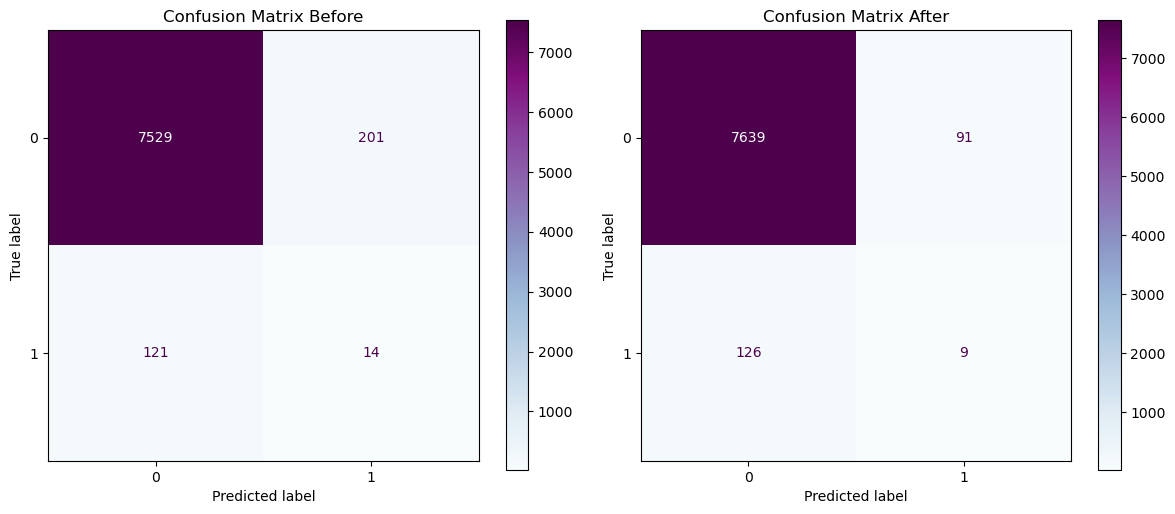

In [321]:
# confusion matrix before
cm_before = confusion_matrix(y_test, y_pred_before)

# confusion matrix after
cm_after = confusion_matrix(y_test, y_pred_after)

fig, axes = plt.subplots(1,2, figsize=(12,5))

disp_before = ConfusionMatrixDisplay(cm_before)
disp_after = ConfusionMatrixDisplay(cm_after)

axes[0].set_title('Confusion Matrix Before')
axes[1].set_title('Confusion Matrix After')
disp_before.plot(ax=axes[0], cmap='BuPu')
disp_after.plot(ax=axes[1], cmap='BuPu')

plt.tight_layout()
plt.show()

- **Notes** : Apabila Tabel terpotong (....) klick Scrollable elements

In [370]:
print(f'''
Setelah dilakukan HyperTuning didapatkan bestmodel
       {randomsearch.best_estimator_[-1]},

dengan nilai F2 Scorer {round(fbeta_score(y_test, y_pred_after,beta=2),2)},

Langkah berikutnya adalah membandingkan Confusion Matriks sebelum dan sesudah dilakukan HyperTuning, didapatkan hasil berikut
--------------------------------------------------------------------------------------------------------------------------------------------   
                                                    |                      Sebelum                      |                 Sesudah
--------------------------------------------------------------------------------------------------------------------------------------------
Jumlah prediksi Klaim Benar (TP)                    :                       7529                                            7655 
Jumlah prediksi Klaim Salah (TN)                    :                         14                                               8
Jumlah prediksi Klaim Klaim Benar tapi Tidak (FN)   :                        121                                             126
Jumlah prediksi Klaim Klaim Tidak tapi Benar (FP)   :                        201                                              91

Kemudian akan dilakukan perhitungan biaya kerugian untuk mengetahui apakah model dapat mengurangi kerugian pada perusahaan,
dengan detail cost sebagai berikut :
      1. FP    : Perusahaan merugi akibat jumlah cycle money yang akan dikelola tidak sesuai, sehingga dapat mengakibatkan kerugian sebesar
         Biaya : Rp 87.803.750.000
      
      2. FN    : Perusahaan mengalami kerugian akibat tuntutan pemegang polis, serta kehilangan kepercayaan pada masyarakat
         Biaya : Rp 540.803.750.000

Maka cost Evaluation adalah sebagai berikut :
      1. Sebelum
         (FP x Rp 87.803.750.000)   +   (FN x Rp 540.803.750.000)
      
         Total Kerugian Perusahaan   : Rp. {(201 * 87803750000)+(121*540803750000)}

      2. Sesudah
         (FP x Rp 87.803.750.000)   +   (FN x Rp 540.803.750.000)
      
         Total Kerugian Perusahaan   : Rp. {(91 * 87803750000)+(126*540803750000)}

      Selisih Turun : Rp. {(201 * 87803750000)+(121*540803750000)} - Rp. {(91 * 87803750000)+(126*540803750000)}

      Total Penghematan Perusahaan   : Rp. {((201 * 87803750000)+(121*540803750000))-((91 * 87803750000)+(126*540803750000))}

      Total Penghematan (persen)     : {round((((201 * 87803750000)+(121*540803750000))-((91 * 87803750000)+(126*540803750000)))/(((201 * 87803750000)+(121*540803750000))+((91 * 87803750000)+(126*540803750000))) ,2)} %

Dengan haisl cost evalution dapat dilihat bahwa,
Perusahaan berhasil mengurangi kerugian perusahaan akibat salah prediksi sebesar Rp. {((201 * 87803750000)+(121*540803750000))-((91 * 87803750000)+(126*540803750000))}

Sehingga Model dapat dikatakan BERHASIL dalam memenuhi tujuan yakni :
      1. Mampu mengidentifikasi pola dan faktor risiko yang menentukan kemungkinan klaim,
      2. Membantu perusahaan mengelola klaim dengan lebih baik,
      3. Membuka peluang bagi perusahaan untuk meningkatkan efisiensi operasional,
      4. Memaksimalkan profitabilitas polis dan ,
      5. Menciptakan pengalaman pelanggan yang lebih personal dan relevan, serta mengurangi kerugian perusahaan akibat pengeluaran biaya

''')


Setelah dilakukan HyperTuning didapatkan bestmodel
       GradientBoostingClassifier(learning_rate=0.7, max_depth=8, min_samples_leaf=3,
                           min_samples_split=3, random_state=9),

dengan nilai F2 Scorer 0.07,

Langkah berikutnya adalah membandingkan Confusion Matriks sebelum dan sesudah dilakukan HyperTuning, didapatkan hasil berikut
--------------------------------------------------------------------------------------------------------------------------------------------   
                                                    |                      Sebelum                      |                 Sesudah
--------------------------------------------------------------------------------------------------------------------------------------------
Jumlah prediksi Klaim Benar (TP)                    :                       7529                                            7655 
Jumlah prediksi Klaim Salah (TN)                    :                         14               

# 10. Optimized Threshold

In [323]:
# define model
best_model = randomsearch.best_estimator_

# fitting
best_model.fit(X_train, y_train)

# list threshold
list_threshold = np.arange(0.01, 1, 0.01)
list_f2 = []

for threshold in list_threshold:
    # predict
    y_pred_proba = best_model.predict_proba(X_test)[:,1]
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)

    # eval metric
    f2 = fbeta_score(y_test, y_pred_class, beta=2)
    list_f2.append(f2)

In [324]:
df_th = pd.DataFrame()
df_th['threshold'] = list_threshold
df_th['f2_score'] = list_f2
df_th = df_th.sort_values('f2_score', ascending=False)
df_th

,threshold,f2_score
2,0.03,0.208012
1,0.02,0.207081
3,0.04,0.194585
4,0.05,0.181564
5,0.06,0.175000
...,...,...
30,0.31,0.068702
29,0.30,0.068389
28,0.29,0.068182
27,0.28,0.068079


<Axes: xlabel='threshold', ylabel='f2_score'>

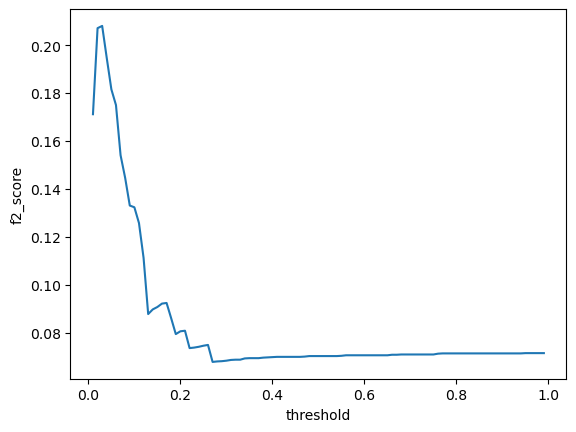

In [325]:
sns.lineplot(x=df_th['threshold'], y=df_th['f2_score'])

In [326]:
# predict
y_pred_proba = best_model.predict_proba(X_test)[:,1]
y_pred_optimized = np.where(y_pred_proba > df_th.iloc[0,0], 1, 0)

# eval metric
fbeta_score(y_test, y_pred_optimized, beta=2)

0.20801232665639446

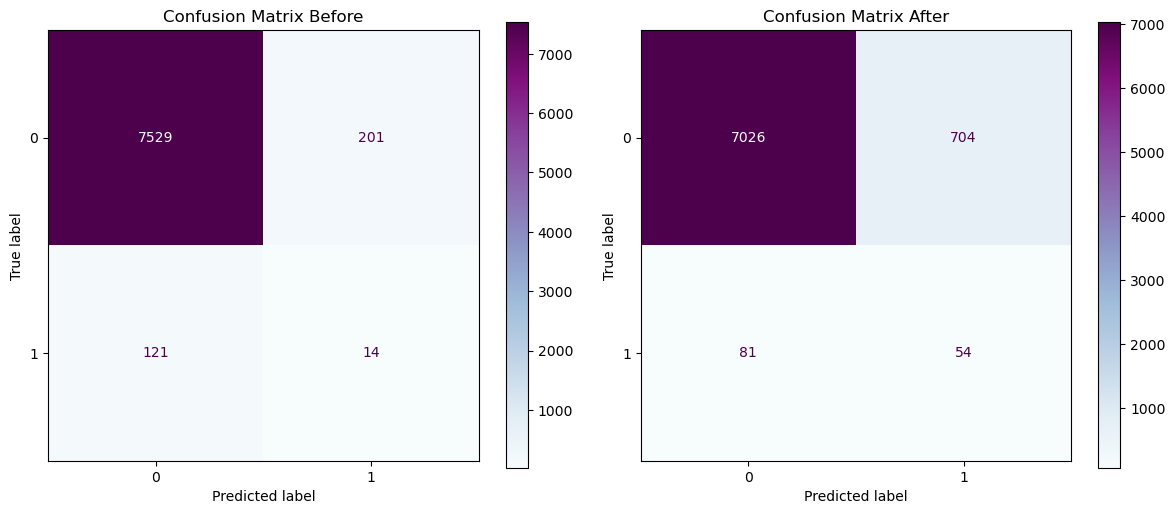

In [327]:
# confusion matrix before
cm_before = confusion_matrix(y_test, y_pred_before)

# confusion matrix after
cm_after = confusion_matrix(y_test, y_pred_optimized)

fig, axes = plt.subplots(1,2, figsize=(12,5))

disp_before = ConfusionMatrixDisplay(cm_before)
disp_after = ConfusionMatrixDisplay(cm_after)

axes[0].set_title('Confusion Matrix Before')
axes[1].set_title('Confusion Matrix After')
disp_before.plot(ax=axes[0], cmap='BuPu')
disp_after.plot(ax=axes[1], cmap='BuPu')

plt.tight_layout()
plt.show()

- **Notes** : Apabila Tabel terpotong (....) klick Scrollable elements

In [333]:
print(f'''
Setelah dilakukan Threshold didapatkan
dengan nilai F2 Scorer {round(fbeta_score(y_test, y_pred_optimized, beta=2),2)},
Langkah berikutnya adalah membandingkan Confusion Matriks sebelum dan sesudah dilakukan Threshold, didapatkan hasil berikut
--------------------------------------------------------------------------------------------------------------------------------------------   
                                                    |                      Sebelum                      |                 Sesudah
--------------------------------------------------------------------------------------------------------------------------------------------
Jumlah prediksi Klaim Benar (TP)                    :                       7529                                            6898 
Jumlah prediksi Klaim Salah (TN)                    :                         14                                              54
Jumlah prediksi Klaim Klaim Benar tapi Tidak (FN)   :                        121                                              81
Jumlah prediksi Klaim Klaim Tidak tapi Benar (FP)   :                        201                                             704

Kemudian akan dilakukan perhitungan biaya kerugian untuk mengetahui apakah model dapat mengurangi kerugian pada perusahaan,
dengan detail cost sebagai berikut :
      1. FP    : Perusahaan merugi akibat jumlah cycle money yang akan dikelola tidak sesuai, sehingga dapat mengakibatkan kerugian sebesar
         Biaya : Rp 87.803.750.000
      
      2. FN    : Perusahaan mengalami kerugian akibat tuntutan pemegang polis, serta kehilangan kepercayaan pada masyarakat
         Biaya : Rp 540.803.750.000

Maka cost Evaluation adalah sebagai berikut :
      1. Sebelum
         (FP x Rp 87.803.750.000)   +   (FN x Rp 540.803.750.000)
      
         Total Kerugian Perusahaan   : Rp. {(201 * 87803750000)+(121*540803750000)}

      2. Sesudah
         (FP x Rp 87.803.750.000)   +   (FN x Rp 540.803.750.000)
      
         Total Kerugian Perusahaan   : Rp. {(704 * 87803750000)+(81*540803750000)}

      Selisih Turun : Rp. {(201 * 87803750000)+(121*540803750000)} - Rp. {(704 * 87803750000)+(81*540803750000)}

      Total Penghematan Perusahaan   : Rp. {((201 * 87803750000)+(121*540803750000))-((704 * 87803750000)+(81*540803750000))}

Dengan haisl cost evalution dapat dilihat bahwa,
Perusahaan gagal mengurangi kerugian perusahaan akibat salah prediksi sebesar Rp. {((201 * 87803750000)+(121*540803750000))-((704 * 87803750000)+(81*540803750000))}

Sehingga Model dapat dikatakan GAGAL dalam memenuhi tujuan yakni :
      1. Mampu mengidentifikasi pola dan faktor risiko yang menentukan kemungkinan klaim,
      2. Gagal membantu perusahaan mengelola klaim dengan lebih baik,
      3. Tidak memberikan peluang bagi perusahaan untuk meningkatkan efisiensi operasional,
      4. Tidak memaksimalkan profitabilitas polis dan ,
      5. Gagal menciptakan pengalaman pelanggan yang lebih personal dan relevan, serta mengurangi kerugian perusahaan akibat pengeluaran biaya

''')


Setelah dilakukan Threshold didapatkan
dengan nilai F2 Scorer 0.21,
Langkah berikutnya adalah membandingkan Confusion Matriks sebelum dan sesudah dilakukan Threshold, didapatkan hasil berikut
--------------------------------------------------------------------------------------------------------------------------------------------   
                                                    |                      Sebelum                      |                 Sesudah
--------------------------------------------------------------------------------------------------------------------------------------------
Jumlah prediksi Klaim Benar (TP)                    :                       7529                                            6898 
Jumlah prediksi Klaim Salah (TN)                    :                         14                                              54
Jumlah prediksi Klaim Klaim Benar tapi Tidak (FN)   :                        121                                              81
Juml

# 11. F2 Scorer Comparison

In [329]:
print(f'''
F2 Score

Before tuning       : {round(fbeta_score(y_test, y_pred_before, beta=2),2)} Score 
After tuning        : {round(fbeta_score(y_test, y_pred_after, beta=2),2)} Score
Optimized Threshold : {round(fbeta_score(y_test, y_pred_optimized, beta=2),2)} Score
''')


F2 Score

Before tuning       : 0.09 Score 
After tuning        : 0.07 Score
Optimized Threshold : 0.21 Score



# 12. Feature Importance

In [330]:
best_model = randomsearch.best_estimator_
koef = pd.DataFrame(best_model.named_steps['model'].feature_importances_.reshape(-1,1))
koef['urutan'] = abs(koef[0])

koef['column']=best_model.named_steps['preprocessing'].get_feature_names_out()
koef = koef.sort_values(by='urutan', ascending=False)

<Axes: xlabel='0', ylabel='column'>

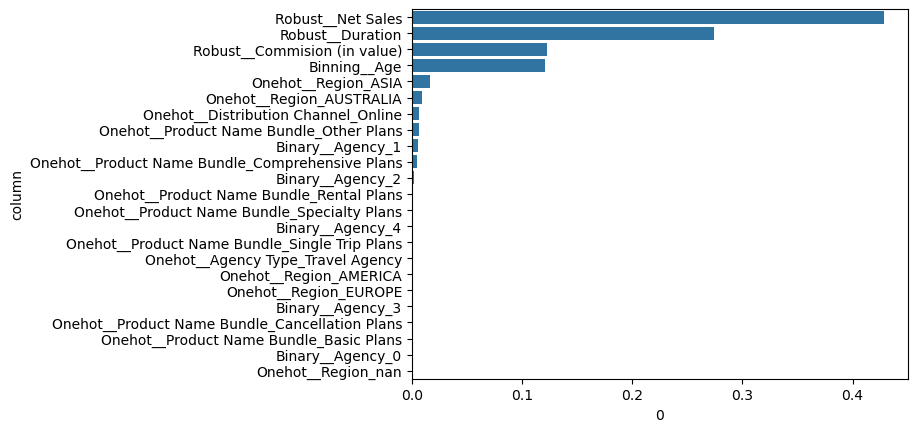

In [331]:
sns.barplot(koef, x=0, y='column')

In [361]:
print(f'''
Dengan menggunakan Feature Importance, maka faktor yang menentukan dalam pengambilan keputusan seseorang 
dalam mengajukan claim asuransi untuk keamanan perjalanannya, adapaun faktor yang mempengaruhi diantaranya :
    1.  {koef['column'].iloc[0]}  
        hal yang paling berpengaruh dalam seseorang akan mengambil 
         claim asuransi dalam perjalanan mereka atau tidak karena Net sales merupakan harga yang dibayarkan oleh pemegang polis,
         dengan asumsi bahwa pemegang polis menyukai asuransi dengan harga rendah namun dapat menjaga keamanan perjalanan
         pemegang polis secara maksimal.

    2. {koef['column'].iloc[1]} 
        hal yang paling berpengaruh dalam seseorang akan mengambil 
         claim asuransi dalam perjalanan mereka atau tidak karena lama nya waktu perjalanan membuat pemegang polis
         harus sigap untuk segala masalah yang akan datang, sehingga asuransi menjadi solusi demi menjaga
         keamanan dan kenyamanan selama melakukan perjalanan.
    
    3. {koef['column'].iloc[4]}
        hal yang paling berpengaruh dalam seseorang akan mengambil 
         claim asuransi dalam perjalanan mereka atau tidak karena tujuan perjalanan menjadi kekhawatiran pemegang polis
         dalam kasus ini Wilayah ASIA menjadi wilayah yang memiliki jumlah pemegang polis terbesar, hal ini mengambarkan
         tingkat awareness para traveler dalam menjaga keamanan mereka ketika melakukan perjalanan.

    4. {koef['column'].iloc[6]}
        hal yang paling berpengaruh dalam seseorang akan mengambil 
         claim asuransi dalam perjalanan mereka atau tidak karena proses pengajuan claim asuransi memerlukan berkas yang kompleks
         dan waktu yang lama, sehingga proses yang dapat dilakukan secara online lebih digemari oleh pemegang polis
         karena dapat mengurangi lama nya waktu yang diperlukan.    
         
''')



Dengan menggunakan Feature Importance, maka faktor yang menentukan dalam pengambilan keputusan seseorang 
dalam mengajukan claim asuransi untuk keamanan perjalanannya, adapaun faktor yang mempengaruhi diantaranya :
    1.  Robust__Net Sales  
        hal yang paling berpengaruh dalam seseorang akan mengambil 
         claim asuransi dalam perjalanan mereka atau tidak karena Net sales merupakan harga yang dibayarkan oleh pemegang polis,
         dengan asumsi bahwa pemegang polis menyukai asuransi dengan harga rendah namun dapat menjaga keamanan perjalanan
         pemegang polis secara maksimal.

    2. Robust__Duration 
        hal yang paling berpengaruh dalam seseorang akan mengambil 
         claim asuransi dalam perjalanan mereka atau tidak karena lama nya waktu perjalanan membuat pemegang polis
         harus sigap untuk segala masalah yang akan datang, sehingga asuransi menjadi solusi demi menjaga
         keamanan dan kenyamanan selama melakukan perjalanan.
    
    3. Onehot_

# 13. Kesimpulan

## 13.1 Summary

- **Notes** : Apabila Tabel terpotong (....) klick Scrollable elements

In [394]:
Kesimpulan = [
    ["Random Under Sampling","Bertujuan untuk menyamakan jumlah sampel kelas mayoritas dengan kelas minoritas"],
    ["",""],
    ["Random Over Sampling","Menambah jumlah sampel dari kelas minoritas secara acak dengan menduplikasi data yang ada."],
    ["",""],
    ["SMOTE","Membuat sampel baru dengan interpolasi antara sampel terpilih dan tetangga terdekatnya (k-NN)."],
    ["",""],
    ["NearMiss","Memilih sampel kelas mayoritas berdasarkan kedekatan (distance) dengan kelas minoritas"],
    ["",""],
]


# Header tabel
headers = ["Teknik", "Penjelasan"]

# Buat tabel
print('Kesimpulan')
print(f'''
Data Cleaning
  1. Data Info
      Data info Statistik Data setelah dilakukan cleaning dan enginering memiliki
      jumlah Baris            : {df.shape[0]}
      jumlah Kolom            : {df.shape[1]}
      Kolom bersifat object   : {df.dtypes.value_counts()[0]}
      Kolom bersifat int64    : {df.dtypes.value_counts()[1]}
      Kolom bersifat float64  : {df.dtypes.value_counts()[2]}
EDA
  1. REGION
      Summary
        
      Jumlah perbandingan Destination Tertinggi berjumlah             : {df_region.iloc[0][0]} {round(((df_region.iloc[0][1])/(sum(df_region.iloc[:,1])))*100,2)} %
      Jumlah Destination Terkecil berjumlah                           : {df_region.iloc[4][0]} {round((df_region.iloc[4][1])/sum(df_region.iloc[:,1])*100,2)} %

          - Asia memiliki jumlah yang jauh lebih besar dibandingkan wilayah lain, dengan lebih dari 30.000 entitas (pelanggan, polis, atau klaim, tergantung pada konteks data). Ini menunjukkan bahwa aktivitas atau fokus utama perusahaan asuransi travel mungkin berpusat di Asia, baik dari segi pangsa pasar, klien, atau destinasi yang dilayani.
          Wilayah Lain yang Signifikan

          - Eropa menempati posisi kedua dengan jumlah entitas yang signifikan, meskipun jauh lebih kecil daripada Asia. Ini menunjukkan bahwa Eropa masih menjadi pasar penting, tetapi tidak sebesar Asia.
          Wilayah dengan Pangsa Pasar Kecil

          - Australia, Amerika, dan Afrika memiliki jumlah yang relatif kecil dibandingkan Asia dan Eropa. 
          Afrika khususnya terlihat sangat kecil, yang bisa mengindikasikan:
              1. Kurangnya penetrasi pasar asuransi di wilayah ini.
              2. Fokus bisnis perusahaan yang lebih rendah di wilayah ini.
              3. Potensi untuk mengembangkan pasar baru di wilayah ini.

  2. Product Name Bundle
      Summary
      
      Jumlah perbandingan Product Tertinggi berjumlah                 : {df_product.iloc[0][0]} {round(((df_product.iloc[0][1])/(sum(df_product.iloc[:,1])))*100,2)} %
      Jumlah Product Terkecil berjumlah                               : {df_product.iloc[7][0]} {round((df_product.iloc[7][1])/sum(df_product.iloc[:,1])*100,2)} %

          - Cancellation Plans adalah produk asuransi paling populer dengan jumlah pengguna tertinggi. Ini menunjukkan bahwa pelanggan sangat peduli terhadap risiko pembatalan perjalanan, terutama karena faktor ketidakpastian seperti kesehatan, cuaca, atau perubahan jadwal.
          
          - Comprehensive Plans berada di peringkat kedua, menunjukkan minat tinggi pada perlindungan menyeluruh yang mencakup berbagai risiko perjalanan (kesehatan, bagasi, pembatalan, dll.).
          Pelanggan yang memilih ini kemungkinan adalah pelancong yang lebih sadar akan risiko dan mencari perlindungan maksimal.

          - Produk seperti Single Trip Plans dan Specialty Plans memiliki proporsi paling kecil. Ini bisa mengindikasikan bahwa:
          Pelanggan lebih sering bepergian dan membutuhkan rencana tahunan atau perlindungan luas.
          Kurangnya kesadaran atau pemasaran produk ini.

          - Rental Plans dan Basic Plans memiliki posisi tengah, menunjukkan permintaan stabil untuk perlindungan dasar seperti kerusakan kendaraan atau cakupan minimum untuk pelancong hemat.

          - Annual Plans memiliki permintaan lebih rendah dibandingkan Comprehensive atau Cancellation Plans, meskipun lebih ekonomis untuk pelancong reguler.
          Kemungkinan karena target pasar yang lebih sempit, seperti pelancong bisnis atau individu yang sering bepergian.

  3. Klaim

      Jumlah perbandingan Claim No berjumlah : {round(df_count_claim[0],2)} %
      Jumlah Claim Yes berjumlah             : {round(df_count_claim[1],2)} %
      Kesimpulan                             : Jumlah Populasi Tidak Terdistribusi Merata (Imbalance)

  4.  Agency (klaim)
      Summary

      Jumlah perbandingan Agency by Claim Tertinggi berjumlah             : {df_agencyclaim.iloc[0][0]} {round(((df_agencyclaim.iloc[0][1])/(sum(df_agencyclaim.iloc[:,1])))*100,2)} %
      Jumlah Agency by Claim Terkecil berjumlah                           : {df_agencyclaim.iloc[9][0]} {round((df_agencyclaim.iloc[9][1])/sum(df_agencyclaim.iloc[:,1])*100,2)} %
      
      - Dominasi klaim dari C2B bisa disebabkan oleh volume penjualan yang lebih tinggi dibandingkan agency lain.
        Sebaliknya, agency dengan jumlah klaim rendah kemungkinan melayani pelanggan dalam skala kecil atau memiliki fokus pada produk yang berbeda.

      - Jika C2B dan EPX menawarkan produk dengan perlindungan yang luas atau untuk perjalanan dengan risiko lebih tinggi, ini dapat meningkatkan peluang klaim.
        Agency lain mungkin fokus pada produk atau segmen pasar yang lebih kecil dengan risiko lebih rendah.

      - Agency dengan klaim rendah (TST, CCR) juga dapat mencerminkan layanan atau proses yang lebih ketat dalam menyeleksi klaim, atau basis pelanggan mereka yang cenderung lebih hati-hati.

  5. Agency Type (klaim)
      Summary

      Jumlah perbandingan Agency Type by Claim Tertinggi berjumlah             : {df_agencytypeclaim.iloc[0][0]} {round(((df_agencytypeclaim.iloc[0][1])/(sum(df_agencytypeclaim.iloc[:,1])))*100,2)} %
      Jumlah Agency Type by Claim Terkecil berjumlah                           : {df_agencytypeclaim.iloc[1][0]} {round((df_agencytypeclaim.iloc[1][1])/sum(df_agencytypeclaim.iloc[:,1])*100,2)} %

      - Airlines mungkin memiliki volume transaksi yang lebih tinggi karena melibatkan tiket pesawat, yang merupakan layanan utama dalam perjalanan udara.
        Travel Agency mungkin lebih fokus pada layanan tambahan seperti paket wisata, akomodasi, atau aktivitas tur, yang menghasilkan volume klaim lebih rendah.

      - Airlines kemungkinan melayani pelanggan dengan kebutuhan perjalanan yang lebih langsung dan mendesak, seperti perjalanan bisnis atau penerbangan jarak jauh.
        Travel Agency mungkin melayani pelanggan yang lebih kecil skalanya atau berorientasi pada liburan.

      - Produk asuransi yang terkait dengan Airlines mungkin lebih sering diklaim, misalnya asuransi penerbangan atau keterlambatan perjalanan.
        Travel Agency mungkin menawarkan produk yang klaimnya lebih jarang atau tidak sebesar Airlines.

Define X y
  1. Variable
  Keterangan Kolom yang digunakan
    1. Kolom X
          - [Agency, Agency Type, Distribution Channel, Product Name Bundle, Duration, Net Sales, Commision (in value), Age, Region]                 

    2. Kolom y
          - [Claim]

Preprocessing Data
  1. Pengelompokan Proses
{tabulate(kondisiX, headers, tablefmt="github")}          

Cross Validation
  1. Spesifikasi Device

{tabulate(speccomp, headers, tablefmt="github")}

  2. List Algoritma Model

{tabulate(pilihalgo, headers, tablefmt="github")}

Best Model
  1. Model Terpilih
    Setelah dilakukan HyperTuning didapatkan bestmodel
       {randomsearch.best_estimator_[-1]},

    dengan nilai F2 Scorer {round(fbeta_score(y_test, y_pred_after,beta=2),2)}

  2. Cost Evaluation
      --------------------------------------------------------------------------------------------------------------------------------------------   
                                                          |                      Sebelum                      |                 Sesudah
      --------------------------------------------------------------------------------------------------------------------------------------------
      Jumlah prediksi Klaim Benar (TP)                    :                       7529                                            7655 
      Jumlah prediksi Klaim Salah (TN)                    :                         14                                               8
      Jumlah prediksi Klaim Klaim Benar tapi Tidak (FN)   :                        121                                             126
      Jumlah prediksi Klaim Klaim Tidak tapi Benar (FP)   :                        201                                              91

      Kemudian akan dilakukan perhitungan biaya kerugian untuk mengetahui apakah model dapat mengurangi kerugian pada perusahaan,
      dengan detail cost sebagai berikut :
            1. FP    : Perusahaan merugi akibat jumlah cycle money yang akan dikelola tidak sesuai, sehingga dapat mengakibatkan kerugian sebesar
              Biaya : Rp 87.803.750.000
            
            2. FN    : Perusahaan mengalami kerugian akibat tuntutan pemegang polis, serta kehilangan kepercayaan pada masyarakat
              Biaya : Rp 540.803.750.000

      Maka cost Evaluation adalah sebagai berikut :
            1. Sebelum
              (FP x Rp 87.803.750.000)   +   (FN x Rp 540.803.750.000)
            
              Total Kerugian Perusahaan   : Rp. {(201 * 87803750000)+(121*540803750000)}

            2. Sesudah
              (FP x Rp 87.803.750.000)   +   (FN x Rp 540.803.750.000)
            
              Total Kerugian Perusahaan   : Rp. {(91 * 87803750000)+(126*540803750000)}

            Selisih Turun : Rp. {(201 * 87803750000)+(121*540803750000)} - Rp. {(91 * 87803750000)+(126*540803750000)}

            Total Penghematan Perusahaan   : Rp. {((201 * 87803750000)+(121*540803750000))-((91 * 87803750000)+(126*540803750000))}

            Total Penghematan (persen)     : {round((((201 * 87803750000)+(121*540803750000))-((91 * 87803750000)+(126*540803750000)))/(((201 * 87803750000)+(121*540803750000))+((91 * 87803750000)+(126*540803750000))) ,2)} %

      Dengan haisl cost evalution dapat dilihat bahwa,
      Perusahaan berhasil mengurangi kerugian perusahaan akibat salah prediksi sebesar Rp. {((201 * 87803750000)+(121*540803750000))-((91 * 87803750000)+(126*540803750000))}

      Sehingga Model dapat dikatakan BERHASIL dalam memenuhi tujuan yakni :
            1. Mampu mengidentifikasi pola dan faktor risiko yang menentukan kemungkinan klaim,
            2. Membantu perusahaan mengelola klaim dengan lebih baik,
            3. Membuka peluang bagi perusahaan untuk meningkatkan efisiensi operasional,
            4. Memaksimalkan profitabilitas polis dan ,
            5. Menciptakan pengalaman pelanggan yang lebih personal dan relevan, serta mengurangi kerugian perusahaan akibat pengeluaran biaya

''')

Kesimpulan

Data Cleaning
  1. Data Info
      Data info Statistik Data setelah dilakukan cleaning dan enginering memiliki
      jumlah Baris            : 39324
      jumlah Kolom            : 12
      Kolom bersifat object   : 7
      Kolom bersifat int64    : 2
      Kolom bersifat float64  : 2
EDA
  1. REGION
      Summary
        
      Jumlah perbandingan Destination Tertinggi berjumlah             : ASIA 77.44 %
      Jumlah Destination Terkecil berjumlah                           : AFRICA 0.55 %

          - Asia memiliki jumlah yang jauh lebih besar dibandingkan wilayah lain, dengan lebih dari 30.000 entitas (pelanggan, polis, atau klaim, tergantung pada konteks data). Ini menunjukkan bahwa aktivitas atau fokus utama perusahaan asuransi travel mungkin berpusat di Asia, baik dari segi pangsa pasar, klien, atau destinasi yang dilayani.
          Wilayah Lain yang Signifikan

          - Eropa menempati posisi kedua dengan jumlah entitas yang signifikan, meskipun jauh lebih kecil 

## 13.2 Recomendation

In [411]:
print(f'''
Recomendation
      
Feature Importance
      1. Region Sector
         - (Operasional) Perusahaan dapat memprioritaskan penguatan operasional dan produk di wilayah Asia untuk mempertahankan dominasi.
         - (Marketing) Untuk wilayah dengan pangsa kecil, strategi ekspansi atau promosi mungkin diperlukan untuk meningkatkan kehadiran perusahaan.
      
      2. Product Sector
         - Perkuat Pemasaran Cancellation dan Comprehensive Plans (Marketing):
           Fokus pada mempromosikan manfaat tambahan dari kedua produk unggulan ini.
           Misalnya, tingkatkan fitur khusus seperti perlindungan COVID-19 atau kompensasi cepat untuk pembatalan.
      
         - Optimalkan Promosi Specialty dan Single Trip Plans (Public Relationship):
           Tawarkan insentif atau diskon untuk memikat pelanggan baru pada produk ini.
           Edukasi pasar mengenai keuntungan yang ditawarkan untuk perjalanan singkat atau kebutuhan spesifik.

         - Segmentasi Pelanggan untuk Rental dan Basic Plans (Marketing):
           Rental Plans bisa dipromosikan kepada pelancong yang menyewa kendaraan (mobil atau motor).
           Basic Plans cocok untuk pelanggan yang ingin solusi hemat dengan cakupan dasar.
      
         - Peningkatan Penjualan Bundel (Marketing):
           Tawarkan paket bundel, seperti Cancellation + Rental Plans, untuk meningkatkan nilai pelanggan sekaligus mendorong pembelian multiple produk.

      3. Agency Sector
         - Tingkatkan Dukungan pada C2B dan EPX (Operasional):
           Karena kedua agency ini menghasilkan klaim terbesar, penting untuk memastikan proses klaim yang efisien dan dukungan pelanggan yang memadai.
           Lakukan evaluasi mendalam untuk mengidentifikasi pola klaim dan potensi masalah pada produk/layanan mereka.
      
         - Optimalkan Agency dengan Jumlah Klaim Rendah (Operasional):
           Analisis mendalam diperlukan untuk memahami mengapa agency seperti JWT, CCR, dan TST memiliki klaim rendah.
           Apakah ini karena kurangnya aktivitas penjualan, fokus pasar yang berbeda, atau produk yang kurang diminati? Berikan pelatihan atau dukungan untuk meningkatkan kinerja mereka.

         - Edukasi dan Pemasaran (Public Relationship):
           Fokus pada edukasi pelanggan agency dengan jumlah klaim rendah untuk meningkatkan penjualan produk yang sesuai dengan kebutuhan mereka.
           Tingkatkan pemasaran pada agency-agency kecil untuk memperluas basis pelanggan mereka.
      
      4. Agency Type Sector
         - Fokus pada Optimalisasi Klaim Airlines (Operasional):
           Dominasi klaim Airlines, pastikan proses pengajuan klaim dari pelanggan Airlines efisien dan terstruktur.
           Analisis apakah klaim tinggi ini menunjukkan risiko tinggi atau hanya volume transaksi yang besar.
      
         - Dukungan untuk Travel Agency (Marketing):
           Tingkatkan promosi dan diversifikasi produk asuransi yang dijual oleh Travel Agency.
           Berikan pelatihan atau insentif kepada agen untuk meningkatkan jumlah pelanggan dan klaim.

         - Analisis Produk Klaim (Data Analysts):
           Lakukan analisis mendalam pada produk-produk yang paling banyak diklaim di Airlines untuk memahami pola klaim dan potensi risiko.
           Pastikan bahwa produk yang dijual oleh Travel Agency relevan dengan kebutuhan pelanggan.

Final Model      
    Dari Data ini bisa dilihat bahwa jumlah kolom Claim
          Jumlah perbandingan Claim No berjumlah : {round(df_count_claim[0],2)} %
          Jumlah Claim Yes berjumlah             : {round(df_count_claim[1],2)} %

    Dari hasil tersebut dapat disimpulkan bahwa Jumlah Populasi Tidak Terdistribusi Merata (Imbalance) namun,
    jumlah imbalance yang ada terlalu berbeda sehingga membuat data menjadi sangat BIAS, meskipun 
    telah dilakukan kontrol terhadap DUPLICATED data dan OUTLIER data, tetap saja model menunjukan hasil

          {randomsearch.best_estimator_[-1]},

        dengan nilai F2 Scorer {round(fbeta_score(y_test, y_pred_after,beta=2),2)}
    
    Namun model BERHASIl memenuhi tujuan pemodelan dikarenakan cost evaluation menunjukan hasil

        Total Penghematan Perusahaan   : Rp. {((201 * 87803750000)+(121*540803750000))-((91 * 87803750000)+(126*540803750000))}

        Total Penghematan (persen)     : {round((((201 * 87803750000)+(121*540803750000))-((91 * 87803750000)+(126*540803750000)))/(((201 * 87803750000)+(121*540803750000))+((91 * 87803750000)+(126*540803750000))) ,2)} %

    Meskipun pengaruh model sangat kecil, namun tetap model berhasil memenuhi tujuan pemodelan dalam mengurangi jumlah FN dan FP
    adapun saran untuk meningkatkan kinerja model adalah sebagai berikut:
      1. Memperbanyak variasi Data Klaim (Terutama Data dengan status Klaim yes)
         Dengan memperbanyak data, membuat data menjadi heterogen, sehingga tidak terjadi kecenderungan terhadap salah satu target
         ketika dilakukan prediksi oleh model

      2. (optional) Dapat melakukan proses HyperTuning dengan menggunakan GRIDSEARCH
         Dengan melakukan proses tuning terhadap keseluruhan data, dapat meningkatkan kualitas model, karena model belajar terhadap 
         keseluruhan data, dibandingkan dengan teknik RANDOMSEARCH yang hanya melakukan belajar terhadap jumlah data yang sudah 
         ditentukan (Pada model ini menggunakan RandomSearch (1000))
''')


Recomendation
      
Feature Importance
      1. Region Sector
         - (Operasional) Perusahaan dapat memprioritaskan penguatan operasional dan produk di wilayah Asia untuk mempertahankan dominasi.
         - (Marketing) Untuk wilayah dengan pangsa kecil, strategi ekspansi atau promosi mungkin diperlukan untuk meningkatkan kehadiran perusahaan.
      
      2. Product Sector
         - Perkuat Pemasaran Cancellation dan Comprehensive Plans (Marketing):
           Fokus pada mempromosikan manfaat tambahan dari kedua produk unggulan ini.
           Misalnya, tingkatkan fitur khusus seperti perlindungan COVID-19 atau kompensasi cepat untuk pembatalan.
      
         - Optimalkan Promosi Specialty dan Single Trip Plans (Public Relationship):
           Tawarkan insentif atau diskon untuk memikat pelanggan baru pada produk ini.
           Edukasi pasar mengenai keuntungan yang ditawarkan untuk perjalanan singkat atau kebutuhan spesifik.

         - Segmentasi Pelanggan untuk Rental dan

# 14. Save Model

In [ ]:
# # Joblib
# #   Simpan model
# joblib.dump(model, 'model_rf.pkl')

# #   Load model
# loaded_model = joblib.load('model_rf.pkl')
# print(loaded_model.score(X_test, y_test))

# # TensorFlow
# #   Simpan model
# model.save('saved_model/my_model')

# #   Load model
# new_model = tf.keras.models.load_model('saved_model/my_model')

# # Pythorch
# #   Simpan model
# torch.save(model.state_dict(), 'model.pth')

# #   Load model
# loaded_model.load_state_dict(torch.load('model.pth'))

**SEKIAN TERIMAKASIH**

Apabila mengalami kendala, dapat menghubungi kontak dibawah:

1. Nama         : Shafy Hafidz
2. Divisi       : JCDS0508
3. Kontak       : 081*********
4. Email        : shafy******@gmail.com
5. Fax          : 4531******** 

In [412]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Region,Product Name Bundle
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0,ASIA,Annual Plans
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0,ASIA,Cancellation Plans
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0,ASIA,Basic Plans
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0,AMERICA,Comprehensive Plans
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0,ASIA,Other Plans


In [413]:
df['Net Sales'].sum()

1659572.29

In [415]:
df['Commision (in value)'].sum()

408426.49

In [416]:
df['Duration'].sum()

2055701

In [418]:
len(df)

39324